# Comparing different datasets, sample level, NK cells

- CLR normalized protein data is used in comparisons of surface markers between different datasets in this notebook
- focusing on NK cells 

Datasets:

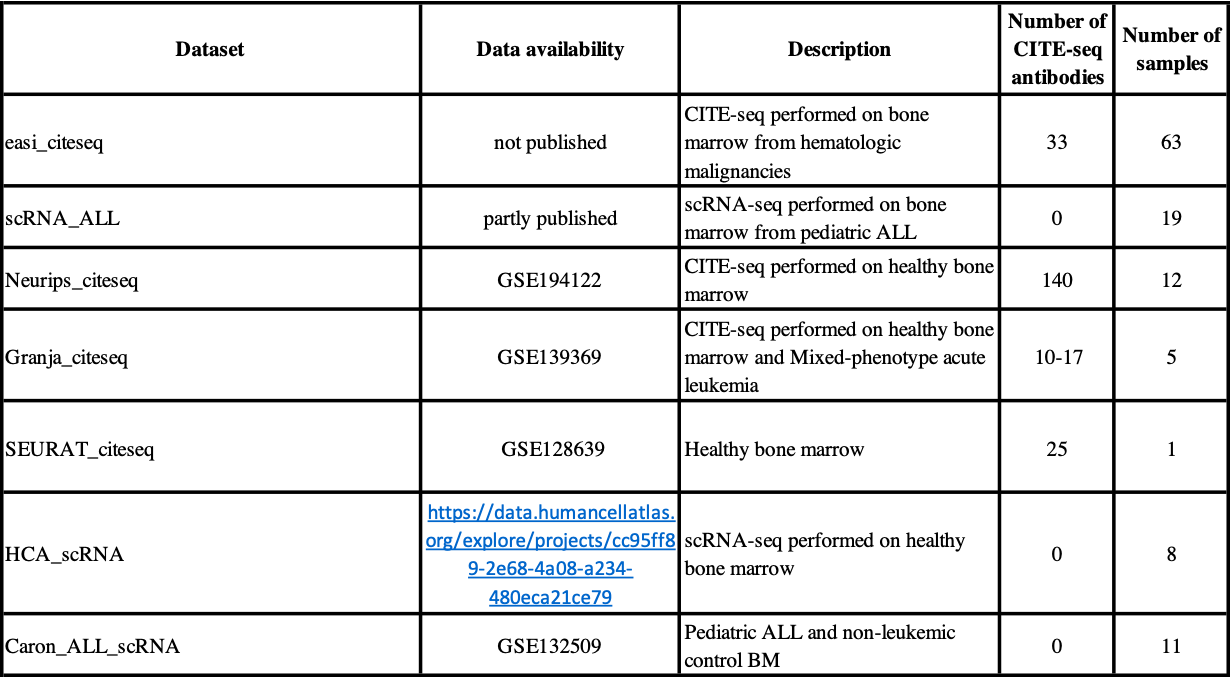

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



## File preparations

### Neurips

In [8]:
#Neurips

adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm.h5ad')

In [9]:
adata_neurips.obs['new_cell_type'].unique()

['NK', 'T', 'Prog', 'Myel', 'B', 'DC', 'E', 'Normoblast']
Categories (8, object): ['B', 'DC', 'E', 'Myel', 'NK', 'Normoblast', 'Prog', 'T']

In [10]:
#Select only NK cells

neurips_nk=adata_neurips[adata_neurips.obs['new_cell_type'] == 'NK' ]

In [11]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    obsp: 'connectivities', 'distances'

In [12]:
neurips_nk_prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [13]:
neurips_nk_prot

CD86     CD274     CD270     CD155     CD112  \
GTAGTACCAATCCTTT-1-s4d1  0.652674  1.447594  1.489354  0.890243  1.290341   
CTGTGGGTCATGCGGC-1-s4d1  0.378666  1.132949  1.153412  0.730824  1.195368   
GCAACATTCGCAAGAG-1-s4d1  0.378666  1.192753  1.208881  0.000000  1.456877   
TCACGGGTCGCACGAC-1-s4d1  0.000000  0.849902  1.548700  0.730824  1.530781   
CGCCAGAAGACCATTC-1-s4d1  0.652674  1.249182  1.404314  0.306698  1.417770   
...                           ...       ...       ...       ...       ...   
ATCATTCGTCCAATCA-1-s1d3  0.000000  0.568367  1.124479  1.027708  0.600556   
ACATTTCCAGCAGTGA-1-s1d3  0.000000  0.671273  0.856802  0.000000  0.284617   
TGAGACTTCCTTCAGC-1-s1d3  0.000000  0.671273  0.734526  0.306698  0.284617   
GAGATGGTCCGCCTAT-1-s1d3  0.000000  0.928521  0.999570  0.541080  0.600556   
ACCTGTCTCACAGTGT-1-s1d3  0.652674  0.175083  0.856802  0.000000  0.284617   

                             CD47      CD48      CD40     CD154      CD52  \
GTAGTACCAATCCTTT-1-s4d1  1.988618  1.733474  0.850004  1.531390  0.694828   
CTGTGGGTCATGCGGC-1-s4d1  1.546005  1.090567  1.173337  1.303511  1.013739   
GCAACATTCGCAAGAG-1-s4d1  1.046035  1.333993  0.638218  1.360894  1.072649   
TCACGGGTCGCACGAC-1-s4d1  1.883102  1.686271  1.240123  1.804089  0.812797   
CGCCAGAAGACCATTC-1-s4d1  1.664855  1.409627  1.302726  1.663363  0.849218   
...                           ...       ...       ...       ...       ...   
ATCATTCGTCCAATCA-1-s1d3  2.007513  1.679342  0.749707  0.545181  0.288523   
ACATTTCCAGCAGTGA-1-s1d3  1.105431  0.818721  0.201533  0.309292  0.652195   
TGAGACTTCCTTCAGC-1-s1d3  1.255114  1.174628  0.749707  0.625887  0.406586   
GAGATGGTCCGCCTAT-1-s1d3  1.759143  2.420602  1.024682  0.700563  0.406586   
ACCTGTCTCACAGTGT-1-s1d3  1.193686  0.866867  0.512721  0.457384  0.775000   

                         ...     CD101      CD88     CD224  CD197  CD34  CD10  \
GTAGTACCAATCCTTT-1-s4d1  ...  0.900688  1.389844  0.918109    0.0   0.0   0.0   
CTGTGGGTCATGCGGC-1-s4d1  ...  0.860303  0.979461  1.147198    0.0   0.0   0.0   
GCAACATTCGCAAGAG-1-s4d1  ...  0.329073  1.280509  0.676616    0.0   0.0   0.0   
TCACGGGTCGCACGAC-1-s4d1  ...  0.576253  1.189870  1.000442    0.0   0.0   0.0   
CGCCAGAAGACCATTC-1-s4d1  ...  0.680162  1.415407  0.729806    0.0   0.0   0.0   
...                      ...       ...       ...       ...    ...   ...   ...   
ATCATTCGTCCAATCA-1-s1d3  ...  0.519947  0.809714  0.357584    0.0   0.0   0.0   
ACATTTCCAGCAGTGA-1-s1d3  ...  0.519947  0.546717  0.194691    0.0   0.0   0.0   
TGAGACTTCCTTCAGC-1-s1d3  ...  0.396827  0.418509  0.000000    0.0   0.0   0.0   
GAGATGGTCCGCCTAT-1-s1d3  ...  0.576253  0.546717  0.430053    0.0   0.0   0.0   
ACCTGTCTCACAGTGT-1-s1d3  ...  0.396827  0.418509  0.780309    0.0   0.0   0.0   

                         CD90  CD15  CD117  CD66ace  
GTAGTACCAATCCTTT-1-s4d1   0.0   0.0    0.0      0.0  
CTGTGGGTCATGCGGC-1-s4d1   0.0   0.0    0.0      0.0  
GCAACATTCGCAAGAG-1-s4d1   0.0   0.0    0.0      0.0  
TCACGGGTCGCACGAC-1-s4d1   0.0   0.0    0.0      0.0  
CGCCAGAAGACCATTC-1-s4d1   0.0   0.0    0.0      0.0  
...                       ...   ...    ...      ...  
ATCATTCGTCCAATCA-1-s1d3   0.0   0.0    0.0      0.0  
ACATTTCCAGCAGTGA-1-s1d3   0.0   0.0    0.0      0.0  
TGAGACTTCCTTCAGC-1-s1d3   0.0   0.0    0.0      0.0  
GAGATGGTCCGCCTAT-1-s1d3   0.0   0.0    0.0      0.0  
ACCTGTCTCACAGTGT-1-s1d3   0.0   0.0    0.0      0.0  

[7388 rows x 141 columns]

In [14]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]


### Granja

In [15]:
adata_granja = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_granja_norm.h5ad')

In [16]:
adata_granja.obs['cell_type'].unique().to_list()

['CD4+ T 1',
 'CD14+ monocyte 1',
 'Pre B',
 'Pro B',
 'CD8+ T',
 'Promonocyte',
 'CD14+ monocyte 2',
 'Plasmacytoid dendritic cell',
 'NK T 2',
 'Immature B',
 'Late erythoid precursor 1',
 'Pre B (cycling)',
 'NK',
 'Late erythoid precursor 3',
 'Early erythoid precursor',
 'CD16+ monocyte',
 'Conventional dendritic cell',
 'HSC',
 'NK T 1',
 'Late erythoid precursor 2',
 'Plasma B cell',
 'Stromal cell',
 'Megakaryocyte',
 nan]

In [17]:
#Select NK cells
granja_nk=adata_granja[adata_granja.obs['new_cell_type'] == 'NK' ]

In [18]:
granja_nk

View of AnnData object with n_obs × n_vars = 1033 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_granja'
    obsp: 'connectivities', 'distances'

In [19]:
granja_nk_prot=granja_nk.obsm['protein_expression_clr_granja']

granja_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  \
BMMC_D1T1:AAAGAACTCGAAGAAT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T1:AAAGGGCAGAAGTGTT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T1:AAAGTCCGTCGGAAAC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T1:AAAGTGAGTTACCCAA-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T1:AACAAAGAGTCTGCGC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
...                            ...    ...    ...    ...    ...   ...   ...   
BMMC_D1T2:TTTACTGGTCAGGAGT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T2:TTTCACACAACGCATT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T2:TTTCAGTTCCAACACA-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T2:TTTCAGTTCTCGGCTT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   
BMMC_D1T2:TTTGACTGTAGTATAG-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   

                              CD40  CD154  CD52  ...  CD101  CD88  CD224  \
BMMC_D1T1:AAAGAACTCGAAGAAT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T1:AAAGGGCAGAAGTGTT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T1:AAAGTCCGTCGGAAAC-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T1:AAAGTGAGTTACCCAA-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T1:AACAAAGAGTCTGCGC-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
...                            ...    ...   ...  ...    ...   ...    ...   
BMMC_D1T2:TTTACTGGTCAGGAGT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T2:TTTCACACAACGCATT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T2:TTTCAGTTCCAACACA-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T2:TTTCAGTTCTCGGCTT-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   
BMMC_D1T2:TTTGACTGTAGTATAG-1   0.0    0.0   0.0  ...    0.0   0.0    0.0   

                              CD197  CD34  CD10  CD90      CD15  CD117  \
BMMC_D1T1:AAAGAACTCGAAGAAT-1    0.0   0.0   0.0   0.0  2.346739    0.0   
BMMC_D1T1:AAAGGGCAGAAGTGTT-1    0.0   0.0   0.0   0.0  1.927923    0.0   
BMMC_D1T1:AAAGTCCGTCGGAAAC-1    0.0   0.0   0.0   0.0  1.890060    0.0   
BMMC_D1T1:AAAGTGAGTTACCCAA-1    0.0   0.0   0.0   0.0  2.346739    0.0   
BMMC_D1T1:AACAAAGAGTCTGCGC-1    0.0   0.0   0.0   0.0  2.016744    0.0   
...                             ...   ...   ...   ...       ...    ...   
BMMC_D1T2:TTTACTGGTCAGGAGT-1    0.0   0.0   0.0   0.0  1.830436    0.0   
BMMC_D1T2:TTTCACACAACGCATT-1    0.0   0.0   0.0   0.0  2.144246    0.0   
BMMC_D1T2:TTTCAGTTCCAACACA-1    0.0   0.0   0.0   0.0  1.744967    0.0   
BMMC_D1T2:TTTCAGTTCTCGGCTT-1    0.0   0.0   0.0   0.0  1.809744    0.0   
BMMC_D1T2:TTTGACTGTAGTATAG-1    0.0   0.0   0.0   0.0  1.722408    0.0   

                              CD66ace  
BMMC_D1T1:AAAGAACTCGAAGAAT-1      0.0  
BMMC_D1T1:AAAGGGCAGAAGTGTT-1      0.0  
BMMC_D1T1:AAAGTCCGTCGGAAAC-1      0.0  
BMMC_D1T1:AAAGTGAGTTACCCAA-1      0.0  
BMMC_D1T1:AACAAAGAGTCTGCGC-1      0.0  
...                               ...  
BMMC_D1T2:TTTACTGGTCAGGAGT-1      0.0  
BMMC_D1T2:TTTCACACAACGCATT-1      0.0  
BMMC_D1T2:TTTCAGTTCCAACACA-1      0.0  
BMMC_D1T2:TTTCAGTTCTCGGCTT-1      0.0  
BMMC_D1T2:TTTGACTGTAGTATAG-1      0.0  

[1033 rows x 141 columns]

In [20]:
#To exclude columns that contain only zeros

granja_nk_prot = pd.DataFrame(granja_nk_prot)
granja_nk_prot != 0
(granja_nk_prot != 0).any(axis=0)
granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]
granja_nk_prot = granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]


### Easigenomics

### Comments:

- Only NKT annotation available (NK- + T-cells)

In [21]:
adata_easi = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')

In [22]:
adata_easi.obs['cell_type'].unique().to_list()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [23]:
#Select NK + T

easi_nkt=adata_easi[adata_easi.obs['cell_type'] == 'NKT' ]

In [24]:
easi_nkt

View of AnnData object with n_obs × n_vars = 27738 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [25]:
easi_nkt_prot=easi_nkt.obsm['protein_expression_clr']

easi_nkt_prot

CD19      CD10      CD20       CD3       CD2  \
AAACCTGAGCCCTAAT-1-100  0.478646  0.589328  0.507486  0.418344  1.800515   
AAACCTGCAGACGCTC-1-100  0.332147  0.357515  0.694546  0.540162  1.879650   
AAACCTGTCCTTAATC-1-100  0.363054  0.530829  0.530829  0.363054  1.853775   
AAACGGGGTCTCTCGT-1-100  0.345256  0.537805  0.469869  0.699197  2.790828   
AAAGATGTCCAGTAGT-1-100  0.318489  0.283800  0.171871  0.611861  2.949483   
...                          ...       ...       ...       ...       ...   
TTAGGCACAGAAGCAC-1-158  0.340343  2.252768  0.449547  1.323601  1.740991   
TTCTACAGTGAGCGAT-1-158  0.573392  1.834990  0.805958  1.371751  2.396818   
TTGAACGAGCGGATCA-1-158  0.805655  1.364387  1.010871  0.984009  3.220271   
TTGCCGTAGATCCGAG-1-158  0.684616  2.130814  0.552307  1.000730  3.025827   
TTTGCGCTCTGTCTCG-1-158  0.474143  1.415816  0.359988  0.159842  3.132254   

                           CD11b     HLADR      CD38     CD11c       CD7  ...  \
AAACCTGAGCCCTAAT-1-100  0.735300  0.821979  0.386772  0.779578  1.667181  ...   
AAACCTGCAGACGCTC-1-100  0.600883  0.888949  0.453003  0.694546  2.364060  ...   
AAACCTGTCCTTAATC-1-100  0.651907  0.800025  0.332136  0.857352  1.225956  ...   
AAACGGGGTCTCTCGT-1-100  0.580660  0.735780  0.290712  0.559462  1.266690  ...   
AAAGATGTCCAGTAGT-1-100  0.878145  0.817923  0.352015  0.636968  0.731533  ...   
...                          ...       ...       ...       ...       ...  ...   
TTAGGCACAGAAGCAC-1-158  0.719847  0.831768  0.150291  0.963831  1.501118  ...   
TTCTACAGTGAGCGAT-1-158  0.696421  0.734282  0.074576  0.381558  1.659849  ...   
TTGAACGAGCGGATCA-1-158  0.547156  0.588433  0.310543  0.504102  0.628074  ...   
TTGCCGTAGATCCGAG-1-158  0.366277  0.844607  0.219740  0.399785  2.272088  ...   
TTTGCGCTCTGTCTCG-1-158  1.005491  0.624132  0.712925  1.231554  2.456120  ...   

                             CD5      CD15      CD64     CD117      CD24  \
AAACCTGAGCCCTAAT-1-100  0.507486  1.108744  0.640390  0.418344  0.285596   
AAACCTGCAGACGCTC-1-100  1.135601  1.039049  0.164727  0.406398  0.382255   
AAACCTGTCCTTAATC-1-100  1.088464  0.838606  0.422162  0.363054  0.267275   
AAACGGGGTCTCTCGT-1-100  1.055818  0.960086  0.345256  0.233019  0.371452   
AAAGATGTCCAGTAGT-1-100  0.775660  1.164216  0.318489  0.504607  0.247864   
...                          ...       ...       ...       ...       ...   
TTAGGCACAGAAGCAC-1-158  0.449547  0.547991  0.150291  0.280917  0.449547   
TTCTACAGTGAGCGAT-1-158  1.022751  0.433076  0.327242  0.074576  0.143975   
TTGAACGAGCGGATCA-1-158  1.306933  0.362557  0.547156  0.070303  0.070303   
TTGCCGTAGATCCGAG-1-158  0.659517  0.432208  0.552307  0.179486  0.179486   
TTTGCGCTCTGTCTCG-1-158  0.159842  0.576592  0.418694  0.083111  0.418694   

                            CD44      CD58   CD66ace      CD13      CD34  
AAACCTGAGCCCTAAT-1-100  2.054122  0.589328  0.779578  0.285596  0.779578  
AAACCTGCAGACGCTC-1-100  2.121294  0.429972  0.560815  0.194650  0.796464  
AAACCTGTCCTTAATC-1-100  2.193482  0.696512  0.556246  0.123380  0.780162  
AAACGGGGTCTCTCGT-1-100  3.018252  0.345256  0.661225  0.139715  0.580660  
AAAGATGTCCAGTAGT-1-100  3.084753  0.611861  0.532518  0.247864  0.708717  
...                          ...       ...       ...       ...       ...  
TTAGGCACAGAAGCAC-1-158  2.589648  0.340343  0.280917  0.077966  0.795835  
TTCTACAGTGAGCGAT-1-158  3.181108  0.657069  0.433076  0.000000  0.616106  
TTGAACGAGCGGATCA-1-158  3.536822  0.135986  0.504102  0.135986  0.547156  
TTGCCGTAGATCCGAG-1-158  3.592897  0.295690  0.331606  0.179486  0.756338  
TTTGCGCTCTGTCTCG-1-158  2.071031  0.869869  0.159842  0.159842  0.712925  

[27738 rows x 33 columns]

In [26]:
#To exclude columns that contain only zeros

easi_nkt_prot = pd.DataFrame(easi_nkt_prot)
easi_nkt_prot != 0
(easi_nkt_prot != 0).any(axis=0)
easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]
easi_nkt_prot = easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]

for col in easi_nkt_prot:
    print(col)

CD19
CD10
CD20
CD3
CD2
CD11b
HLADR
CD38
CD11c
CD7
CD45
CD33
CD81
CD73
CD123
CD14
CD45RA
CD45RO
CD4
CD8a
CD197
CD127
CD56
CD5
CD15
CD64
CD117
CD24
CD44
CD58
CD66ace
CD13
CD34


### Seurat 

In [27]:
#Seurat

adata_seurat = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_seurat_norm.h5ad')

In [28]:
adata_seurat.obs['cell_type'].unique().to_list()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [29]:
#Select NK-cells

seurat_nk=adata_seurat[adata_seurat.obs['new_cell_type'] == 'NK' ]

In [30]:
seurat_nk

View of AnnData object with n_obs × n_vars = 1355 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_seurat'
    obsp: 'connectivities', 'distances'

In [31]:
seurat_nk_prot=seurat_nk.obsm['protein_expression_clr_seurat']

seurat_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
a_AAACCTGTCTAACGGT-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
a_AAACGGGGTTCGGCAC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
a_AAAGCAAAGACCTAGG-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
a_AAAGCAAAGCGTCAAG-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
a_AAAGCAACAATGTTGC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
...                    ...    ...    ...    ...    ...   ...   ...   ...   
b_TTTATGCTCAACACAC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
b_TTTCCTCAGATCCCGC-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
b_TTTCCTCAGTACATGA-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
b_TTTGCGCGTGGTCTCG-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
b_TTTGGTTTCGAGAGCA-1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   

                      CD154  CD52  ...  CD101  CD88  CD224     CD197  \
a_AAACCTGTCTAACGGT-1    0.0   0.0  ...    0.0   0.0    0.0  0.575796   
a_AAACGGGGTTCGGCAC-1    0.0   0.0  ...    0.0   0.0    0.0  0.249285   
a_AAAGCAAAGACCTAGG-1    0.0   0.0  ...    0.0   0.0    0.0  0.402419   
a_AAAGCAAAGCGTCAAG-1    0.0   0.0  ...    0.0   0.0    0.0  0.938870   
a_AAAGCAACAATGTTGC-1    0.0   0.0  ...    0.0   0.0    0.0  0.614819   
...                     ...   ...  ...    ...   ...    ...       ...   
b_TTTATGCTCAACACAC-1    0.0   0.0  ...    0.0   0.0    0.0  0.614819   
b_TTTCCTCAGATCCCGC-1    0.0   0.0  ...    0.0   0.0    0.0  0.192545   
b_TTTCCTCAGTACATGA-1    0.0   0.0  ...    0.0   0.0    0.0  0.575796   
b_TTTGCGCGTGGTCTCG-1    0.0   0.0  ...    0.0   0.0    0.0  0.302978   
b_TTTGGTTTCGAGAGCA-1    0.0   0.0  ...    0.0   0.0    0.0  0.353934   

                          CD34  CD10  CD90  CD15  CD117  CD66ace  
a_AAACCTGTCTAACGGT-1  0.555985   0.0   0.0   0.0    0.0      0.0  
a_AAACGGGGTTCGGCAC-1  0.000000   0.0   0.0   0.0    0.0      0.0  
a_AAAGCAAAGACCTAGG-1  0.475269   0.0   0.0   0.0    0.0      0.0  
a_AAAGCAAAGCGTCAAG-1  0.700162   0.0   0.0   0.0    0.0      0.0  
a_AAAGCAACAATGTTGC-1  0.555985   0.0   0.0   0.0    0.0      0.0  
...                        ...   ...   ...   ...    ...      ...  
b_TTTATGCTCAACACAC-1  0.387462   0.0   0.0   0.0    0.0      0.0  
b_TTTCCTCAGATCCCGC-1  0.883647   0.0   0.0   0.0    0.0      0.0  
b_TTTCCTCAGTACATGA-1  0.291195   0.0   0.0   0.0    0.0      0.0  
b_TTTGCGCGTGGTCTCG-1  0.387462   0.0   0.0   0.0    0.0      0.0  
b_TTTGGTTTCGAGAGCA-1  0.555985   0.0   0.0   0.0    0.0      0.0  

[1355 rows x 141 columns]

In [32]:
#To exclude columns that contain only zeros

seurat_nk_prot = pd.DataFrame(seurat_nk_prot)
seurat_nk_prot != 0
(seurat_nk_prot != 0).any(axis=0)
seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]
seurat_nk_prot = seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]


## Comparisons

### Neurips

In [33]:
samples=adata_neurips.obs['POOL'].unique().tolist()
samples

['s4d1',
 's3d6',
 's1d2',
 's2d1',
 's3d7',
 's2d4',
 's1d1',
 's4d9',
 's4d8',
 's2d5',
 's3d1',
 's1d3']

In [34]:
#save means of protein counts/each protein/each sample into a list

list_samples= []

for sample in samples:
    eg=adata_neurips[adata_neurips.obs['new_cell_type'] == 'NK']
    eg=adata_neurips[adata_neurips.obs['POOL'] == sample]
    prot=eg.obsm['protein_expression_clr_neurips']
    prot_mean=prot.mean(axis=0).sort_values()
    list_samples.append(prot_mean)

    

In [35]:
list_samples

[CD66ace    0.000000
 CD15       0.000000
 CD90       0.000000
 CD10       0.000000
 CD34       0.000000
              ...   
 CD81       1.838738
 CD44       1.848751
 CD11a      1.896102
 CD196      1.933688
 CD7        1.938531
 Length: 141, dtype: float64,
 CD66ace    0.000000
 CD15       0.000000
 CD90       0.000000
 CD10       0.000000
 CD34       0.000000
              ...   
 CD152      0.564546
 CD35       0.570928
 CD36       0.577699
 CD154      0.592344
 CD71       0.627537
 Length: 141, dtype: float64,
 CD66ace    0.000000
 CD15       0.000000
 CD90       0.000000
 CD10       0.000000
 CD34       0.000000
              ...   
 CD7        1.980217
 CD11a      2.057640
 CD45       2.063965
 CD45RA     2.242679
 CD2        2.300188
 Length: 141, dtype: float64,
 CD66ace    0.000000
 CD15       0.000000
 CD90       0.000000
 CD10       0.000000
 CD34       0.000000
              ...   
 CD196      0.761532
 CD41       0.800500
 CD36       0.855050
 CD274      0.863264
 CD71  

In [85]:
all_cells_neurips=[]
nk_cell_neurips=[]

for sample in samples:
    all_cells_neurips.append(len(adata_neurips[adata_neurips.obs['POOL'] == sample]))
    nk_cell_neurips.append(len(neurips_nk[neurips_nk.obs['POOL'] == sample]))

print(all_cells_neurips)
print(nk_cell_neurips)
    

[4885, 10316, 4450, 9684, 10802, 4575, 4123, 6565, 3535, 8725, 8478, 4860]
[665, 846, 518, 529, 1198, 151, 202, 730, 262, 1814, 210, 263]


In [36]:
#save column names
proteins=adata_neurips.obsm['protein_expression_clr_neurips'].columns

In [37]:
#creating a dataframe from list of lists

df = pd.DataFrame(list_samples, columns = proteins)

df

CD86     CD274     CD270     CD155     CD112      CD47      CD48  \
0   0.895104  1.189739  1.431274  0.959103  1.423356  1.610546  1.551237   
1   0.266120  0.362233  0.447834  0.372926  0.517766  0.200408  0.241528   
2   0.855378  0.489304  1.042133  0.809750  0.695703  1.822831  1.917319   
3   0.304920  0.863264  0.320968  0.312393  0.312486  0.412130  0.479024   
4   0.434874  0.242130  0.397698  0.478733  0.450838  0.250612  0.300017   
5   0.462556  0.794630  0.564187  0.538056  0.626719  0.539152  0.538759   
6   0.842188  0.494847  1.150031  0.746303  0.746231  1.986176  1.863593   
7   0.443531  1.836577  0.986132  0.619925  0.915948  1.483739  1.230548   
8   0.875111  1.106390  1.459663  0.966311  1.179768  2.338416  2.299416   
9   0.443664  0.324868  0.358401  0.313137  0.435451  0.519450  0.701653   
10  0.693688  0.724929  0.998968  0.757450  1.091616  0.526098  0.596442   
11  0.429625  0.525297  1.068786  0.647368  0.690158  1.805789  1.734040   

        CD40     CD154      CD52  ...     CD101      CD88     CD224  CD197  \
0   1.273979  1.581697  1.483163  ...  1.233131  1.363683  1.371288    0.0   
1   0.382664  0.592344  0.233782  ...  0.341494  0.462034  0.395035    0.0   
2   0.788135  0.750166  1.685569  ...  1.515123  1.029190  1.022285    0.0   
3   0.349662  0.312091  0.341292  ...  0.525217  0.492511  0.453009    0.0   
4   0.369944  0.507438  0.296629  ...  0.582983  0.467519  0.516212    0.0   
5   0.499619  0.582696  0.465571  ...  0.547594  0.577559  0.668187    0.0   
6   1.158310  0.791760  1.705259  ...  1.297903  1.088376  1.151568    0.0   
7   0.878292  0.965032  1.616639  ...  0.644672  0.955541  1.061812    0.0   
8   1.284024  1.222709  2.338197  ...  1.476439  1.357387  1.370985    0.0   
9   0.389406  0.328078  0.495900  ...  0.747098  0.398308  0.534604    0.0   
10  0.895074  1.216498  0.632063  ...  0.882489  1.045626  0.907070    0.0   
11  0.980300  0.831564  1.754144  ...  1.149511  0.909463  0.849777    0.0   

    CD34  CD10  CD90  CD15  CD117  CD66ace  
0    0.0   0.0   0.0   0.0    0.0      0.0  
1    0.0   0.0   0.0   0.0    0.0      0.0  
2    0.0   0.0   0.0   0.0    0.0      0.0  
3    0.0   0.0   0.0   0.0    0.0      0.0  
4    0.0   0.0   0.0   0.0    0.0      0.0  
5    0.0   0.0   0.0   0.0    0.0      0.0  
6    0.0   0.0   0.0   0.0    0.0      0.0  
7    0.0   0.0   0.0   0.0    0.0      0.0  
8    0.0   0.0   0.0   0.0    0.0      0.0  
9    0.0   0.0   0.0   0.0    0.0      0.0  
10   0.0   0.0   0.0   0.0    0.0      0.0  
11   0.0   0.0   0.0   0.0    0.0      0.0  

[12 rows x 141 columns]

In [38]:
df=df.T

df

0         1         2         3         4         5         6   \
CD86     0.895104  0.266120  0.855378  0.304920  0.434874  0.462556  0.842188   
CD274    1.189739  0.362233  0.489304  0.863264  0.242130  0.794630  0.494847   
CD270    1.431274  0.447834  1.042133  0.320968  0.397698  0.564187  1.150031   
CD155    0.959103  0.372926  0.809750  0.312393  0.478733  0.538056  0.746303   
CD112    1.423356  0.517766  0.695703  0.312486  0.450838  0.626719  0.746231   
...           ...       ...       ...       ...       ...       ...       ...   
CD10     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD90     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD15     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD117    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD66ace  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               7         8         9         10        11  
CD86     0.443531  0.875111  0.443664  0.693688  0.429625  
CD274    1.836577  1.106390  0.324868  0.724929  0.525297  
CD270    0.986132  1.459663  0.358401  0.998968  1.068786  
CD155    0.619925  0.966311  0.313137  0.757450  0.647368  
CD112    0.915948  1.179768  0.435451  1.091616  0.690158  
...           ...       ...       ...       ...       ...  
CD10     0.000000  0.000000  0.000000  0.000000  0.000000  
CD90     0.000000  0.000000  0.000000  0.000000  0.000000  
CD15     0.000000  0.000000  0.000000  0.000000  0.000000  
CD117    0.000000  0.000000  0.000000  0.000000  0.000000  
CD66ace  0.000000  0.000000  0.000000  0.000000  0.000000  

[141 rows x 12 columns]

In [39]:
#add column names

df.columns=samples

df

s4d1      s3d6      s1d2      s2d1      s3d7      s2d4      s1d1  \
CD86     0.895104  0.266120  0.855378  0.304920  0.434874  0.462556  0.842188   
CD274    1.189739  0.362233  0.489304  0.863264  0.242130  0.794630  0.494847   
CD270    1.431274  0.447834  1.042133  0.320968  0.397698  0.564187  1.150031   
CD155    0.959103  0.372926  0.809750  0.312393  0.478733  0.538056  0.746303   
CD112    1.423356  0.517766  0.695703  0.312486  0.450838  0.626719  0.746231   
...           ...       ...       ...       ...       ...       ...       ...   
CD10     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD90     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD15     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD117    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CD66ace  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             s4d9      s4d8      s2d5      s3d1      s1d3  
CD86     0.443531  0.875111  0.443664  0.693688  0.429625  
CD274    1.836577  1.106390  0.324868  0.724929  0.525297  
CD270    0.986132  1.459663  0.358401  0.998968  1.068786  
CD155    0.619925  0.966311  0.313137  0.757450  0.647368  
CD112    0.915948  1.179768  0.435451  1.091616  0.690158  
...           ...       ...       ...       ...       ...  
CD10     0.000000  0.000000  0.000000  0.000000  0.000000  
CD90     0.000000  0.000000  0.000000  0.000000  0.000000  
CD15     0.000000  0.000000  0.000000  0.000000  0.000000  
CD117    0.000000  0.000000  0.000000  0.000000  0.000000  
CD66ace  0.000000  0.000000  0.000000  0.000000  0.000000  

[141 rows x 12 columns]

In [40]:
df=df.T

df

CD86     CD274     CD270     CD155     CD112      CD47      CD48  \
s4d1  0.895104  1.189739  1.431274  0.959103  1.423356  1.610546  1.551237   
s3d6  0.266120  0.362233  0.447834  0.372926  0.517766  0.200408  0.241528   
s1d2  0.855378  0.489304  1.042133  0.809750  0.695703  1.822831  1.917319   
s2d1  0.304920  0.863264  0.320968  0.312393  0.312486  0.412130  0.479024   
s3d7  0.434874  0.242130  0.397698  0.478733  0.450838  0.250612  0.300017   
s2d4  0.462556  0.794630  0.564187  0.538056  0.626719  0.539152  0.538759   
s1d1  0.842188  0.494847  1.150031  0.746303  0.746231  1.986176  1.863593   
s4d9  0.443531  1.836577  0.986132  0.619925  0.915948  1.483739  1.230548   
s4d8  0.875111  1.106390  1.459663  0.966311  1.179768  2.338416  2.299416   
s2d5  0.443664  0.324868  0.358401  0.313137  0.435451  0.519450  0.701653   
s3d1  0.693688  0.724929  0.998968  0.757450  1.091616  0.526098  0.596442   
s1d3  0.429625  0.525297  1.068786  0.647368  0.690158  1.805789  1.734040   

          CD40     CD154      CD52  ...     CD101      CD88     CD224  CD197  \
s4d1  1.273979  1.581697  1.483163  ...  1.233131  1.363683  1.371288    0.0   
s3d6  0.382664  0.592344  0.233782  ...  0.341494  0.462034  0.395035    0.0   
s1d2  0.788135  0.750166  1.685569  ...  1.515123  1.029190  1.022285    0.0   
s2d1  0.349662  0.312091  0.341292  ...  0.525217  0.492511  0.453009    0.0   
s3d7  0.369944  0.507438  0.296629  ...  0.582983  0.467519  0.516212    0.0   
s2d4  0.499619  0.582696  0.465571  ...  0.547594  0.577559  0.668187    0.0   
s1d1  1.158310  0.791760  1.705259  ...  1.297903  1.088376  1.151568    0.0   
s4d9  0.878292  0.965032  1.616639  ...  0.644672  0.955541  1.061812    0.0   
s4d8  1.284024  1.222709  2.338197  ...  1.476439  1.357387  1.370985    0.0   
s2d5  0.389406  0.328078  0.495900  ...  0.747098  0.398308  0.534604    0.0   
s3d1  0.895074  1.216498  0.632063  ...  0.882489  1.045626  0.907070    0.0   
s1d3  0.980300  0.831564  1.754144  ...  1.149511  0.909463  0.849777    0.0   

      CD34  CD10  CD90  CD15  CD117  CD66ace  
s4d1   0.0   0.0   0.0   0.0    0.0      0.0  
s3d6   0.0   0.0   0.0   0.0    0.0      0.0  
s1d2   0.0   0.0   0.0   0.0    0.0      0.0  
s2d1   0.0   0.0   0.0   0.0    0.0      0.0  
s3d7   0.0   0.0   0.0   0.0    0.0      0.0  
s2d4   0.0   0.0   0.0   0.0    0.0      0.0  
s1d1   0.0   0.0   0.0   0.0    0.0      0.0  
s4d9   0.0   0.0   0.0   0.0    0.0      0.0  
s4d8   0.0   0.0   0.0   0.0    0.0      0.0  
s2d5   0.0   0.0   0.0   0.0    0.0      0.0  
s3d1   0.0   0.0   0.0   0.0    0.0      0.0  
s1d3   0.0   0.0   0.0   0.0    0.0      0.0  

[12 rows x 141 columns]

In [41]:
#remove columns that contain only zeros

df = pd.DataFrame(df)
df != 0
(df != 0).any(axis=0)
df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 0).any(axis=0)]

df

CD86     CD274     CD270     CD155     CD112      CD47      CD48  \
s4d1  0.895104  1.189739  1.431274  0.959103  1.423356  1.610546  1.551237   
s3d6  0.266120  0.362233  0.447834  0.372926  0.517766  0.200408  0.241528   
s1d2  0.855378  0.489304  1.042133  0.809750  0.695703  1.822831  1.917319   
s2d1  0.304920  0.863264  0.320968  0.312393  0.312486  0.412130  0.479024   
s3d7  0.434874  0.242130  0.397698  0.478733  0.450838  0.250612  0.300017   
s2d4  0.462556  0.794630  0.564187  0.538056  0.626719  0.539152  0.538759   
s1d1  0.842188  0.494847  1.150031  0.746303  0.746231  1.986176  1.863593   
s4d9  0.443531  1.836577  0.986132  0.619925  0.915948  1.483739  1.230548   
s4d8  0.875111  1.106390  1.459663  0.966311  1.179768  2.338416  2.299416   
s2d5  0.443664  0.324868  0.358401  0.313137  0.435451  0.519450  0.701653   
s3d1  0.693688  0.724929  0.998968  0.757450  1.091616  0.526098  0.596442   
s1d3  0.429625  0.525297  1.068786  0.647368  0.690158  1.805789  1.734040   

          CD40     CD154      CD52  ...      CD94     CD162     CD85j  \
s4d1  1.273979  1.581697  1.483163  ...  1.526385  1.543646  1.385880   
s3d6  0.382664  0.592344  0.233782  ...  0.522641  0.276845  0.402666   
s1d2  0.788135  0.750166  1.685569  ...  1.193853  1.880924  0.861575   
s2d1  0.349662  0.312091  0.341292  ...  0.328892  0.543683  0.293669   
s3d7  0.369944  0.507438  0.296629  ...  0.417759  0.382375  0.436922   
s2d4  0.499619  0.582696  0.465571  ...  0.539444  0.503476  0.471273   
s1d1  1.158310  0.791760  1.705259  ...  0.685628  1.692155  1.000333   
s4d9  0.878292  0.965032  1.616639  ...  1.075522  1.048972  0.824513   
s4d8  1.284024  1.222709  2.338197  ...  1.404772  2.033315  1.282257   
s2d5  0.389406  0.328078  0.495900  ...  0.481035  0.766080  0.315536   
s3d1  0.895074  1.216498  0.632063  ...  0.974976  0.600492  0.984995   
s1d3  0.980300  0.831564  1.754144  ...  0.811286  1.720304  0.771318   

          CD23     CD328     HLA-E      CD82     CD101      CD88     CD224  
s4d1  1.559544  1.151442  1.409931  1.307357  1.233131  1.363683  1.371288  
s3d6  0.542062  0.387210  0.411889  0.316679  0.341494  0.462034  0.395035  
s1d2  0.722434  1.293723  1.115665  1.532486  1.515123  1.029190  1.022285  
s2d1  0.341320  0.538204  0.286060  0.578680  0.525217  0.492511  0.453009  
s3d7  0.471161  0.734983  0.395613  0.372450  0.582983  0.467519  0.516212  
s2d4  0.591001  0.591720  0.471135  0.677364  0.547594  0.577559  0.668187  
s1d1  0.785267  1.057010  1.103007  1.908518  1.297903  1.088376  1.151568  
s4d9  1.023346  0.614243  1.053153  0.861048  0.644672  0.955541  1.061812  
s4d8  1.301435  1.101627  1.747363  1.335745  1.476439  1.357387  1.370985  
s2d5  0.339208  0.794832  0.364119  0.403200  0.747098  0.398308  0.534604  
s3d1  1.161822  0.853092  0.926138  0.815718  0.882489  1.045626  0.907070  
s1d3  0.826588  0.614259  1.091695  1.543661  1.149511  0.909463  0.849777  

[12 rows x 134 columns]

In [42]:
index_sort = df.mean().sort_values().index
df_sorted = df[index_sort]

df_sorted

TCRVd2     CD194  TCRVa7.2     CD42b   CD158e1      CD25      CD1c  \
s4d1  0.665076  0.958827  0.905964  1.043606  1.091735  1.080279  0.905249   
s3d6  0.158318  0.218237  0.238211  0.295162  0.302102  0.254409  0.218034   
s1d2  0.316631  0.575823  0.445114  0.529079  0.512646  0.595072  0.564102   
s2d1  0.073591  0.268547  0.119025  0.219541  0.182849  0.255392  0.206386   
s3d7  0.137893  0.193026  0.206742  0.272644  0.234811  0.203448  0.226082   
s2d4  0.194087  0.404011  0.214715  0.301287  0.315190  0.280196  0.302109   
s1d1  0.304384  0.672118  0.429427  0.565049  0.497007  0.722347  0.819291   
s4d9  0.323518  0.434092  0.574719  0.498799  0.655788  0.611487  0.668388   
s4d8  0.483149  0.711207  1.562635  0.768313  0.830868  0.803593  0.853610   
s2d5  0.083282  0.304008  0.124636  0.325668  0.347092  0.172981  0.185343   
s3d1  0.453221  0.519852  0.624666  0.766651  0.697364  0.654717  0.681422   
s1d3  0.319533  0.449927  0.488383  0.489900  0.491751  0.618441  0.645579   

         CD146     CD103       IgD  ...      CD47  HLA-A-B-C      CD44  \
s4d1  1.049192  1.065979  0.930738  ...  1.610546   1.760489  1.848751   
s3d6  0.302837  0.325588  0.120745  ...  0.200408   0.228202  0.207254   
s1d2  0.612642  0.648368  0.511047  ...  1.822831   1.627263  1.909522   
s2d1  0.186954  0.200278  0.271968  ...  0.412130   0.346285  0.395398   
s3d7  0.256404  0.286846  0.122100  ...  0.250612   0.293415  0.294397   
s2d4  0.291323  0.333655  0.346982  ...  0.539152   0.474773  0.496273   
s1d1  0.625665  0.687057  1.066962  ...  1.986176   1.906951  2.011889   
s4d9  0.559020  0.600221  1.148763  ...  1.483739   1.671932  1.606962   
s4d8  0.930567  0.928822  1.031492  ...  2.338416   2.599331  2.389188   
s2d5  0.184192  0.196218  0.095083  ...  0.519450   0.463481  0.496405   
s3d1  0.771710  0.779167  0.456646  ...  0.526098   0.660337  0.610847   
s1d3  0.621775  0.648803  0.717326  ...  1.805789   1.766839  1.770215   

          CD81     CD11a    CD45RA       CD7       CD2      CD45       CD5  
s4d1  1.838738  1.896102  1.483842  1.938531  1.660241  1.684020  1.766428  
s3d6  0.297849  0.288648  0.424696  0.293036  0.341791  0.229554  0.286301  
s1d2  1.787953  2.057640  2.242679  1.980217  2.300188  2.063965  1.840709  
s2d1  0.250911  0.362868  0.396372  0.296759  0.303741  0.374771  0.429235  
s3d7  0.244202  0.399151  0.392966  0.181030  0.208118  0.282711  0.198172  
s2d4  0.458739  0.498955  0.502431  0.408966  0.452069  0.511406  0.472912  
s1d1  1.655031  1.873453  1.820197  1.779618  1.754938  2.035544  1.904649  
s4d9  1.891398  1.387226  1.545636  1.931010  1.627833  1.663338  1.674751  
s4d8  2.770256  2.530337  1.872543  2.021836  2.367131  2.514055  2.219946  
s2d5  0.366651  0.575098  0.595833  0.588660  0.524069  0.576690  0.521419  
s3d1  0.609583  0.694940  0.752543  0.548499  0.558571  0.531815  0.704566  
s1d3  1.913724  1.650745  2.298015  2.430537  2.320016  2.015543  2.492347  

[12 rows x 134 columns]

In [43]:
df_sorted=df_sorted.T

df_sorted

s4d1      s3d6      s1d2      s2d1      s3d7      s2d4  \
TCRVd2    0.665076  0.158318  0.316631  0.073591  0.137893  0.194087   
CD194     0.958827  0.218237  0.575823  0.268547  0.193026  0.404011   
TCRVa7.2  0.905964  0.238211  0.445114  0.119025  0.206742  0.214715   
CD42b     1.043606  0.295162  0.529079  0.219541  0.272644  0.301287   
CD158e1   1.091735  0.302102  0.512646  0.182849  0.234811  0.315190   
...            ...       ...       ...       ...       ...       ...   
CD45RA    1.483842  0.424696  2.242679  0.396372  0.392966  0.502431   
CD7       1.938531  0.293036  1.980217  0.296759  0.181030  0.408966   
CD2       1.660241  0.341791  2.300188  0.303741  0.208118  0.452069   
CD45      1.684020  0.229554  2.063965  0.374771  0.282711  0.511406   
CD5       1.766428  0.286301  1.840709  0.429235  0.198172  0.472912   

              s1d1      s4d9      s4d8      s2d5      s3d1      s1d3  
TCRVd2    0.304384  0.323518  0.483149  0.083282  0.453221  0.319533  
CD194     0.672118  0.434092  0.711207  0.304008  0.519852  0.449927  
TCRVa7.2  0.429427  0.574719  1.562635  0.124636  0.624666  0.488383  
CD42b     0.565049  0.498799  0.768313  0.325668  0.766651  0.489900  
CD158e1   0.497007  0.655788  0.830868  0.347092  0.697364  0.491751  
...            ...       ...       ...       ...       ...       ...  
CD45RA    1.820197  1.545636  1.872543  0.595833  0.752543  2.298015  
CD7       1.779618  1.931010  2.021836  0.588660  0.548499  2.430537  
CD2       1.754938  1.627833  2.367131  0.524069  0.558571  2.320016  
CD45      2.035544  1.663338  2.514055  0.576690  0.531815  2.015543  
CD5       1.904649  1.674751  2.219946  0.521419  0.704566  2.492347  

[134 rows x 12 columns]

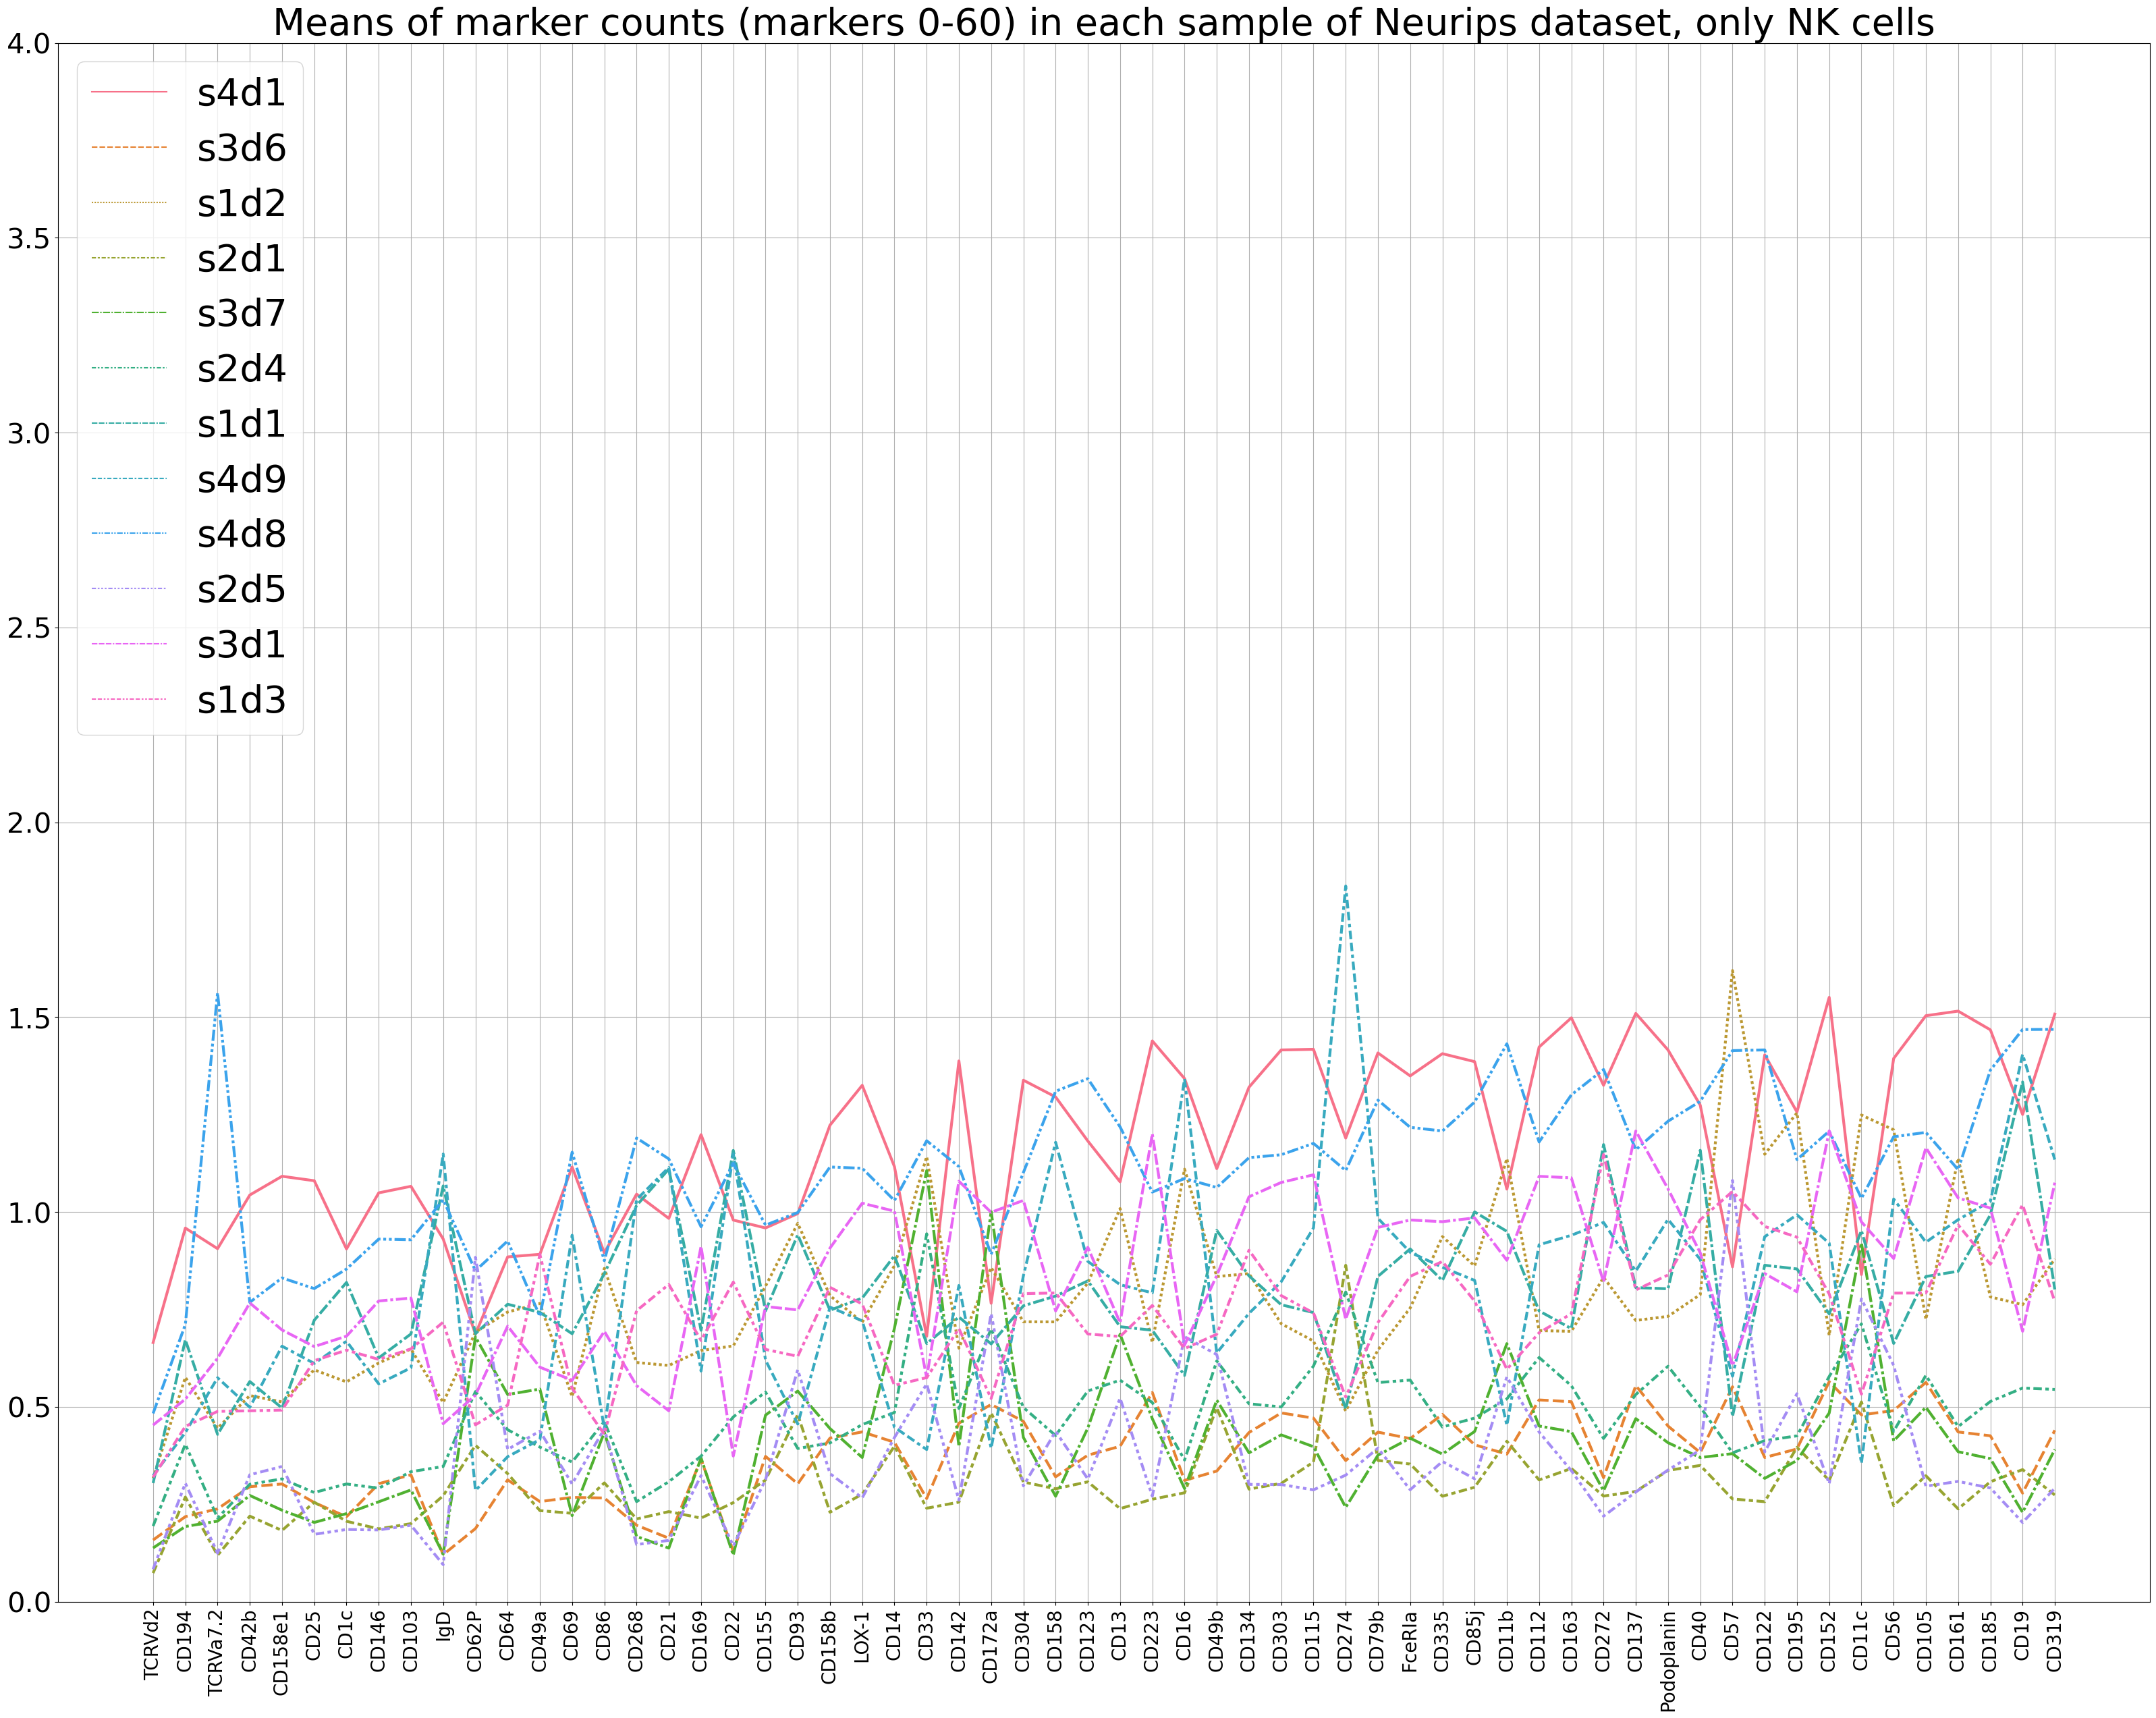

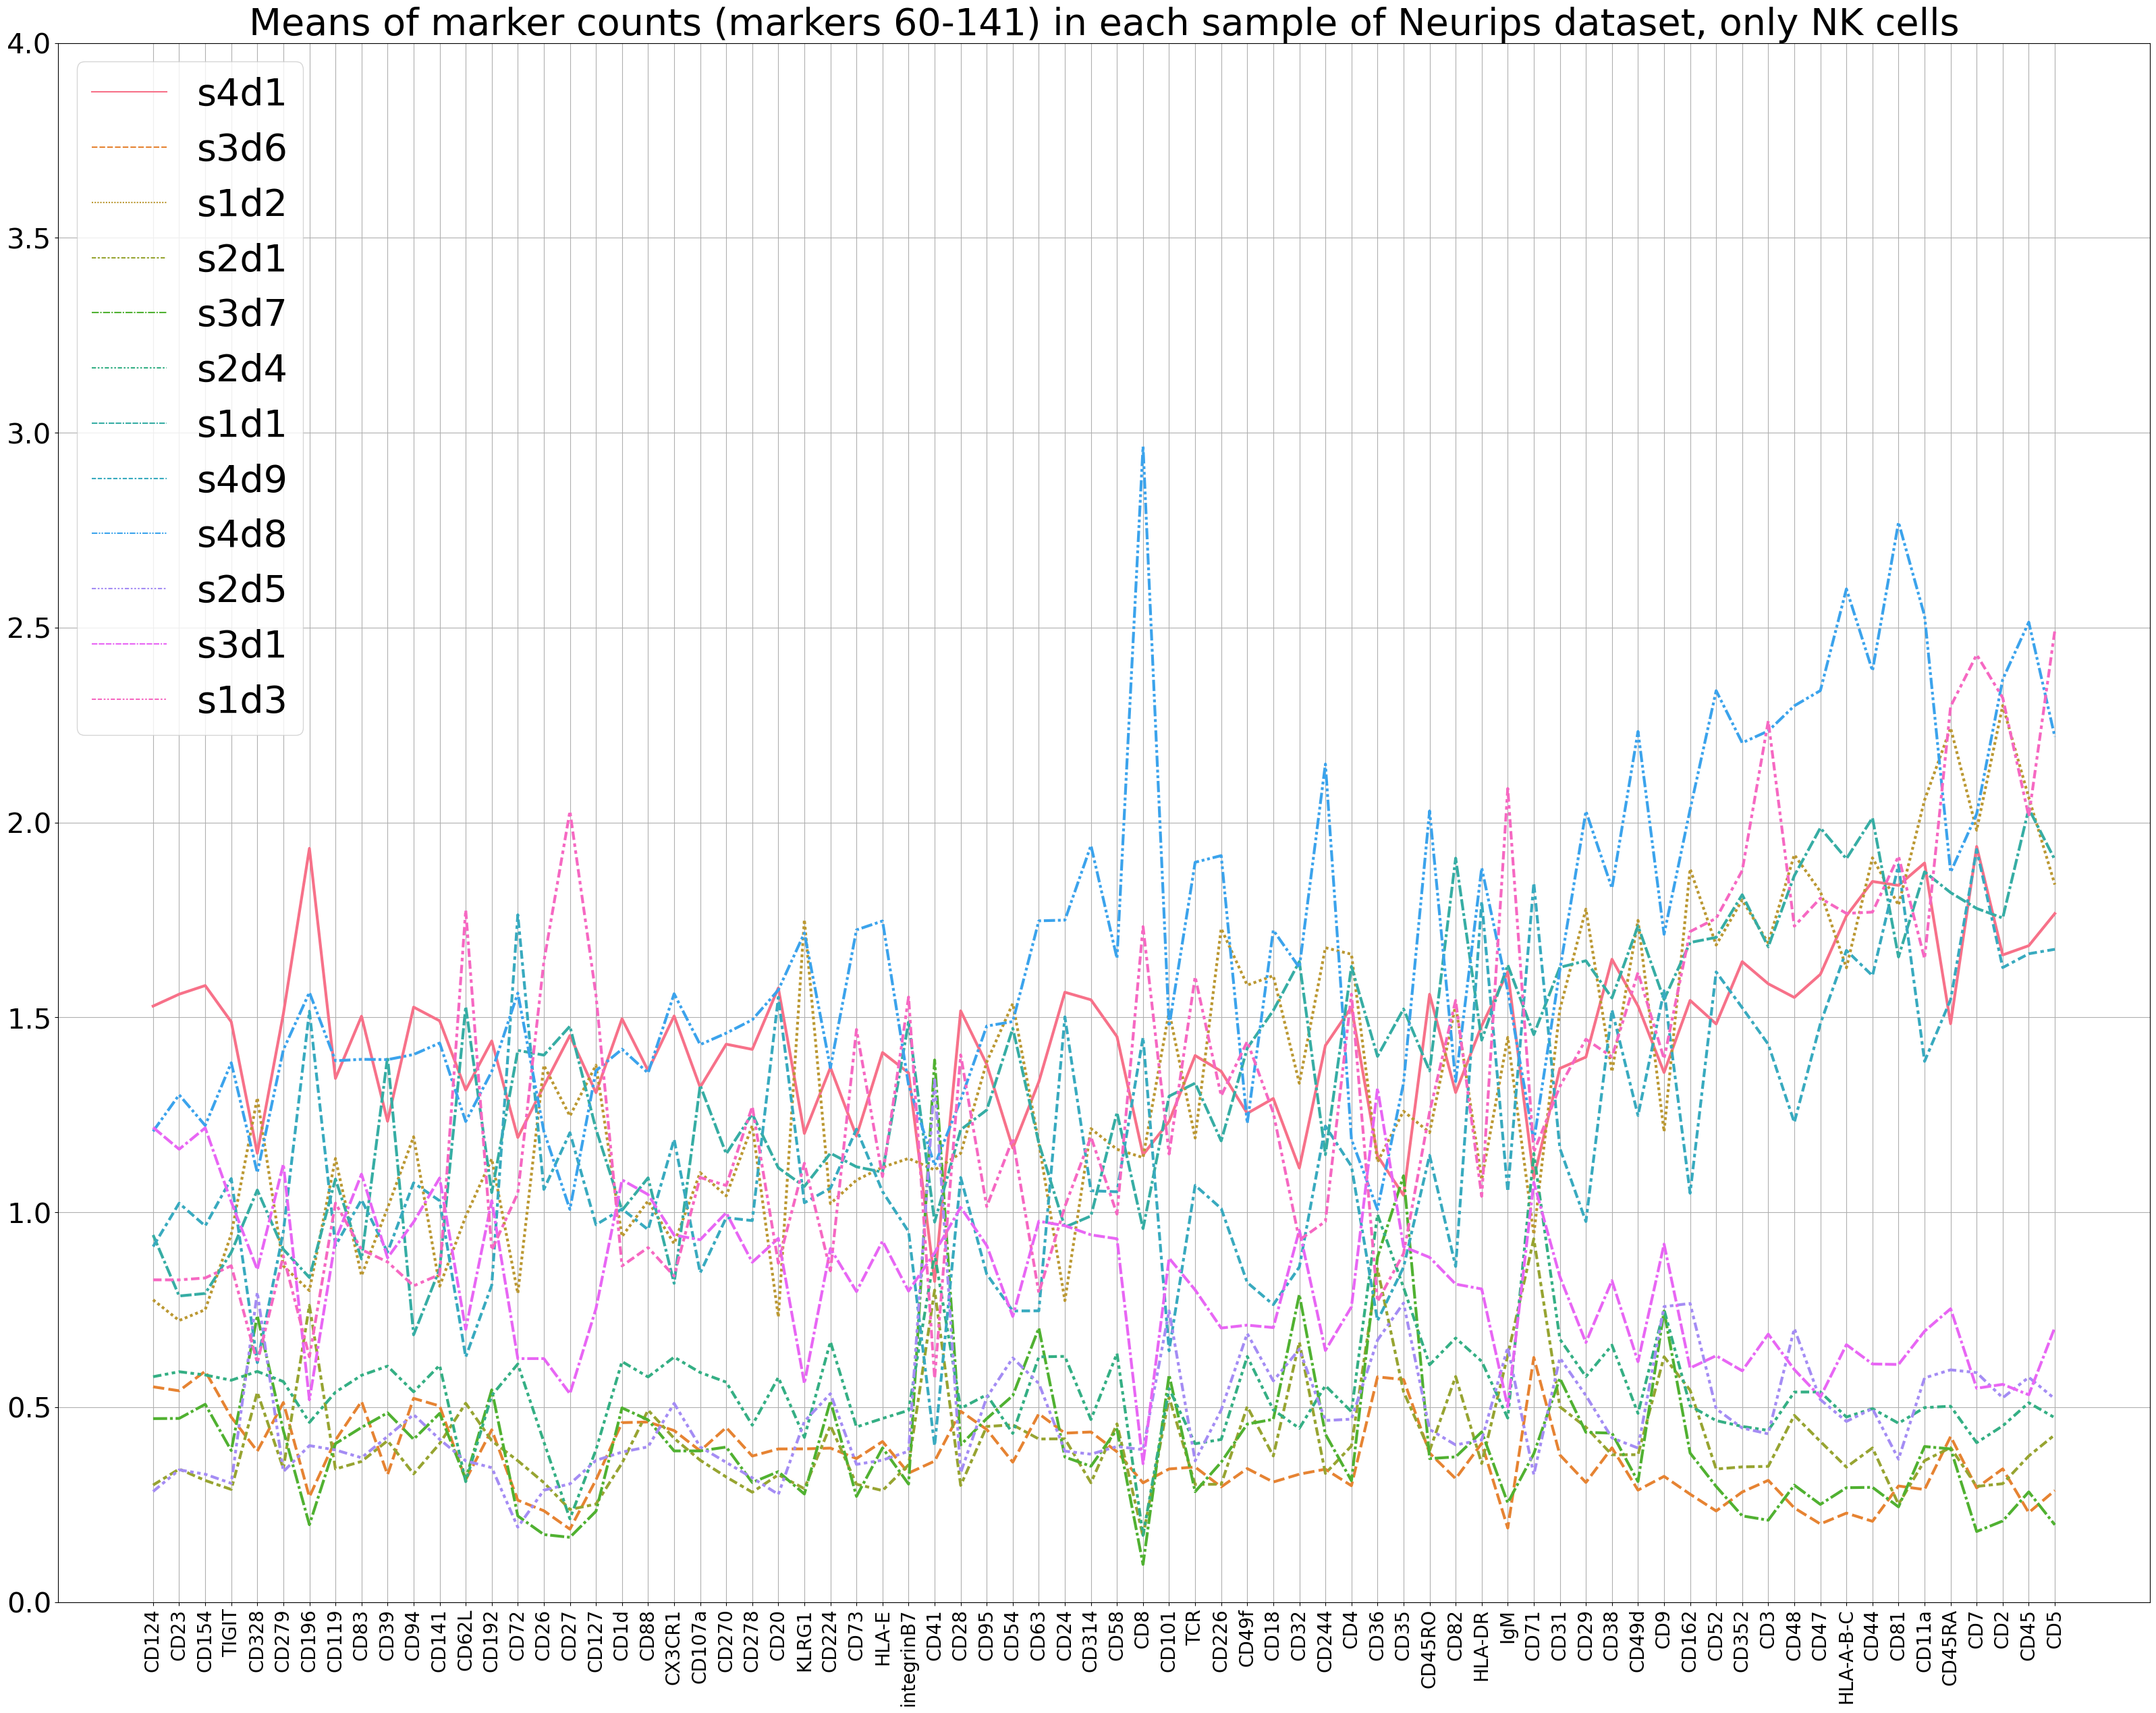

In [219]:
#only NK cells selected from each sample, CLR normalized

palette = sns.color_palette("husl", 12)


plt.figure(figsize=[40,30])
a= sns.lineplot(data=df_sorted.iloc[:60], palette=palette, linewidth = 3)
a.set_xticklabels(a.get_xticklabels(),rotation=90) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 4)
plt.legend(loc='upper left', fontsize = 40, facecolor='white')
plt.grid()
plt.title("Means of marker counts (markers 0-60) in each sample of Neurips dataset, only NK cells", fontsize=40) ;


plt.figure(figsize=[40,30])
b= sns.lineplot(data=df_sorted.iloc[60:], palette=palette, linewidth = 3)
b.set_xticklabels(b.get_xticklabels(),rotation=90) 
b.tick_params(axis='x', labelsize=20)
b.tick_params(axis='y', labelsize=30)
plt.ylim(0, 4)
plt.legend(loc='upper left', fontsize = 40, facecolor='white')
plt.grid()
plt.title("Means of marker counts (markers 60-141) in each sample of Neurips dataset, only NK cells", fontsize=40) ;


### Granja

In [45]:
samples_g=adata_granja.obs['POOL'].unique().tolist()
samples_g

['GSM4138872', 'GSM4138873', 'GSM4138874', 'GSM4138880', 'GSM4138885']

In [46]:
#save means of protein counts/each protein/each sample into a list

list_samples_g= []

for sample in samples_g:
    eg=adata_granja[adata_granja.obs['new_cell_type'] == 'NK']
    eg=adata_granja[adata_granja.obs['POOL'] == sample]
    prot=eg.obsm['protein_expression_clr_granja']
    prot_mean=prot.mean(axis=0).sort_values()
    list_samples_g.append(prot_mean)

In [47]:
list_samples_g

[CD86      0.000000
 CD71      0.000000
 CD22      0.000000
 CD45      0.000000
 CD38      0.000000
             ...   
 CD127     1.998479
 CD15      2.009149
 CD45RO    2.271810
 CD3       2.338250
 CD4       2.476718
 Length: 141, dtype: float64,
 CD86      0.000000
 CD71      0.000000
 CD22      0.000000
 CD45      0.000000
 CD38      0.000000
             ...   
 CD127     2.133368
 CD15      2.154709
 CD45RO    2.376299
 CD3       2.458645
 CD4       2.554184
 Length: 141, dtype: float64,
 CD86     0.000000
 CD45     0.000000
 CD127    0.000000
 CD38     0.000000
 CD28     0.000000
            ...   
 CD7      0.961817
 CD90     1.433383
 CD10     1.742136
 CD123    2.052254
 CD34     3.957347
 Length: 141, dtype: float64,
 CD86     0.000000
 CD45     0.000000
 CD127    0.000000
 CD38     0.000000
 CD28     0.000000
            ...   
 CD90     1.124592
 CD123    2.787030
 CD7      3.082204
 CD33     3.625896
 CD34     4.028166
 Length: 141, dtype: float64,
 CD86     0.000000
 CD

In [87]:
all_cells_granja=[]
nk_cell_granja=[]

for sample in samples_g:
    all_cells_granja.append(len(adata_granja[adata_granja.obs['POOL'] == sample]))
    nk_cell_granja.append(len(granja_nk[granja_nk.obs['POOL'] == sample]))

print(all_cells_granja)
print(nk_cell_granja)

[6194, 6247, 1856, 5812, 4095]
[517, 516, 0, 0, 0]


In [48]:
#save column names
proteins=adata_granja.obsm['protein_expression_clr_granja'].columns

In [49]:
#creating a dataframe from list of lists

df_g= pd.DataFrame(list_samples_g, columns = proteins)

df_g

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  CD154  CD52  ...  \
0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
1   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
2   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
3   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
4   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   

   CD101  CD88  CD224  CD197      CD34      CD10      CD90      CD15  CD117  \
0    0.0   0.0    0.0    0.0  0.000000  0.000000  0.000000  2.009149    0.0   
1    0.0   0.0    0.0    0.0  0.000000  0.000000  0.000000  2.154709    0.0   
2    0.0   0.0    0.0    0.0  3.957347  1.742136  1.433383  0.000000    0.0   
3    0.0   0.0    0.0    0.0  4.028166  0.907976  1.124592  0.000000    0.0   
4    0.0   0.0    0.0    0.0  0.792122  0.039939  0.033877  0.000000    0.0   

   CD66ace  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 141 columns]

In [50]:
df_g=df_g.T

df_g

0         1         2         3         4
CD86     0.000000  0.000000  0.000000  0.000000  0.000000
CD274    0.000000  0.000000  0.000000  0.000000  0.000000
CD270    0.000000  0.000000  0.000000  0.000000  0.000000
CD155    0.000000  0.000000  0.000000  0.000000  0.000000
CD112    0.000000  0.000000  0.000000  0.000000  0.000000
...           ...       ...       ...       ...       ...
CD10     0.000000  0.000000  1.742136  0.907976  0.039939
CD90     0.000000  0.000000  1.433383  1.124592  0.033877
CD15     2.009149  2.154709  0.000000  0.000000  0.000000
CD117    0.000000  0.000000  0.000000  0.000000  0.000000
CD66ace  0.000000  0.000000  0.000000  0.000000  0.000000

[141 rows x 5 columns]

In [51]:
#add column names

df_g.columns=samples_g

df_g

GSM4138872  GSM4138873  GSM4138874  GSM4138880  GSM4138885
CD86       0.000000    0.000000    0.000000    0.000000    0.000000
CD274      0.000000    0.000000    0.000000    0.000000    0.000000
CD270      0.000000    0.000000    0.000000    0.000000    0.000000
CD155      0.000000    0.000000    0.000000    0.000000    0.000000
CD112      0.000000    0.000000    0.000000    0.000000    0.000000
...             ...         ...         ...         ...         ...
CD10       0.000000    0.000000    1.742136    0.907976    0.039939
CD90       0.000000    0.000000    1.433383    1.124592    0.033877
CD15       2.009149    2.154709    0.000000    0.000000    0.000000
CD117      0.000000    0.000000    0.000000    0.000000    0.000000
CD66ace    0.000000    0.000000    0.000000    0.000000    0.000000

[141 rows x 5 columns]

In [52]:
df_g=df_g.T

df_g

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  CD154  CD52  \
GSM4138872   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0   
GSM4138873   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0   
GSM4138874   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0   
GSM4138880   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0   
GSM4138885   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0   

            ...  CD101  CD88  CD224  CD197      CD34      CD10      CD90  \
GSM4138872  ...    0.0   0.0    0.0    0.0  0.000000  0.000000  0.000000   
GSM4138873  ...    0.0   0.0    0.0    0.0  0.000000  0.000000  0.000000   
GSM4138874  ...    0.0   0.0    0.0    0.0  3.957347  1.742136  1.433383   
GSM4138880  ...    0.0   0.0    0.0    0.0  4.028166  0.907976  1.124592   
GSM4138885  ...    0.0   0.0    0.0    0.0  0.792122  0.039939  0.033877   

                CD15  CD117  CD66ace  
GSM4138872  2.009149    0.0      0.0  
GSM4138873  2.154709    0.0      0.0  
GSM4138874  0.000000    0.0      0.0  
GSM4138880  0.000000    0.0      0.0  
GSM4138885  0.000000    0.0      0.0  

[5 rows x 141 columns]

In [53]:
#remove columns that contain only zeros

df_g = pd.DataFrame(df_g)
df_g != 0
(df_g != 0).any(axis=0)
df_g.loc[:, (df_g != 0).any(axis=0)]
df_g = df_g.loc[:, (df_g != 0).any(axis=0)]

df_g

CD3       CD8      CD56      CD19      CD33    CD45RA  \
GSM4138872  2.338250  1.600122  1.557328  1.138823  0.000000  1.506254   
GSM4138873  2.458645  1.747759  1.717154  1.254067  0.000000  1.622308   
GSM4138874  0.531317  0.876031  0.000000  0.754014  0.928664  0.891411   
GSM4138880  0.162666  0.297205  0.000000  0.529258  3.625896  0.892540   
GSM4138885  0.062129  0.223176  0.000000  0.017529  0.058753  0.059387   

               CD123       CD7       CD4      CD14      CD16      CD25  \
GSM4138872  0.000000  0.000000  2.476718  1.886085  1.482725  1.715793   
GSM4138873  0.000000  0.000000  2.554184  1.991724  1.633930  1.877548   
GSM4138874  2.052254  0.961817  0.503113  0.087274  0.000000  0.000000   
GSM4138880  2.787030  3.082204  0.240746  0.226270  0.000000  0.000000   
GSM4138885  0.144306  0.447788  0.014363  0.011476  0.000000  0.000000   

              CD45RO     CD279     TIGIT     CD127      CD34      CD10  \
GSM4138872  2.271810  1.645894  1.265601  1.998479  0.000000  0.000000   
GSM4138873  2.376299  1.815823  1.402273  2.133368  0.000000  0.000000   
GSM4138874  0.000000  0.000000  0.000000  0.000000  3.957347  1.742136   
GSM4138880  0.000000  0.000000  0.000000  0.000000  4.028166  0.907976   
GSM4138885  0.000000  0.000000  0.000000  0.000000  0.792122  0.039939   

                CD90      CD15  
GSM4138872  0.000000  2.009149  
GSM4138873  0.000000  2.154709  
GSM4138874  1.433383  0.000000  
GSM4138880  1.124592  0.000000  
GSM4138885  0.033877  0.000000

In [54]:
index_sort = df_g.mean().sort_values().index
df_sorted_g = df_g[index_sort]

df_sorted_g

CD90     TIGIT      CD10      CD16      CD56     CD279  \
GSM4138872  0.000000  1.265601  0.000000  1.482725  1.557328  1.645894   
GSM4138873  0.000000  1.402273  0.000000  1.633930  1.717154  1.815823   
GSM4138874  1.433383  0.000000  1.742136  0.000000  0.000000  0.000000   
GSM4138880  1.124592  0.000000  0.907976  0.000000  0.000000  0.000000   
GSM4138885  0.033877  0.000000  0.039939  0.000000  0.000000  0.000000   

                CD25      CD19     CD127      CD15      CD14       CD7  \
GSM4138872  1.715793  1.138823  1.998479  2.009149  1.886085  0.000000   
GSM4138873  1.877548  1.254067  2.133368  2.154709  1.991724  0.000000   
GSM4138874  0.000000  0.754014  0.000000  0.000000  0.087274  0.961817   
GSM4138880  0.000000  0.529258  0.000000  0.000000  0.226270  3.082204   
GSM4138885  0.000000  0.017529  0.000000  0.000000  0.011476  0.447788   

                CD33    CD45RO       CD8    CD45RA     CD123       CD3  \
GSM4138872  0.000000  2.271810  1.600122  1.506254  0.000000  2.338250   
GSM4138873  0.000000  2.376299  1.747759  1.622308  0.000000  2.458645   
GSM4138874  0.928664  0.000000  0.876031  0.891411  2.052254  0.531317   
GSM4138880  3.625896  0.000000  0.297205  0.892540  2.787030  0.162666   
GSM4138885  0.058753  0.000000  0.223176  0.059387  0.144306  0.062129   

                 CD4      CD34  
GSM4138872  2.476718  0.000000  
GSM4138873  2.554184  0.000000  
GSM4138874  0.503113  3.957347  
GSM4138880  0.240746  4.028166  
GSM4138885  0.014363  0.792122

In [55]:
df_sorted_g=df_sorted_g.T

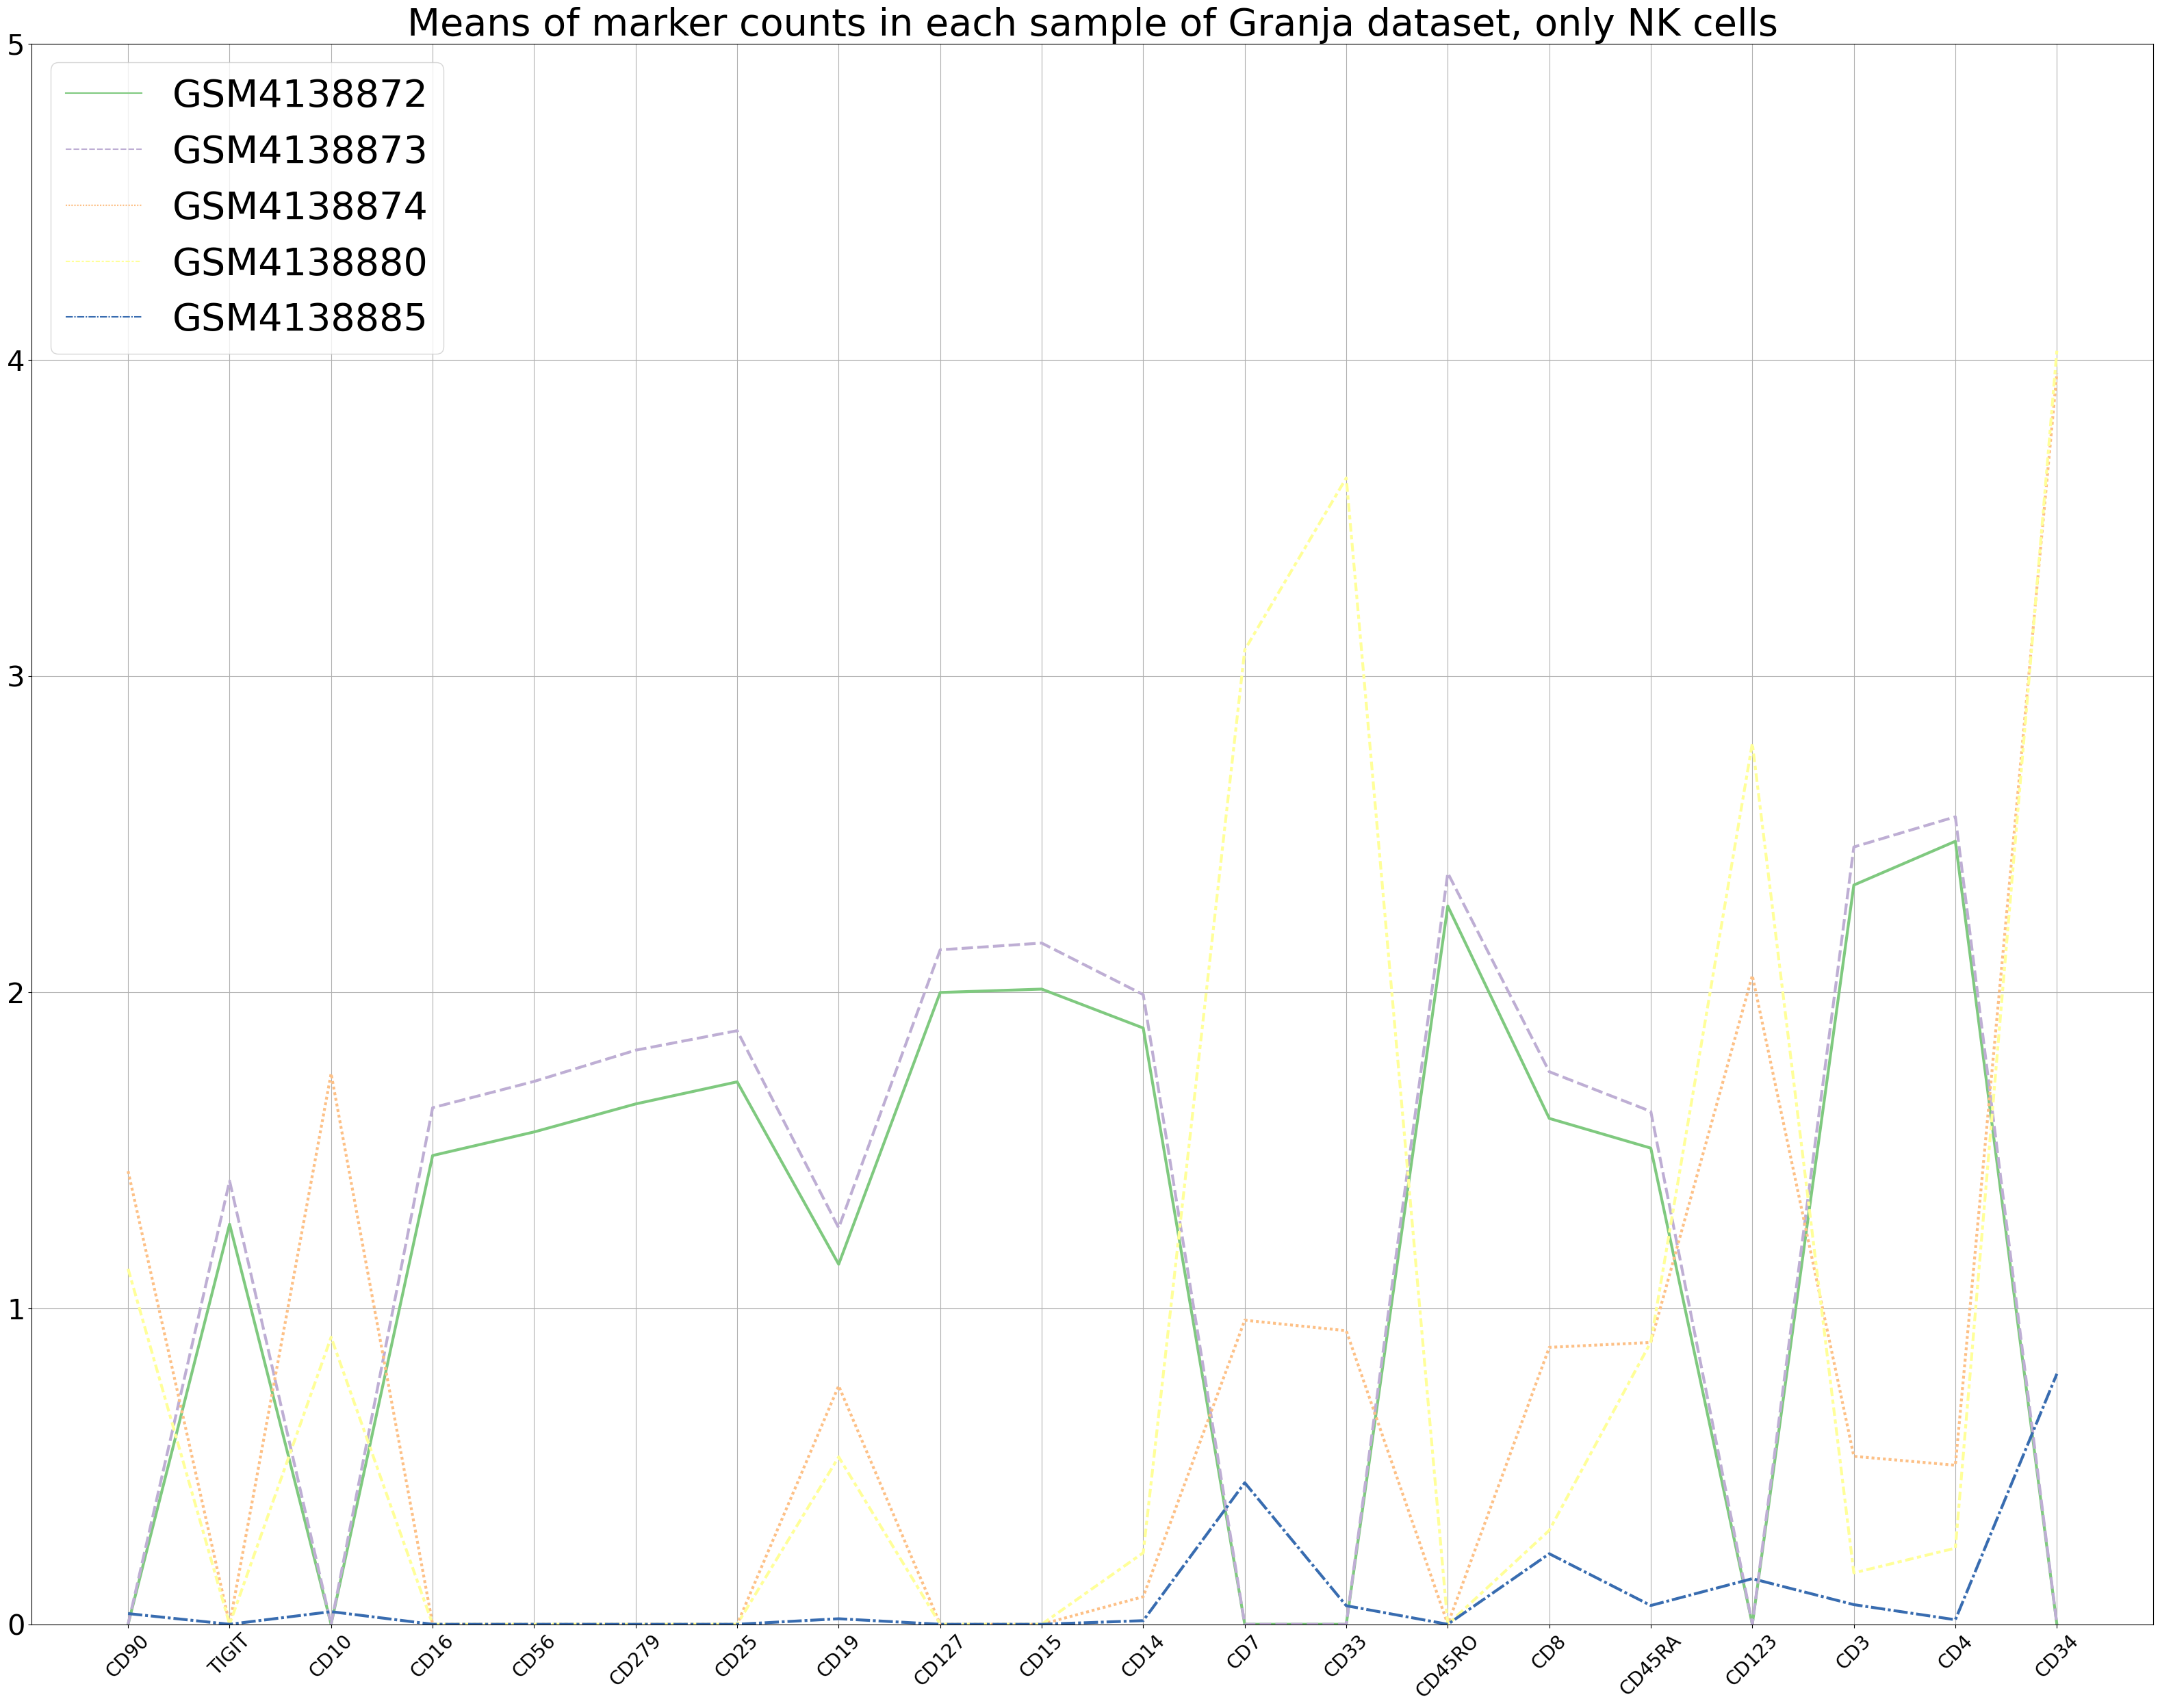

In [225]:
#Only NK cells from each sample selected, CLR normalized

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=df_sorted_g, palette=palette, linewidth = 3)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 5)
plt.legend(loc='upper left', fontsize = 40, facecolor='white')
plt.grid()
plt.title("Means of marker counts in each sample of Granja dataset, only NK cells", fontsize=40) ;




### Easigenomics

In [57]:
samples_e=adata_easi.obs['POOL'].unique().tolist()
samples_e

['EG35',
 'EG38',
 'EG58',
 'EG39',
 'EG4',
 'EG48',
 'EG23',
 'EG36',
 'EG61',
 'EG3',
 'EG12',
 'EG46',
 'EG9',
 'EG43',
 'EG56',
 'EG42',
 'EG49',
 'EG37',
 'EG57',
 'EG24',
 'EG11',
 'EG14',
 'EG55',
 'EG28',
 'EG52',
 'EG33',
 'EG10',
 'EG32',
 'EG59',
 'EG16',
 'EG63',
 'EG15',
 'EG21',
 'EG26',
 'EG13',
 'EG53',
 'EG51',
 'EG2',
 'EG40',
 'EG62',
 'EG31',
 'EG7',
 'EG8',
 'EG29',
 'EG41',
 'EG47',
 'EG1',
 'EG6',
 'EG34',
 'EG30',
 'EG60',
 'EG44',
 'EG27',
 'EG22',
 'EG54',
 'EG45',
 'EG5',
 'EG50',
 'EG25']

In [58]:
#save means of protein counts/each protein/each sample into a list

list_samples_e= []

for sample in samples_e:
    eg=adata_easi[adata_easi.obs['new_cell_type'] == 'NKT']
    eg=adata_easi[adata_easi.obs['POOL'] == sample]
    prot=eg.obsm['protein_expression_clr']
    prot_mean=prot.mean(axis=0).sort_values()
    list_samples_e.append(prot_mean)

In [59]:
list_samples_e

[CD13       0.265699
 CD24       0.340534
 CD117      0.353292
 CD127      0.411660
 CD73       0.414128
 CD64       0.416107
 CD19       0.448537
 CD3        0.494654
 CD10       0.517241
 CD38       0.539151
 CD197      0.566698
 CD58       0.569441
 CD45RO     0.577295
 CD33       0.579743
 CD45RA     0.616340
 CD56       0.618250
 CD123      0.647629
 CD66ace    0.667035
 CD14       0.669005
 CD20       0.694089
 CD34       0.723954
 CD5        0.739384
 CD8a       0.739866
 CD4        0.778748
 CD81       0.884947
 CD11b      0.910486
 CD7        0.982956
 CD11c      0.987901
 CD15       1.000074
 HLADR      1.138282
 CD45       1.581447
 CD2        1.606367
 CD44       2.578000
 dtype: float64,
 CD13       0.173746
 CD24       0.230233
 CD127      0.294504
 CD45RA     0.328251
 CD38       0.329450
 CD20       0.392649
 CD197      0.400206
 CD8a       0.420984
 CD5        0.431901
 CD7        0.436479
 CD33       0.457584
 CD45RO     0.465233
 CD64       0.468107
 CD14       0.496

In [90]:
all_cells_easi=[]
nkt_cell_easi=[]

for sample in samples_e:
    all_cells_easi.append(len(adata_easi[adata_easi.obs['POOL'] == sample]))
    nkt_cell_easi.append(len(easi_nkt[easi_nkt.obs['POOL'] == sample]))

print(all_cells_easi)
print(nkt_cell_easi)

[2188, 681, 3980, 5455, 1587, 1734, 35, 2169, 444, 131, 4864, 2064, 1107, 2435, 3763, 3123, 2111, 143, 1611, 1067, 480, 1756, 3736, 1304, 1670, 3199, 6262, 789, 2016, 2488, 1753, 584, 2394, 3125, 845, 2682, 2856, 1771, 2973, 572, 373, 709, 3020, 1323, 1735, 3523, 116, 2981, 1112, 2914, 1497, 2837, 837, 3663, 94, 3753, 1417, 2297, 3192]
[1226, 34, 1057, 538, 0, 57, 0, 1585, 23, 0, 1670, 1913, 26, 187, 809, 508, 131, 37, 887, 12, 51, 1004, 2483, 0, 636, 282, 3688, 142, 454, 1829, 40, 70, 39, 0, 263, 349, 150, 0, 602, 38, 0, 0, 0, 0, 541, 2508, 0, 0, 1011, 0, 0, 72, 0, 176, 49, 103, 0, 362, 96]


In [60]:
#save column names
proteins=adata_easi.obsm['protein_expression_clr'].columns

In [61]:
#creating a dataframe from list of lists

df_e= pd.DataFrame(list_samples_e, columns = proteins)

df_e

CD19      CD10      CD20       CD3       CD2     CD11b     HLADR  \
0   0.448537  0.517241  0.694089  0.494654  1.606367  0.910486  1.138282   
1   0.733674  1.089288  0.392649  0.833598  0.756523  0.651989  1.150177   
2   0.305262  0.482434  0.626202  0.248340  1.407541  1.584338  1.523780   
3   0.691737  0.986514  0.392102  0.791845  0.836717  0.612555  1.090049   
4   0.563074  0.995529  0.260906  0.496335  2.683623  1.342541  0.501954   
5   0.549411  0.717000  0.517116  0.343366  0.813547  1.179146  1.508922   
6   0.796607  3.005452  0.806256  0.746655  0.726841  1.026456  1.092794   
7   0.377700  0.564714  0.492597  0.578518  2.128343  0.814797  0.920698   
8   0.391122  0.522505  0.586464  0.287238  0.867662  0.915611  2.114939   
9   0.266180  0.998670  0.295110  0.716553  2.490606  1.209066  0.629620   
10  0.973342  1.345923  0.329138  0.396216  1.725110  1.539294  0.946302   
11  0.479148  0.550196  0.638762  0.398954  1.427607  0.729867  0.921759   
12  2.485645  2.413838  0.461099  0.246130  0.709492  1.172620  1.587635   
13  0.262998  0.592775  0.278814  0.285525  4.279389  0.440074  2.449659   
14  0.562655  0.626202  0.707155  0.372900  1.074846  0.860664  1.095819   
15  0.296521  0.627551  0.323903  0.233800  1.209568  0.510642  2.591222   
16  0.534748  0.698661  0.475574  0.383422  0.899861  0.909344  1.326490   
17  0.495410  0.668705  0.655966  0.368747  1.286157  0.805065  1.026563   
18  0.319615  0.471378  0.658934  0.444466  2.047489  1.025916  1.036709   
19  1.228374  3.671207  0.895507  0.683695  0.534554  0.639745  1.627194   
20  1.782034  3.918913  0.336629  0.187702  0.995112  1.380376  1.801659   
21  1.184852  2.277077  0.514161  0.242711  1.336285  1.488085  1.014428   
22  0.536673  0.568852  0.671448  0.408414  1.371632  0.861239  1.001360   
23  0.510814  1.138978  0.406046  0.457468  0.883199  0.869945  0.809762   
24  0.509963  0.636275  0.594484  0.366059  1.118538  0.783047  1.334995   
25  0.575355  0.706480  0.608374  0.305136  0.885789  0.868721  0.908885   
26  1.068242  1.179713  0.952765  0.635362  2.378373  1.257941  1.282464   
27  0.585741  0.735700  0.744420  0.327289  0.941792  0.864910  0.931040   
28  0.534060  0.625217  0.662745  0.372214  1.082605  0.874006  1.158000   
29  1.201598  1.916706  0.484066  0.321569  1.387937  1.696355  0.844637   
30  0.324378  0.448711  0.488013  0.237394  0.751091  1.464045  2.056684   
31  1.476700  2.013784  0.429390  0.245128  0.767168  1.678677  1.202339   
32  1.331273  3.619568  0.432006  0.200591  0.706637  0.735541  1.306663   
33  0.389516  0.899711  0.913814  0.295489  1.545469  1.028901  1.210759   
34  1.306242  2.767509  0.442405  0.253799  1.021475  1.433807  1.601782   
35  0.574408  0.674223  0.578290  0.327163  0.934251  0.667983  1.453672   
36  1.150099  0.413413  0.480179  0.224552  0.852008  0.581694  2.520793   
37  0.628058  1.203302  0.412824  0.648815  2.652521  1.131366  0.710693   
38  0.356764  0.454472  0.428388  0.334980  1.099127  0.637878  1.191470   
39  0.308840  0.431511  0.460336  0.219137  0.744214  1.812329  1.864799   
40  0.592654  0.822533  0.764059  0.379360  0.952348  0.825435  0.903261   
41  0.347850  0.830483  0.401087  0.381246  0.923057  0.912264  1.507240   
42  0.353389  0.910044  0.443741  0.403338  0.831650  0.979401  1.380372   
43  0.458280  1.426499  0.377456  0.603557  1.055979  0.822768  0.668600   
44  0.392246  0.450232  0.441026  0.520892  1.535879  0.594616  0.946870   
45  0.486688  0.545124  0.620468  0.382249  1.495564  0.807083  0.946917   
46  0.328282  1.265878  0.475668  0.755967  2.406954  1.059137  0.843017   
47  0.503544  1.131779  0.420148  0.301560  0.893796  1.216904  1.212942   
48  0.404747  0.539183  0.627590  0.508886  1.664147  0.727620  0.866737   
49  0.596054  0.828128  0.784815  0.347362  0.838926  0.883467  1.005038   
50  0.499037  0.588941  0.607292  0.308735  0.815296  1.253198  1.058227   
51  0.300041  0.509719  0.411041  0.192181  1.347673  1.

In [62]:
df_e=df_e.T

df_e

0         1         2         3         4         5         6   \
CD19     0.448537  0.733674  0.305262  0.691737  0.563074  0.549411  0.796607   
CD10     0.517241  1.089288  0.482434  0.986514  0.995529  0.717000  3.005452   
CD20     0.694089  0.392649  0.626202  0.392102  0.260906  0.517116  0.806256   
CD3      0.494654  0.833598  0.248340  0.791845  0.496335  0.343366  0.746655   
CD2      1.606367  0.756523  1.407541  0.836717  2.683623  0.813547  0.726841   
CD11b    0.910486  0.651989  1.584338  0.612555  1.342541  1.179146  1.026456   
HLADR    1.138282  1.150177  1.523780  1.090049  0.501954  1.508922  1.092794   
CD38     0.539151  0.329450  0.679263  0.360523  1.271636  0.761560  0.434401   
CD11c    0.987901  0.560880  1.571974  0.597207  0.493910  1.402230  0.788130   
CD7      0.982956  0.436479  0.821965  0.552535  3.469045  0.488444  0.380121   
CD45     1.581447  1.067457  1.690245  1.009070  1.261513  1.503869  1.006317   
CD33     0.579743  0.457584  1.190742  1.077105  0.717525  0.645155  0.618616   
CD81     0.884947  0.849688  0.657749  0.718990  0.885145  0.682107  0.692601   
CD73     0.414128  1.075815  0.245087  1.048470  0.639973  0.282186  1.104866   
CD123    0.647629  0.901923  0.779253  0.877279  0.426961  0.854404  0.648369   
CD14     0.669005  0.496538  0.829501  0.492651  0.365596  0.625686  0.614000   
CD45RA   0.616340  0.328251  0.444526  0.344890  1.203895  0.681126  0.451445   
CD45RO   0.577295  0.465233  0.478126  0.471634  0.294266  0.552821  0.439561   
CD4      0.778748  0.599137  0.952236  0.729407  0.380979  0.805807  0.644715   
CD8a     0.739866  0.420984  0.495728  0.429063  0.334275  0.307097  0.704664   
CD197    0.566698  0.400206  0.300790  0.378870  0.217810  0.359882  0.327366   
CD127    0.411660  0.294504  0.330374  0.298505  0.472099  0.339053  0.341351   
CD56     0.618250  0.740529  0.649828  0.717299  0.804081  0.531634  0.686581   
CD5      0.739384  0.431901  0.582078  0.510782  0.839155  0.352358  0.403047   
CD15     1.000074  1.115313  0.806806  1.078738  1.024278  0.959233  0.822555   
CD64     0.416107  0.468107  0.787143  0.444188  0.128840  0.520424  0.544582   
CD117    0.353292  1.642199  0.242874  1.139615  1.157520  0.872469  0.337555   
CD24     0.340534  0.230233  0.245265  0.260386  0.133427  0.252657  0.362959   
CD44     2.578000  2.138599  3.236163  2.553254  2.327197  3.369586  2.165675   
CD58     0.569441  1.127362  0.683364  1.247979  0.588197  2.098770  0.713014   
CD66ace  0.667035  0.534961  0.441328  0.518352  0.193379  0.469138  0.510630   
CD13     0.265699  0.173746  0.569654  0.238786  0.144667  0.222388  0.258271   
CD34     0.723954  1.249160  0.537006  0.936024  1.029990  1.053661  1.341737   

               7         8         9   ...        49        50        51  \
CD19     0.377700  0.391122  0.266180  ...  0.596054  0.499037  0.300041   
CD10     0.564714  0.522505  0.998670  ...  0.828128  0.588941  0.509719   
CD20     0.492597  0.586464  0.295110  ...  0.784815  0.607292  0.411041   
CD3      0.578518  0.287238  0.716553  ...  0.347362  0.308735  0.192181   
CD2      2.128343  0.867662  2.490606  ...  0.838926  0.815296  1.347673   
CD11b    0.814797  0.915611  1.209066  ...  0.883467  1.253198  1.306381   
HLADR    0.920698  2.114939  0.629620  ...  1.005038  1.058227  1.910737   
CD38     0.555779  0.510450  0.460375  ...  0.892021  0.474534  0.697476   
CD11c    0.789727  1.187394  0.343037  ...  0.803545  0.958856  1.314410   
CD7      1.272757  0.378065  1.977228  ...  0.524332  0.386120  0.531747   
CD45     1.735112  1.248019  2.072622  ...  0.576953  0.971872  1.853994   
CD33     0.471471  1.001446  0.471090  ...  0.577128  0.889714  1.645008   
CD81     0.968735  0.915680  1.097668  ...  0.686590  0.759462  0.595944   
CD73     0.315076  0.315084  0.442528  ...  0.454250  0.397642  0.426699   
CD123    0.478169  0.743228  0.362218  ...  0.754099  0.773067  0.790694   
CD14     0.689512  0.806719  0.376965  ...  

In [63]:
#add column names

df_e.columns=samples_e

df_e

EG35      EG38      EG58      EG39       EG4      EG48      EG23  \
CD19     0.448537  0.733674  0.305262  0.691737  0.563074  0.549411  0.796607   
CD10     0.517241  1.089288  0.482434  0.986514  0.995529  0.717000  3.005452   
CD20     0.694089  0.392649  0.626202  0.392102  0.260906  0.517116  0.806256   
CD3      0.494654  0.833598  0.248340  0.791845  0.496335  0.343366  0.746655   
CD2      1.606367  0.756523  1.407541  0.836717  2.683623  0.813547  0.726841   
CD11b    0.910486  0.651989  1.584338  0.612555  1.342541  1.179146  1.026456   
HLADR    1.138282  1.150177  1.523780  1.090049  0.501954  1.508922  1.092794   
CD38     0.539151  0.329450  0.679263  0.360523  1.271636  0.761560  0.434401   
CD11c    0.987901  0.560880  1.571974  0.597207  0.493910  1.402230  0.788130   
CD7      0.982956  0.436479  0.821965  0.552535  3.469045  0.488444  0.380121   
CD45     1.581447  1.067457  1.690245  1.009070  1.261513  1.503869  1.006317   
CD33     0.579743  0.457584  1.190742  1.077105  0.717525  0.645155  0.618616   
CD81     0.884947  0.849688  0.657749  0.718990  0.885145  0.682107  0.692601   
CD73     0.414128  1.075815  0.245087  1.048470  0.639973  0.282186  1.104866   
CD123    0.647629  0.901923  0.779253  0.877279  0.426961  0.854404  0.648369   
CD14     0.669005  0.496538  0.829501  0.492651  0.365596  0.625686  0.614000   
CD45RA   0.616340  0.328251  0.444526  0.344890  1.203895  0.681126  0.451445   
CD45RO   0.577295  0.465233  0.478126  0.471634  0.294266  0.552821  0.439561   
CD4      0.778748  0.599137  0.952236  0.729407  0.380979  0.805807  0.644715   
CD8a     0.739866  0.420984  0.495728  0.429063  0.334275  0.307097  0.704664   
CD197    0.566698  0.400206  0.300790  0.378870  0.217810  0.359882  0.327366   
CD127    0.411660  0.294504  0.330374  0.298505  0.472099  0.339053  0.341351   
CD56     0.618250  0.740529  0.649828  0.717299  0.804081  0.531634  0.686581   
CD5      0.739384  0.431901  0.582078  0.510782  0.839155  0.352358  0.403047   
CD15     1.000074  1.115313  0.806806  1.078738  1.024278  0.959233  0.822555   
CD64     0.416107  0.468107  0.787143  0.444188  0.128840  0.520424  0.544582   
CD117    0.353292  1.642199  0.242874  1.139615  1.157520  0.872469  0.337555   
CD24     0.340534  0.230233  0.245265  0.260386  0.133427  0.252657  0.362959   
CD44     2.578000  2.138599  3.236163  2.553254  2.327197  3.369586  2.165675   
CD58     0.569441  1.127362  0.683364  1.247979  0.588197  2.098770  0.713014   
CD66ace  0.667035  0.534961  0.441328  0.518352  0.193379  0.469138  0.510630   
CD13     0.265699  0.173746  0.569654  0.238786  0.144667  0.222388  0.258271   
CD34     0.723954  1.249160  0.537006  0.936024  1.029990  1.053661  1.341737   

             EG36      EG61       EG3  ...      EG30      EG60      EG44  \
CD19     0.377700  0.391122  0.266180  ...  0.596054  0.499037  0.300041   
CD10     0.564714  0.522505  0.998670  ...  0.828128  0.588941  0.509719   
CD20     0.492597  0.586464  0.295110  ...  0.784815  0.607292  0.411041   
CD3      0.578518  0.287238  0.716553  ...  0.347362  0.308735  0.192181   
CD2      2.128343  0.867662  2.490606  ...  0.838926  0.815296  1.347673   
CD11b    0.814797  0.915611  1.209066  ...  0.883467  1.253198  1.306381   
HLADR    0.920698  2.114939  0.629620  ...  1.005038  1.058227  1.910737   
CD38     0.555779  0.510450  0.460375  ...  0.892021  0.474534  0.697476   
CD11c    0.789727  1.187394  0.343037  ...  0.803545  0.958856  1.314410   
CD7      1.272757  0.378065  1.977228  ...  0.524332  0.386120  0.531747   
CD45     1.735112  1.248019  2.072622  ...  0.576953  0.971872  1.853994   
CD33     0.471471  1.001446  0.471090  ...  0.577128  0.889714  1.645008   
CD81     0.968735  0.915680  1.097668  ...  0.686590  0.759462  0.595944   
CD73     0.315076  0.315084  0.442528  ...  0.454250  0.397642  0.426699   
CD123    0.478169  0.743228  0.362218  ...  0.754099  0.773067  0.790694   
CD14     0.689512  0.806719  0.376965  ...

In [64]:
df_e=df_e.T

In [65]:
#remove columns that contain only zeros

df_e = pd.DataFrame(df_e)
df_e != 0
(df_e != 0).any(axis=0)
df_e.loc[:, (df_e != 0).any(axis=0)]
df_e = df_e.loc[:, (df_e != 0).any(axis=0)]

df_e

CD19      CD10      CD20       CD3       CD2     CD11b     HLADR  \
EG35  0.448537  0.517241  0.694089  0.494654  1.606367  0.910486  1.138282   
EG38  0.733674  1.089288  0.392649  0.833598  0.756523  0.651989  1.150177   
EG58  0.305262  0.482434  0.626202  0.248340  1.407541  1.584338  1.523780   
EG39  0.691737  0.986514  0.392102  0.791845  0.836717  0.612555  1.090049   
EG4   0.563074  0.995529  0.260906  0.496335  2.683623  1.342541  0.501954   
EG48  0.549411  0.717000  0.517116  0.343366  0.813547  1.179146  1.508922   
EG23  0.796607  3.005452  0.806256  0.746655  0.726841  1.026456  1.092794   
EG36  0.377700  0.564714  0.492597  0.578518  2.128343  0.814797  0.920698   
EG61  0.391122  0.522505  0.586464  0.287238  0.867662  0.915611  2.114939   
EG3   0.266180  0.998670  0.295110  0.716553  2.490606  1.209066  0.629620   
EG12  0.973342  1.345923  0.329138  0.396216  1.725110  1.539294  0.946302   
EG46  0.479148  0.550196  0.638762  0.398954  1.427607  0.729867  0.921759   
EG9   2.485645  2.413838  0.461099  0.246130  0.709492  1.172620  1.587635   
EG43  0.262998  0.592775  0.278814  0.285525  4.279389  0.440074  2.449659   
EG56  0.562655  0.626202  0.707155  0.372900  1.074846  0.860664  1.095819   
EG42  0.296521  0.627551  0.323903  0.233800  1.209568  0.510642  2.591222   
EG49  0.534748  0.698661  0.475574  0.383422  0.899861  0.909344  1.326490   
EG37  0.495410  0.668705  0.655966  0.368747  1.286157  0.805065  1.026563   
EG57  0.319615  0.471378  0.658934  0.444466  2.047489  1.025916  1.036709   
EG24  1.228374  3.671207  0.895507  0.683695  0.534554  0.639745  1.627194   
EG11  1.782034  3.918913  0.336629  0.187702  0.995112  1.380376  1.801659   
EG14  1.184852  2.277077  0.514161  0.242711  1.336285  1.488085  1.014428   
EG55  0.536673  0.568852  0.671448  0.408414  1.371632  0.861239  1.001360   
EG28  0.510814  1.138978  0.406046  0.457468  0.883199  0.869945  0.809762   
EG52  0.509963  0.636275  0.594484  0.366059  1.118538  0.783047  1.334995   
EG33  0.575355  0.706480  0.608374  0.305136  0.885789  0.868721  0.908885   
EG10  1.068242  1.179713  0.952765  0.635362  2.378373  1.257941  1.282464   
EG32  0.585741  0.735700  0.744420  0.327289  0.941792  0.864910  0.931040   
EG59  0.534060  0.625217  0.662745  0.372214  1.082605  0.874006  1.158000   
EG16  1.201598  1.916706  0.484066  0.321569  1.387937  1.696355  0.844637   
EG63  0.324378  0.448711  0.488013  0.237394  0.751091  1.464045  2.056684   
EG15  1.476700  2.013784  0.429390  0.245128  0.767168  1.678677  1.202339   
EG21  1.331273  3.619568  0.432006  0.200591  0.706637  0.735541  1.306663   
EG26  0.389516  0.899711  0.913814  0.295489  1.545469  1.028901  1.210759   
EG13  1.306242  2.767509  0.442405  0.253799  1.021475  1.433807  1.601782   
EG53  0.574408  0.674223  0.578290  0.327163  0.934251  0.667983  1.453672   
EG51  1.150099  0.413413  0.480179  0.224552  0.852008  0.581694  2.520793   
EG2   0.628058  1.203302  0.412824  0.648815  2.652521  1.131366  0.710693   
EG40  0.356764  0.454472  0.428388  0.334980  1.099127  0.637878  1.191470   
EG62  0.308840  0.431511  0.460336  0.219137  0.744214  1.812329  1.864799   
EG31  0.592654  0.822533  0.764059  0.379360  0.952348  0.825435  0.903261   
EG7   0.347850  0.830483  0.401087  0.381246  0.923057  0.912264  1.507240   
EG8   0.353389  0.910044  0.443741  0.403338  0.831650  0.979401  1.380372   
EG29  0.458280  1.426499  0.377456  0.603557  1.055979  0.822768  0.668600   
EG41  0.392246  0.450232  0.441026  0.520892  1.535879  0.594616  0.946870   
EG47  0.486688  0.545124  0.620468  0.382249  1.495564  0.807083  0.946917   
EG1   0.328282  1.265878  0.475668  0.755967  2.406954  1.059137  0.843017   
EG6   0.503544  1.131779  0.420148  0.301560  0.893796  1.216904  1.212942   
EG34  0.404747  0.539183  0.627590  0.508886  1.664147  0.727620  0.866737   
EG30  0.596054  0.828128  0.784815  0.347362  0.838926  0.883467  1.005038   
EG60  0.499037  0.588941  0.6072

In [66]:
index_sort = df_e.mean().sort_values().index
df_sorted_e = df_e[index_sort]

df_sorted_e

CD13      CD24     CD197       CD3   CD66ace      CD64     CD127  \
EG35  0.265699  0.340534  0.566698  0.494654  0.667035  0.416107  0.411660   
EG38  0.173746  0.230233  0.400206  0.833598  0.534961  0.468107  0.294504   
EG58  0.569654  0.245265  0.300790  0.248340  0.441328  0.787143  0.330374   
EG39  0.238786  0.260386  0.378870  0.791845  0.518352  0.444188  0.298505   
EG4   0.144667  0.133427  0.217810  0.496335  0.193379  0.128840  0.472099   
EG48  0.222388  0.252657  0.359882  0.343366  0.469138  0.520424  0.339053   
EG23  0.258271  0.362959  0.327366  0.746655  0.510630  0.544582  0.341351   
EG36  0.209763  0.303417  0.420495  0.578518  0.482084  0.317815  0.396162   
EG61  0.276934  0.311081  0.409461  0.287238  0.383129  0.677318  0.404612   
EG3   0.151304  0.145988  0.298769  0.716553  0.209363  0.099069  0.590999   
EG12  0.205983  0.209454  0.215659  0.396216  0.356384  0.465049  0.833907   
EG46  0.224646  0.334928  0.474188  0.398954  0.417764  0.310431  0.489104   
EG9   0.085696  0.897779  0.234667  0.246130  0.340385  0.242124  0.736899   
EG43  0.199388  0.203138  0.286288  0.285525  0.302373  0.246781  0.312806   
EG56  0.272657  0.399779  0.498856  0.372900  0.587883  0.395162  0.506004   
EG42  0.178801  0.206808  0.274688  0.233800  0.318272  0.236506  0.263394   
EG49  0.224232  0.243611  0.379833  0.383422  0.484881  0.434177  0.343444   
EG37  0.249016  0.391128  0.526530  0.368747  0.612760  0.361279  0.477197   
EG57  0.417437  0.253866  0.327576  0.444466  0.456165  0.512271  0.355966   
EG24  0.154936  0.813727  0.270337  0.683695  0.511344  0.548859  0.345742   
EG11  0.124970  0.535995  0.225844  0.187702  0.327131  0.236513  1.095652   
EG14  0.163190  0.249496  0.233197  0.242711  0.229613  0.345749  0.646141   
EG55  0.267061  0.369188  0.459502  0.408414  0.547271  0.382169  0.475882   
EG28  0.229648  0.214294  0.354093  0.457468  0.508105  0.280671  0.409130   
EG52  0.240155  0.359504  0.541031  0.366059  1.391644  0.447081  0.384665   
EG33  0.345940  0.494247  0.530647  0.305136  0.560123  0.469252  0.642001   
EG10  0.115023  0.245826  0.292452  0.635362  0.333555  0.252333  0.771156   
EG32  0.330433  0.525166  0.560151  0.327289  0.580434  0.470097  0.664362   
EG59  0.290548  0.399081  0.495346  0.372214  0.513059  0.398707  0.556866   
EG16  0.167759  0.212092  0.191019  0.321569  0.220665  0.487471  0.612893   
EG63  0.227037  0.260212  0.350686  0.237394  0.320983  1.206824  0.339461   
EG15  0.205838  0.223168  0.216470  0.245128  0.258264  0.515547  0.703293   
EG21  0.156219  0.621750  0.290342  0.200591  0.427608  0.334446  0.348979   
EG26  0.313843  0.238072  0.261485  0.295489  0.320356  0.255110  0.400966   
EG13  0.168257  0.424596  0.246910  0.253799  0.241940  0.336273  0.679443   
EG53  0.259493  0.367715  0.544519  0.327163  1.423268  0.373756  0.381743   
EG51  0.349660  0.231142  0.311654  0.224552  0.381886  0.329060  0.299061   
EG2   0.156910  0.130116  0.196571  0.648815  0.209845  0.134876  0.400589   
EG40  0.266008  0.255210  0.435384  0.334980  0.633815  1.752103  0.356164   
EG62  0.762947  0.251029  0.326388  0.219137  0.316933  1.372107  0.332862   
EG31  0.330968  0.481062  0.544896  0.379360  0.600993  0.418082  0.631898   
EG7   0.364839  0.249442  0.315475  0.381246  0.335495  0.231332  0.424044   
EG8   0.382906  0.268692  0.344611  0.403338  0.361748  0.228302  0.449833   
EG29  0.283907  0.205551  0.333388  0.603557  0.491578  0.283325  0.495976   
EG41  0.191108  0.241292  0.484658  0.520892  0.603599  1.708948  0.374615   
EG47  0.239146  0.318575  0.445057  0.382249  0.406656  0.342205  0.469938   
EG1   0.143116  0.153243  0.289874  0.755967  0.265375  0.145859  0.542724   
EG6   0.353228  0.274471  0.360115  0.301560  0.421127  0.431781  0.426585   
EG34  0.232504  0.365288  0.626174  0.508886  0.723848  0.332927  0.489506   
EG30  0.346328  0.475343  0.537947  0.347362  0.590228  0.459519  0.616856   
EG60  0.357554  0.370581  0.4483

In [67]:
df_sorted_e=df_sorted_e.T

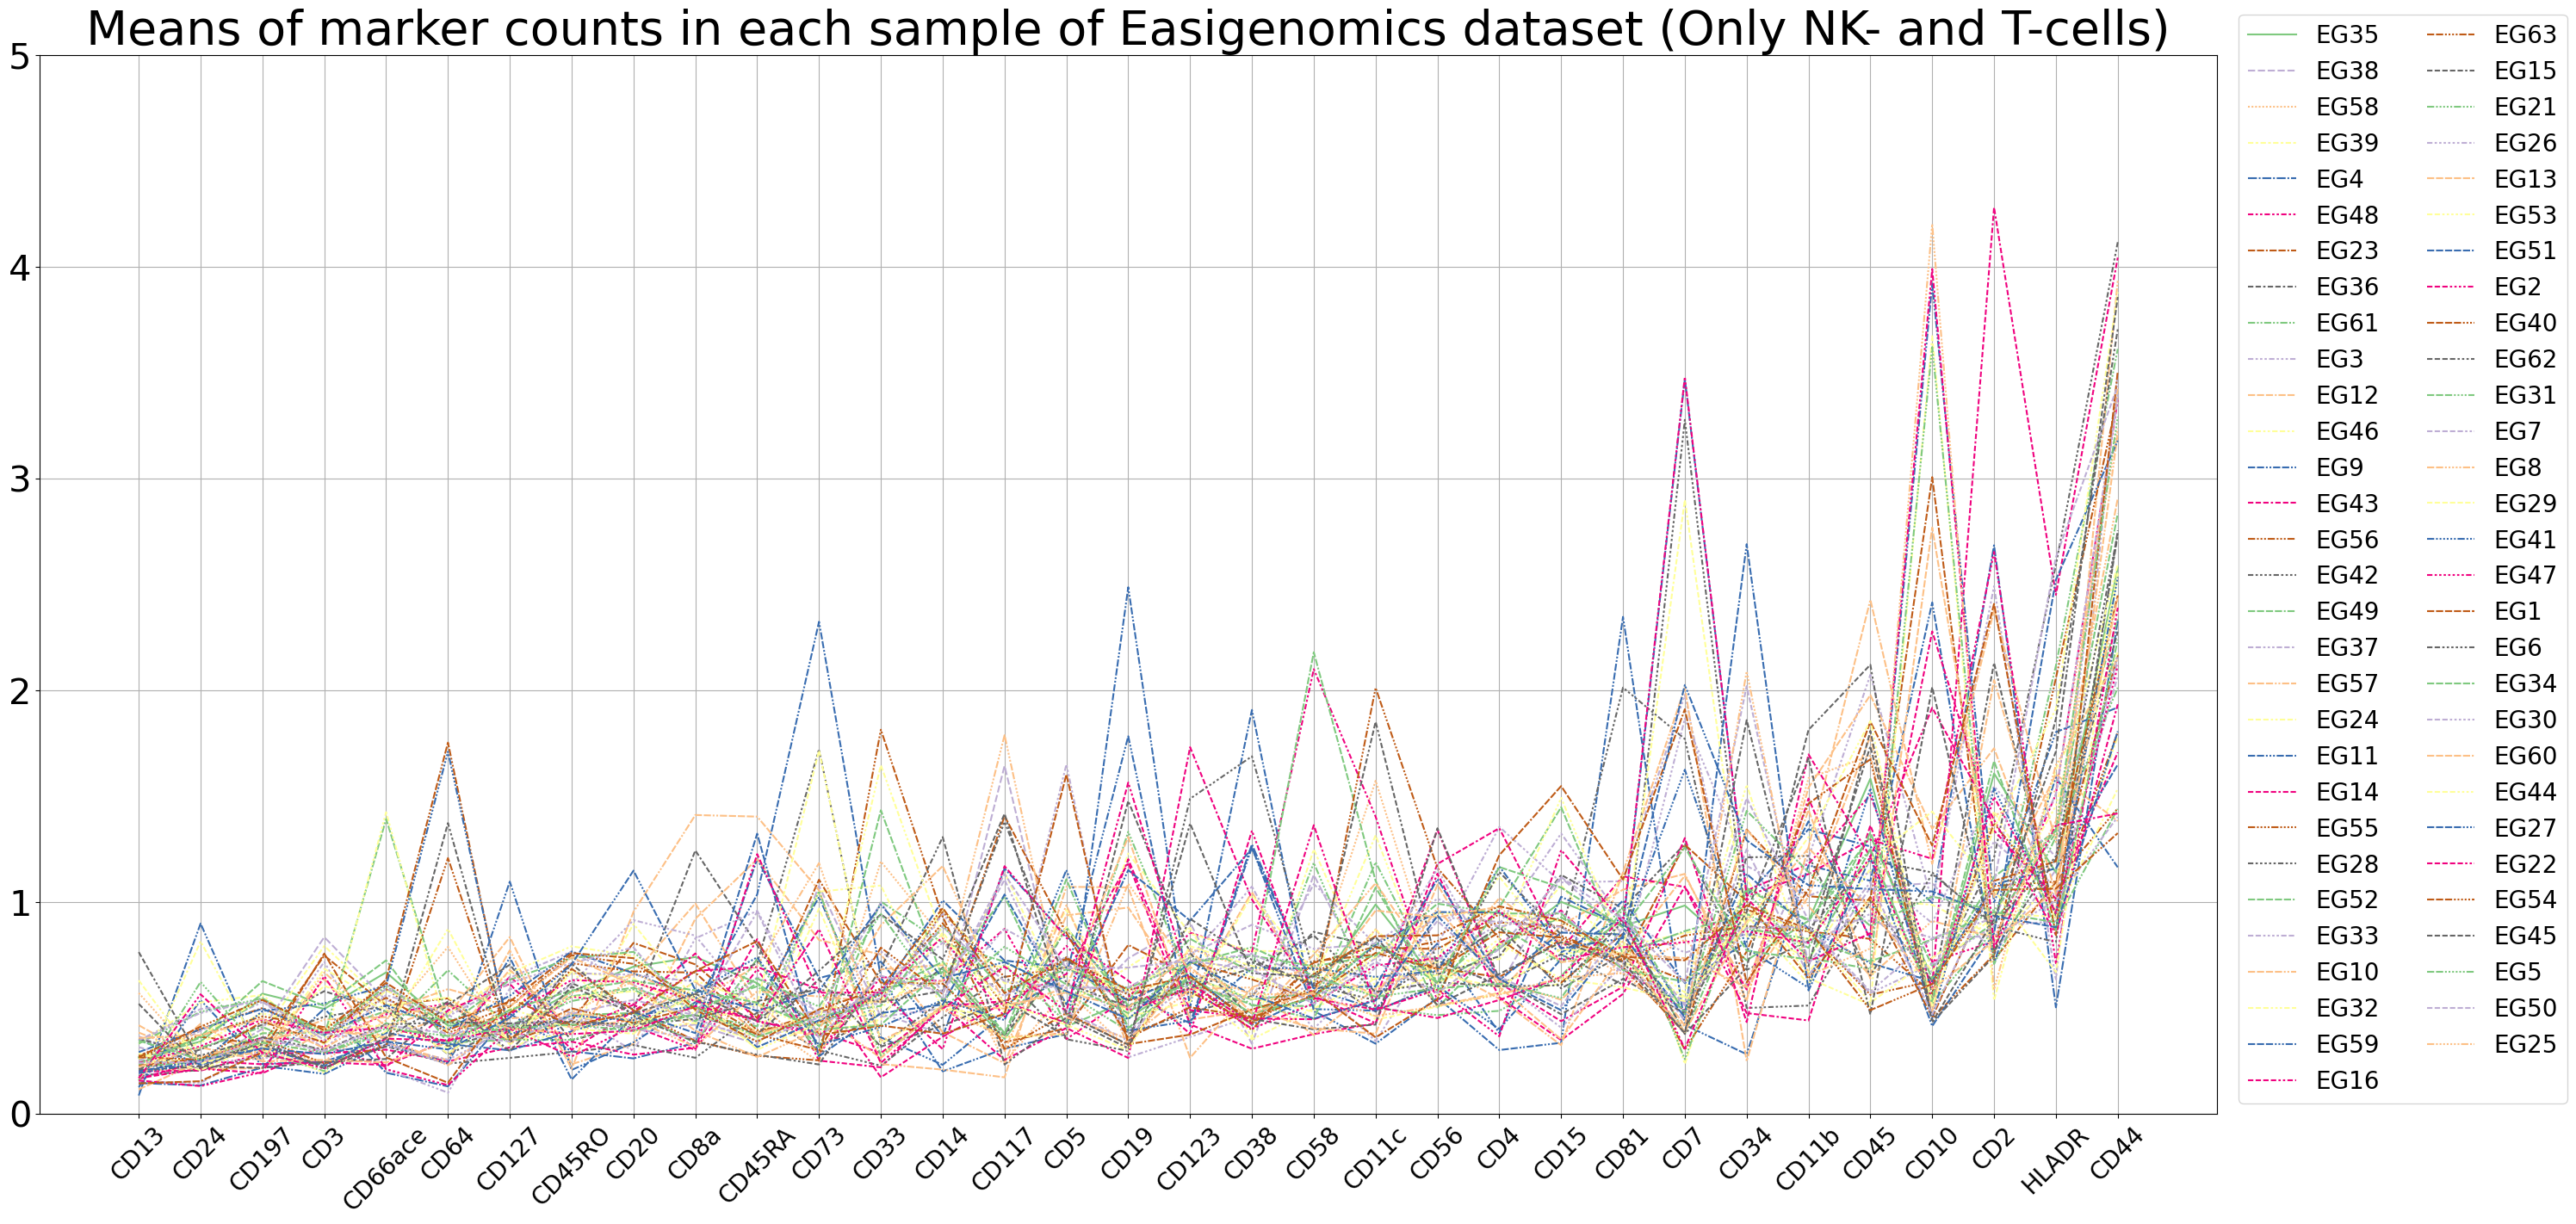

In [68]:
#only NK- and T-cells selected from each sample, CLR normalized

palette = sns.color_palette("Accent")

plt.figure(figsize=[30,15])
ax = sns.lineplot(data=df_sorted_e, palette=palette)
ax.legend(loc=(1.01, 0.01), ncol=2, fontsize = 20, facecolor='white')
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=30)
plt.grid()
plt.ylim(0, 5)
plt.title("Means of marker counts in each sample of Easigenomics dataset (Only NK- and T-cells)", fontsize=40) ;

plt.tight_layout()

### Seurat

In [69]:
samples_s=adata_seurat.obs['POOL'].unique().tolist()
samples_s

['Seurat']

In [70]:
#save means of protein counts/each protein/each sample into a list

list_samples_s= []

for sample in samples_s:
    eg=adata_seurat[adata_seurat.obs['new_cell_type'] == 'NK']
    eg=adata_seurat[adata_seurat.obs['POOL'] == sample]
    prot=eg.obsm['protein_expression_clr_seurat']
    prot_mean=prot.mean(axis=0).sort_values()
    list_samples_s.append(prot_mean)

list_samples_s

[CD86     0.000000
 CD71     0.000000
 CD22     0.000000
 CD45     0.000000
 CD18     0.000000
            ...   
 CD11c    0.891831
 CD14     0.892399
 CD3      0.923868
 CD4      0.988902
 CD8      1.004051
 Length: 141, dtype: float64]

In [71]:
#save column names
proteins=adata_seurat.obsm['protein_expression_clr_seurat'].columns



In [93]:
all_cells_seurat=[]
nk_cell_seurat=[]

for sample in samples_s:
    all_cells_seurat.append(len(adata_seurat[adata_seurat.obs['POOL'] == sample]))
    nk_cell_seurat.append(len(seurat_nk[seurat_nk.obs['POOL'] == sample]))

print(all_cells_seurat)
print(nk_cell_seurat)

[29556]
[1355]


In [72]:
#creating a dataframe from list of lists

df_s= pd.DataFrame(list_samples_s, columns = proteins)

df_s


CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  CD154  CD52  ...  \
0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   

   CD101  CD88  CD224     CD197      CD34  CD10  CD90  CD15  CD117  CD66ace  
0    0.0   0.0    0.0  0.700643  0.742467   0.0   0.0   0.0    0.0      0.0  

[1 rows x 141 columns]

In [73]:
df_s=df_s.T

df_s


0
CD86     0.0
CD274    0.0
CD270    0.0
CD155    0.0
CD112    0.0
...      ...
CD10     0.0
CD90     0.0
CD15     0.0
CD117    0.0
CD66ace  0.0

[141 rows x 1 columns]

In [74]:
#add column names

df_s.columns=samples_s

df_s


Seurat
CD86        0.0
CD274       0.0
CD270       0.0
CD155       0.0
CD112       0.0
...         ...
CD10        0.0
CD90        0.0
CD15        0.0
CD117       0.0
CD66ace     0.0

[141 rows x 1 columns]

In [75]:
df_s=df_s.T

In [76]:
#remove columns that contain only zeros

df_s = pd.DataFrame(df_s)
df_s != 0
(df_s != 0).any(axis=0)
df_s.loc[:, (df_s != 0).any(axis=0)]
df_s = df_s.loc[:, (df_s != 0).any(axis=0)]

df_s

CD3       CD8      CD56      CD19     CD11c    CD45RA     CD123  \
Seurat  0.923868  1.004051  0.685785  0.823472  0.891831  0.851121  0.796022   

             CD4      CD14      CD16  ...    HLA-DR      CD57     CD278  \
Seurat  0.988902  0.892399  0.776954  ...  0.823718  0.715582  0.762652   

           CD11a     CD79b      CD28      CD38     CD127     CD197      CD34  
Seurat  0.793614  0.705012  0.784389  0.857191  0.830743  0.700643  0.742467  

[1 rows x 25 columns]

In [77]:
#sorting by mean

index_sort = df_s.mean().sort_values().index
df_sorted_s = df_s[index_sort]

df_sorted_s

CD25      CD56     CD197     CD79b      CD57     CD161      CD34  \
Seurat  0.671071  0.685785  0.700643  0.705012  0.715582  0.739996  0.742467   

           CD278      CD16      CD69  ...    HLA-DR     CD127    CD45RA  \
Seurat  0.762652  0.776954  0.784284  ...  0.823718  0.830743  0.851121   

            CD27      CD38     CD11c      CD14       CD3       CD4       CD8  
Seurat  0.855648  0.857191  0.891831  0.892399  0.923868  0.988902  1.004051  

[1 rows x 25 columns]

In [78]:
df_sorted_s=df_sorted_s.T

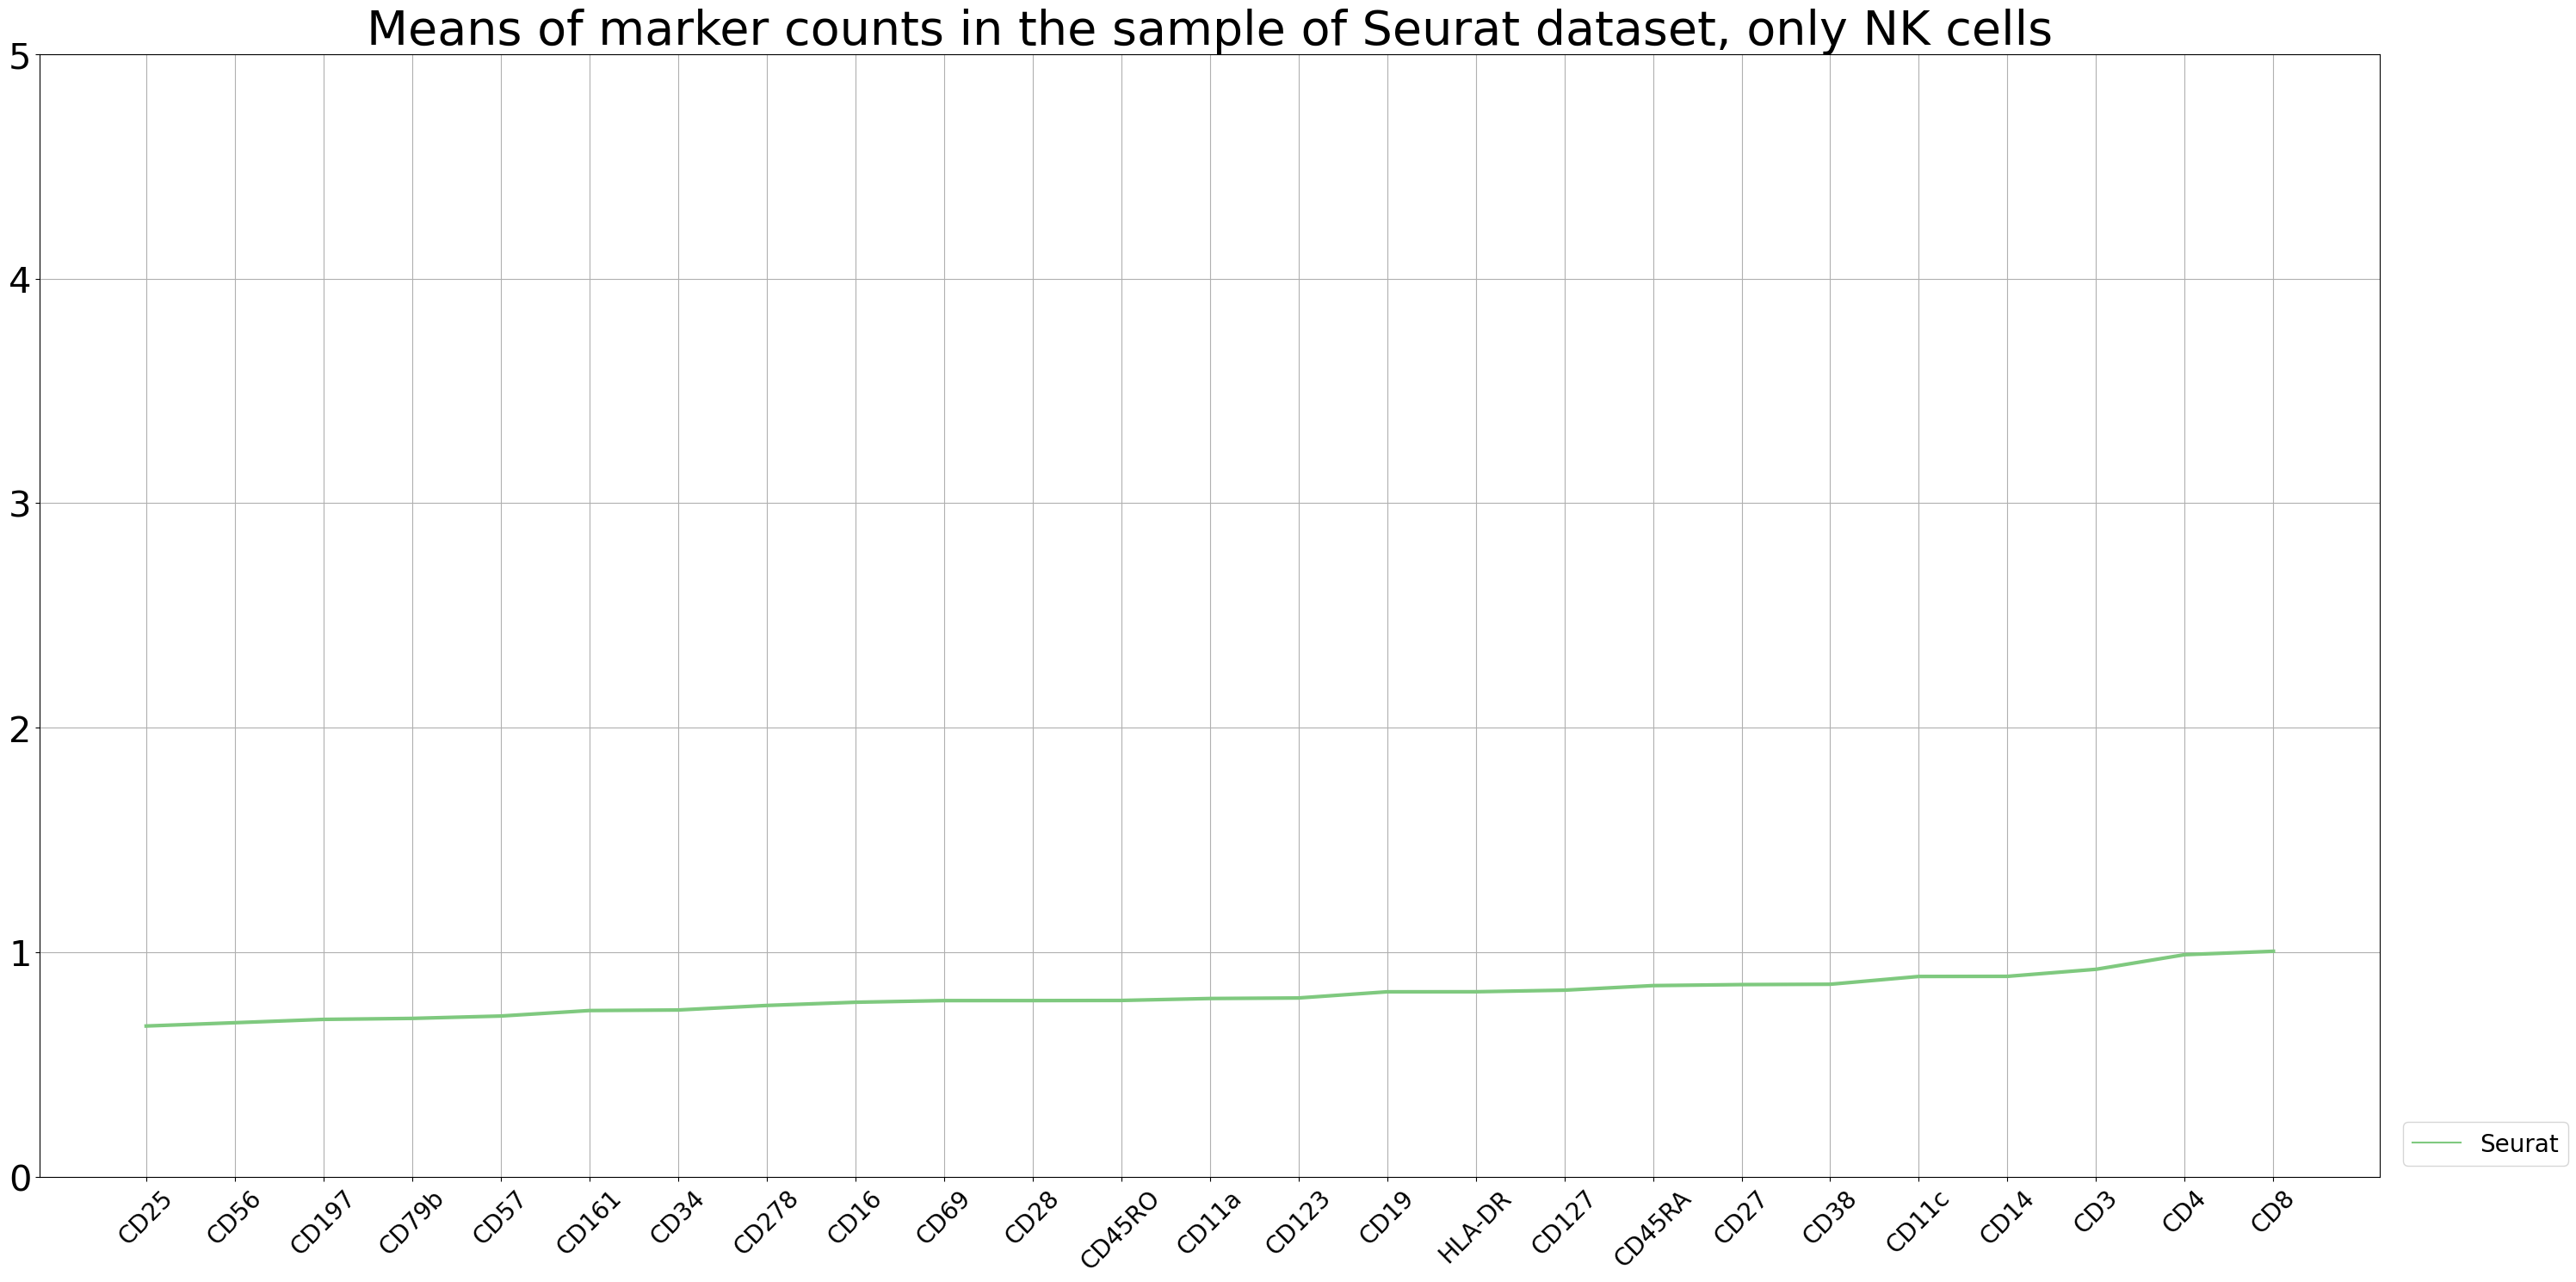

In [226]:
#only NK cells selected from each sample, CLR normalized

palette = sns.color_palette("Accent")

plt.figure(figsize=[30,15])
ax = sns.lineplot(data=df_sorted_s, palette=palette, linewidth = 3)
ax.legend(loc=(1.01, 0.01), ncol=2, fontsize = 20, facecolor='white')
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=30)
plt.grid()
plt.ylim(0, 5)
plt.title("Means of marker counts in the sample of Seurat dataset, only NK cells", fontsize=40) ;

plt.tight_layout()


## Number of cells per sample

In [123]:
df_easi_all= pd.DataFrame(all_cells_easi)
df_easi_all

0
0   2188
1    681
2   3980
3   5455
4   1587
5   1734
6     35
7   2169
8    444
9    131
10  4864
11  2064
12  1107
13  2435
14  3763
15  3123
16  2111
17   143
18  1611
19  1067
20   480
21  1756
22  3736
23  1304
24  1670
25  3199
26  6262
27   789
28  2016
29  2488
30  1753
31   584
32  2394
33  3125
34   845
35  2682
36  2856
37  1771
38  2973
39   572
40   373
41   709
42  3020
43  1323
44  1735
45  3523
46   116
47  2981
48  1112
49  2914
50  1497
51  2837
52   837
53  3663
54    94
55  3753
56  1417
57  2297
58  3192

In [128]:
df_easi_all=df_easi_all.T

In [129]:
df_easi_all.columns=samples_e

In [122]:
df_easi_all

EG35  EG38  EG58  EG39   EG4  EG48  EG23  EG36  EG61  EG3  ...  EG30  EG60  \
0  2188   681  3980  5455  1587  1734    35  2169   444  131  ...  2914  1497   

   EG44  EG27  EG22  EG54  EG45   EG5  EG50  EG25  
0  2837   837  3663    94  3753  1417  2297  3192  

[1 rows x 59 columns]

In [131]:
df_easi_nkt= pd.DataFrame(nkt_cell_easi)

In [132]:
df_easi_nkt=df_easi_nkt.T

In [133]:
df_easi_nkt.columns=samples_e

In [134]:
df_easi_nkt

EG35  EG38  EG58  EG39  EG4  EG48  EG23  EG36  EG61  EG3  ...  EG30  EG60  \
0  1226    34  1057   538    0    57     0  1585    23    0  ...     0     0   

   EG44  EG27  EG22  EG54  EG45  EG5  EG50  EG25  
0    72     0   176    49   103    0   362    96  

[1 rows x 59 columns]

In [160]:
df_easi=pd.concat([df_easi_all, df_easi_nkt])

In [161]:
df_easi.index = ['All cells', 'NK cells']

In [162]:
df_easi

EG35  EG38  EG58  EG39   EG4  EG48  EG23  EG36  EG61  EG3  ...  \
All cells  2188   681  3980  5455  1587  1734    35  2169   444  131  ...   
NK cells   1226    34  1057   538     0    57     0  1585    23    0  ...   

           EG30  EG60  EG44  EG27  EG22  EG54  EG45   EG5  EG50  EG25  
All cells  2914  1497  2837   837  3663    94  3753  1417  2297  3192  
NK cells      0     0    72     0   176    49   103     0   362    96  

[2 rows x 59 columns]

In [163]:
df_easi=df_easi.T

In [164]:
df_easi

All cells  NK cells
EG35       2188      1226
EG38        681        34
EG58       3980      1057
EG39       5455       538
EG4        1587         0
EG48       1734        57
EG23         35         0
EG36       2169      1585
EG61        444        23
EG3         131         0
EG12       4864      1670
EG46       2064      1913
EG9        1107        26
EG43       2435       187
EG56       3763       809
EG42       3123       508
EG49       2111       131
EG37        143        37
EG57       1611       887
EG24       1067        12
EG11        480        51
EG14       1756      1004
EG55       3736      2483
EG28       1304         0
EG52       1670       636
EG33       3199       282
EG10       6262      3688
EG32        789       142
EG59       2016       454
EG16       2488      1829
EG63       1753        40
EG15        584        70
EG21       2394        39
EG26       3125         0
EG13        845       263
EG53       2682       349
EG51       2856       150
EG2        1771         0
EG40       2973       602
EG62        572        38
EG31        373         0
EG7         709         0
EG8        3020         0
EG29       1323         0
EG41       1735       541
EG47       3523      2508
EG1         116         0
EG6        2981         0
EG34       1112      1011
EG30       2914         0
EG60       1497         0
EG44       2837        72
EG27        837         0
EG22       3663       176
EG54         94        49
EG45       3753       103
EG5        1417         0
EG50       2297       362
EG25       3192        96

In [165]:
df_easi["Sample"]=samples_e

In [166]:
df_easi

All cells  NK cells Sample
EG35       2188      1226   EG35
EG38        681        34   EG38
EG58       3980      1057   EG58
EG39       5455       538   EG39
EG4        1587         0    EG4
EG48       1734        57   EG48
EG23         35         0   EG23
EG36       2169      1585   EG36
EG61        444        23   EG61
EG3         131         0    EG3
EG12       4864      1670   EG12
EG46       2064      1913   EG46
EG9        1107        26    EG9
EG43       2435       187   EG43
EG56       3763       809   EG56
EG42       3123       508   EG42
EG49       2111       131   EG49
EG37        143        37   EG37
EG57       1611       887   EG57
EG24       1067        12   EG24
EG11        480        51   EG11
EG14       1756      1004   EG14
EG55       3736      2483   EG55
EG28       1304         0   EG28
EG52       1670       636   EG52
EG33       3199       282   EG33
EG10       6262      3688   EG10
EG32        789       142   EG32
EG59       2016       454   EG59
EG16       2488      1829   EG16
EG63       1753        40   EG63
EG15        584        70   EG15
EG21       2394        39   EG21
EG26       3125         0   EG26
EG13        845       263   EG13
EG53       2682       349   EG53
EG51       2856       150   EG51
EG2        1771         0    EG2
EG40       2973       602   EG40
EG62        572        38   EG62
EG31        373         0   EG31
EG7         709         0    EG7
EG8        3020         0    EG8
EG29       1323         0   EG29
EG41       1735       541   EG41
EG47       3523      2508   EG47
EG1         116         0    EG1
EG6        2981         0    EG6
EG34       1112      1011   EG34
EG30       2914         0   EG30
EG60       1497         0   EG60
EG44       2837        72   EG44
EG27        837         0   EG27
EG22       3663       176   EG22
EG54         94        49   EG54
EG45       3753       103   EG45
EG5        1417         0    EG5
EG50       2297       362   EG50
EG25       3192        96   EG25

[Text(0, 0, '2188'),
 Text(0, 0, '681'),
 Text(0, 0, '3980'),
 Text(0, 0, '5455'),
 Text(0, 0, '1587'),
 Text(0, 0, '1734'),
 Text(0, 0, '35'),
 Text(0, 0, '2169'),
 Text(0, 0, '444'),
 Text(0, 0, '131'),
 Text(0, 0, '4864'),
 Text(0, 0, '2064'),
 Text(0, 0, '1107'),
 Text(0, 0, '2435'),
 Text(0, 0, '3763'),
 Text(0, 0, '3123'),
 Text(0, 0, '2111'),
 Text(0, 0, '143'),
 Text(0, 0, '1611'),
 Text(0, 0, '1067'),
 Text(0, 0, '480'),
 Text(0, 0, '1756'),
 Text(0, 0, '3736'),
 Text(0, 0, '1304'),
 Text(0, 0, '1670'),
 Text(0, 0, '3199'),
 Text(0, 0, '6262'),
 Text(0, 0, '789'),
 Text(0, 0, '2016'),
 Text(0, 0, '2488'),
 Text(0, 0, '1753'),
 Text(0, 0, '584'),
 Text(0, 0, '2394'),
 Text(0, 0, '3125'),
 Text(0, 0, '845'),
 Text(0, 0, '2682'),
 Text(0, 0, '2856'),
 Text(0, 0, '1771'),
 Text(0, 0, '2973'),
 Text(0, 0, '572'),
 Text(0, 0, '373'),
 Text(0, 0, '709'),
 Text(0, 0, '3020'),
 Text(0, 0, '1323'),
 Text(0, 0, '1735'),
 Text(0, 0, '3523'),
 Text(0, 0, '116'),
 Text(0, 0, '2981'),
 Text(

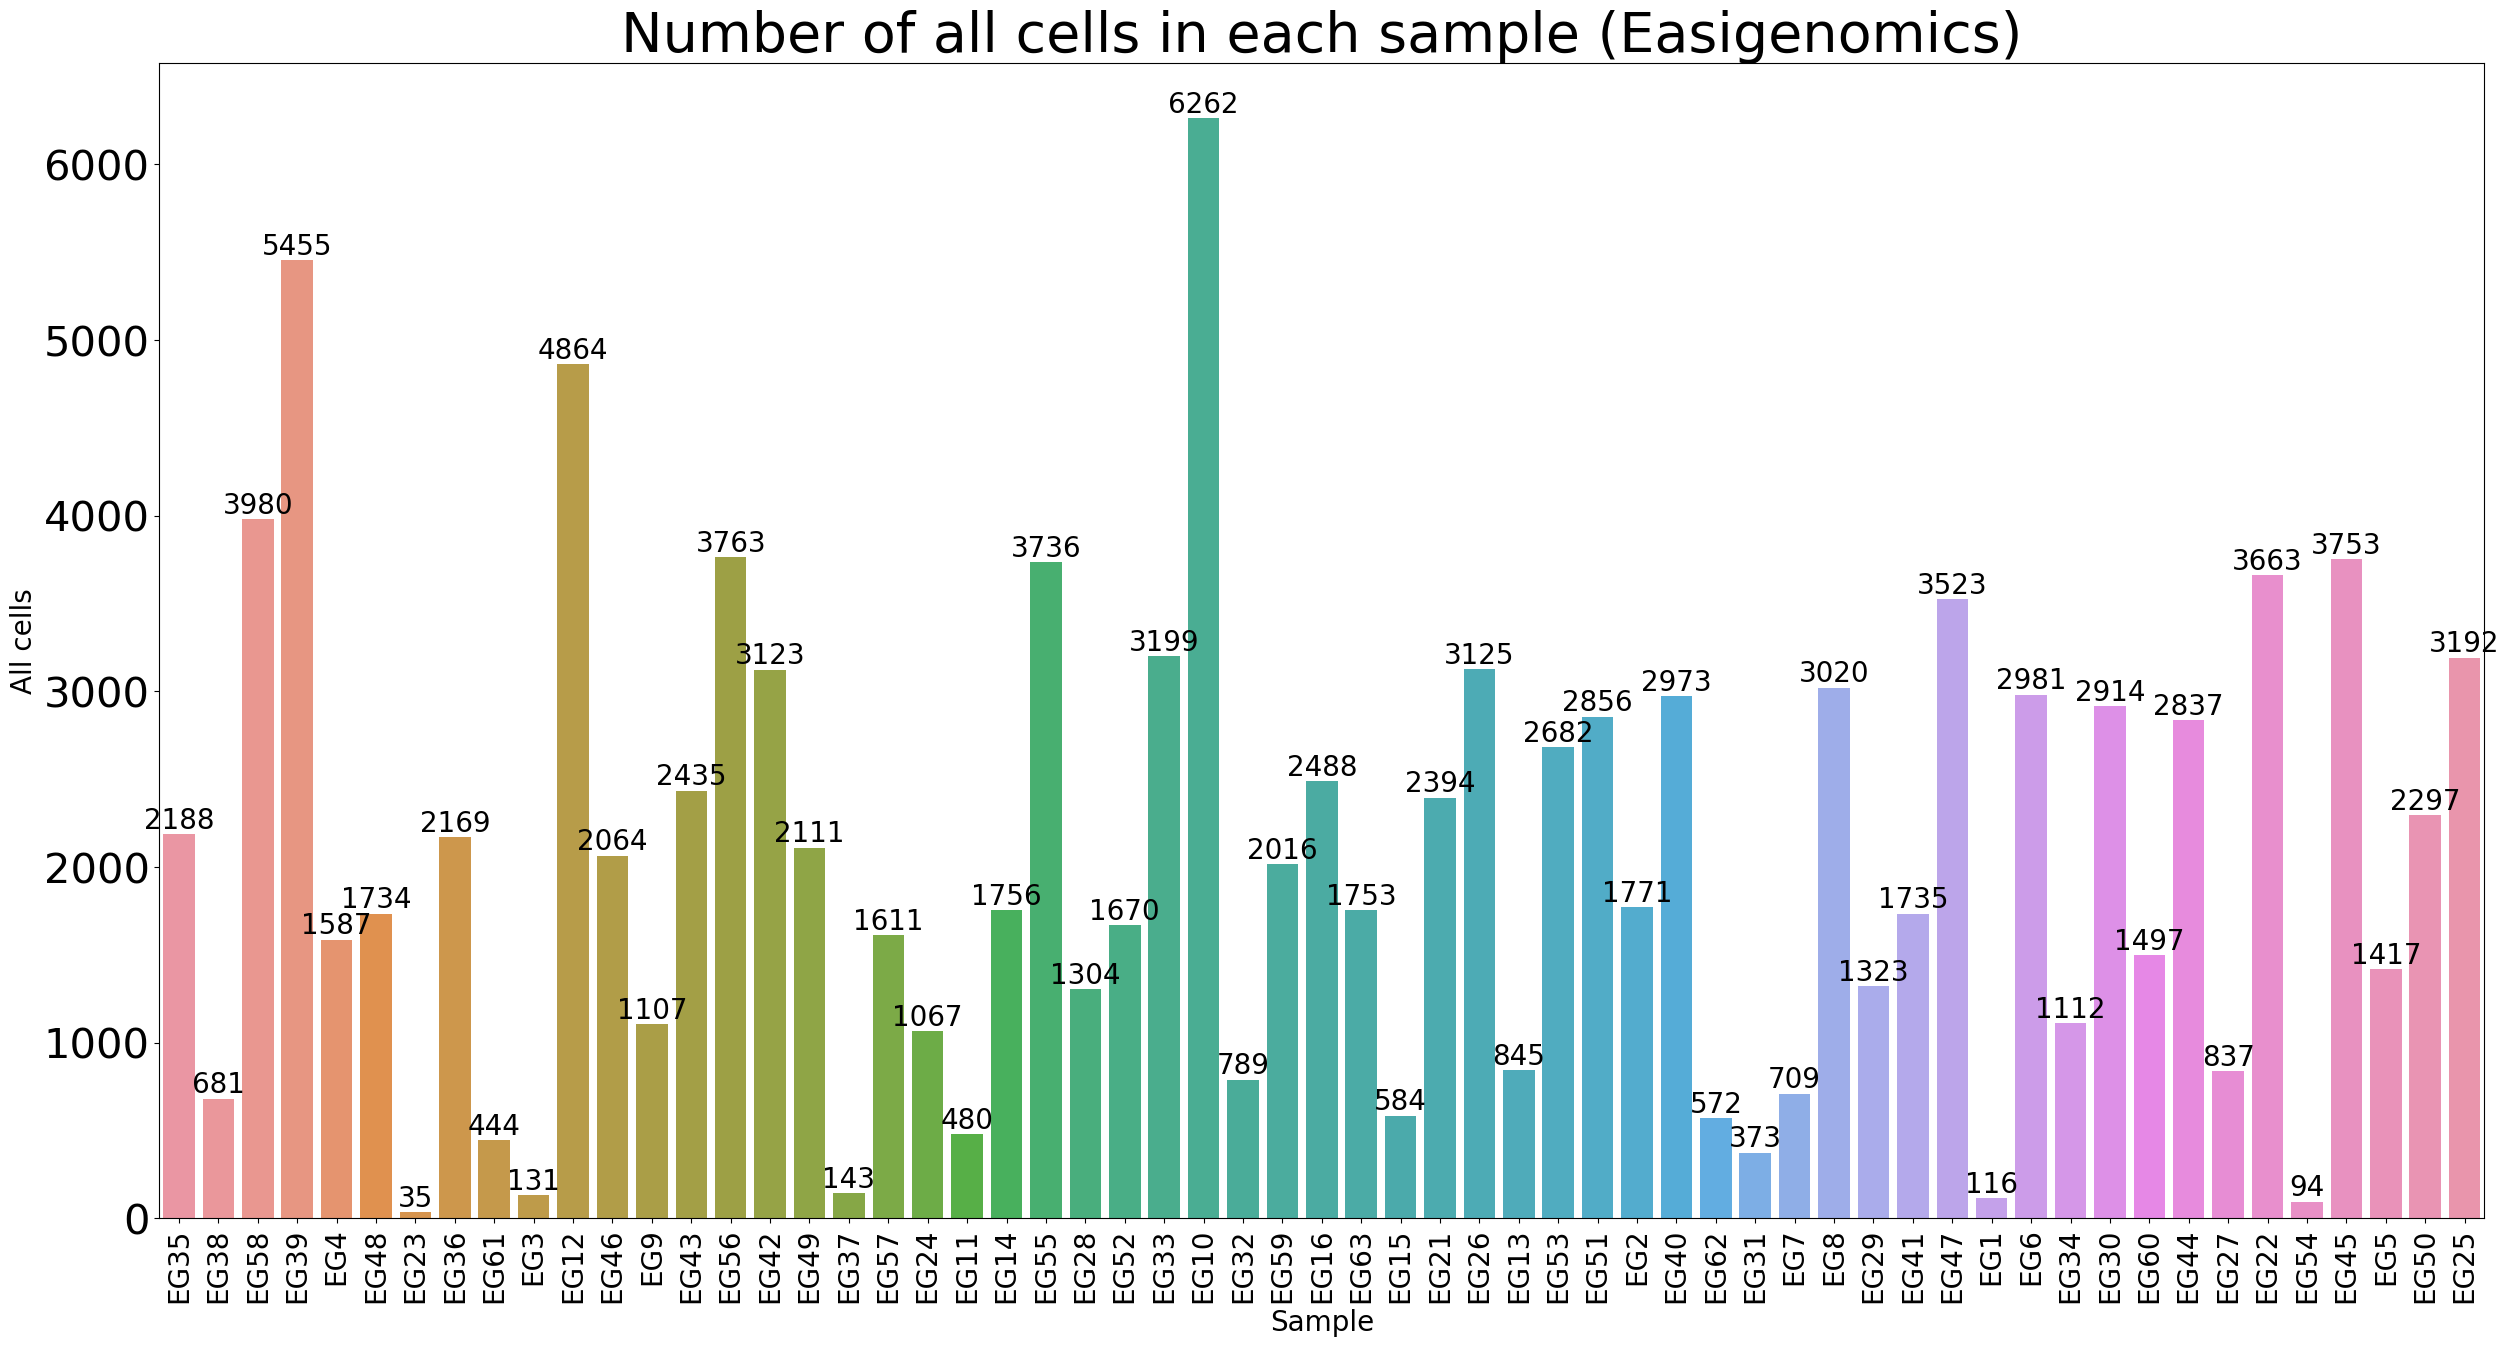

In [222]:
plt.figure(figsize=[30,15])

ax = sns.barplot(data=df_easi, x="Sample", y="All cells")
ax.tick_params(axis='x', labelsize=20, rotation=90)
plt.title("Number of all cells in each sample (Easigenomics)", fontsize=40) ;
ax.tick_params(axis='y', labelsize=30)
ax.bar_label(ax.containers[0],fontsize=20)



[Text(0, 0, '1226'),
 Text(0, 0, '34'),
 Text(0, 0, '1057'),
 Text(0, 0, '538'),
 Text(0, 0, '0'),
 Text(0, 0, '57'),
 Text(0, 0, '0'),
 Text(0, 0, '1585'),
 Text(0, 0, '23'),
 Text(0, 0, '0'),
 Text(0, 0, '1670'),
 Text(0, 0, '1913'),
 Text(0, 0, '26'),
 Text(0, 0, '187'),
 Text(0, 0, '809'),
 Text(0, 0, '508'),
 Text(0, 0, '131'),
 Text(0, 0, '37'),
 Text(0, 0, '887'),
 Text(0, 0, '12'),
 Text(0, 0, '51'),
 Text(0, 0, '1004'),
 Text(0, 0, '2483'),
 Text(0, 0, '0'),
 Text(0, 0, '636'),
 Text(0, 0, '282'),
 Text(0, 0, '3688'),
 Text(0, 0, '142'),
 Text(0, 0, '454'),
 Text(0, 0, '1829'),
 Text(0, 0, '40'),
 Text(0, 0, '70'),
 Text(0, 0, '39'),
 Text(0, 0, '0'),
 Text(0, 0, '263'),
 Text(0, 0, '349'),
 Text(0, 0, '150'),
 Text(0, 0, '0'),
 Text(0, 0, '602'),
 Text(0, 0, '38'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '541'),
 Text(0, 0, '2508'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1011'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0,

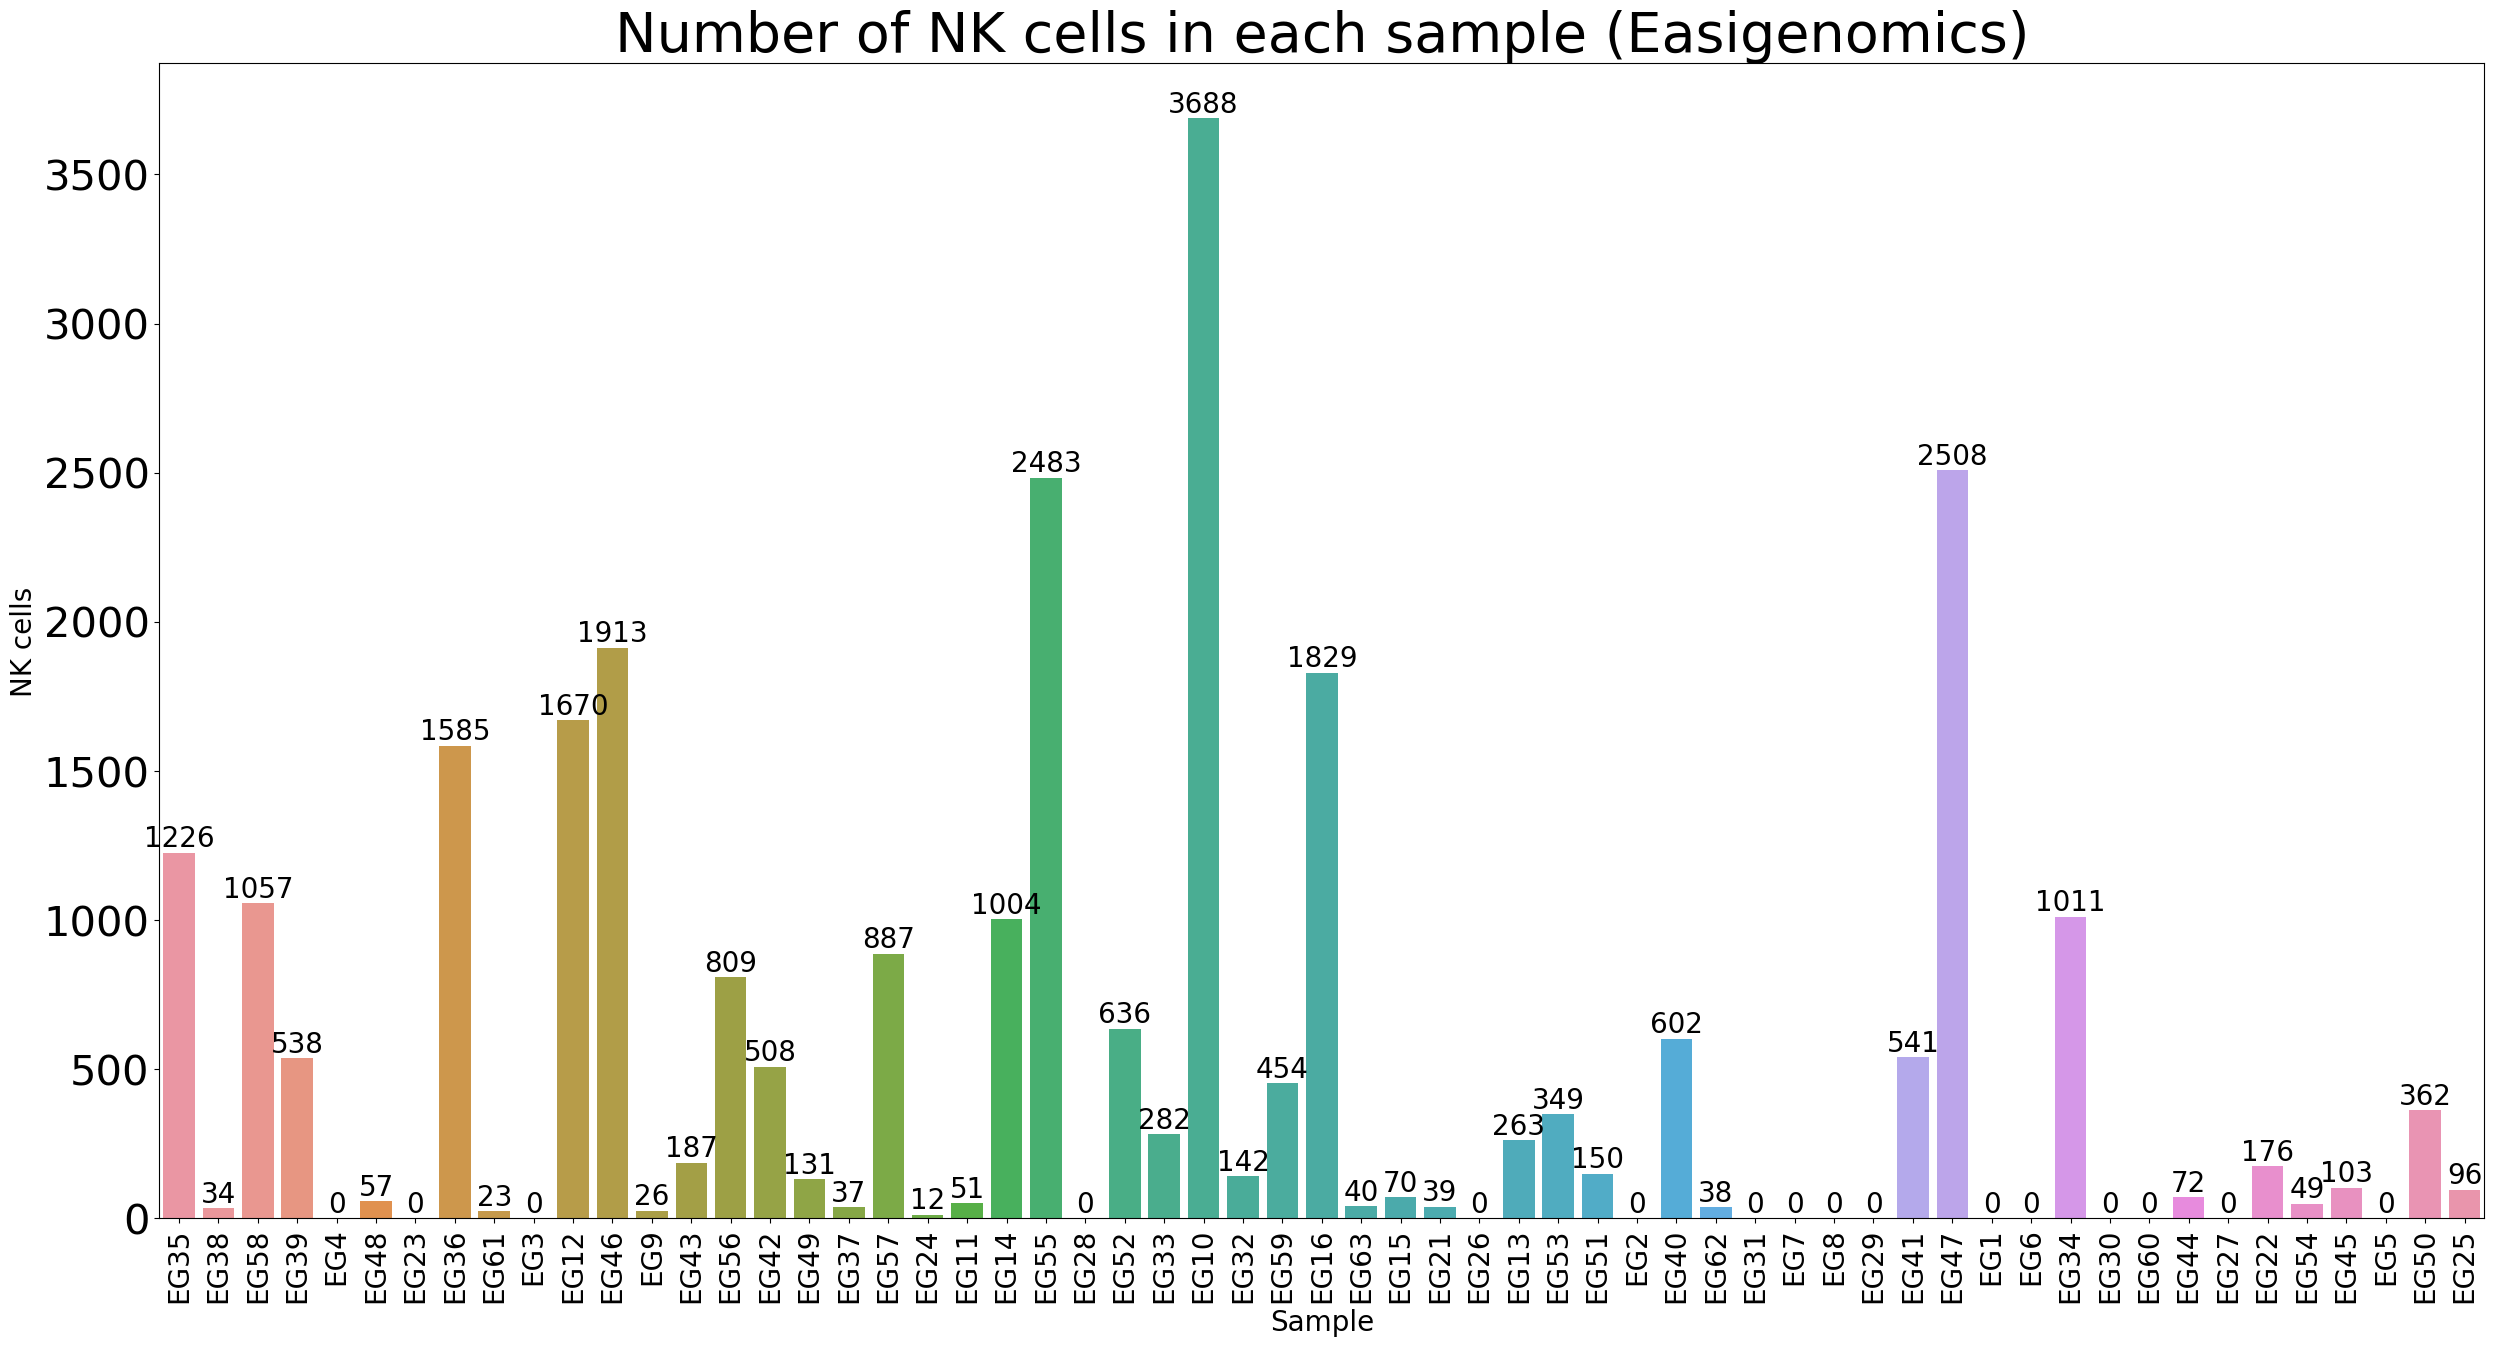

In [221]:
plt.figure(figsize=[30,15])

ax = sns.barplot(data=df_easi, x="Sample", y="NK cells")
ax.tick_params(axis='x', labelsize=20, rotation=90)
plt.title("Number of NK cells in each sample (Easigenomics)", fontsize=40) ;
ax.tick_params(axis='y', labelsize=30)
ax.bar_label(ax.containers[0],fontsize=20)


In [179]:
df_neurips_all= pd.DataFrame(all_cells_neurips)

df_neurips_all=df_neurips_all.T

df_neurips_all.columns=samples

df_neurips_nk= pd.DataFrame(nk_cell_neurips)

df_neurips_nk=df_neurips_nk.T

df_neurips_nk.columns=samples

df_neurips_nk

df_neurips=pd.concat([df_neurips_all, df_neurips_nk])

In [180]:
df_neurips.index = ['All cells', 'NK cells']

df_neurips=df_neurips.T

df_neurips["Sample"]=samples

df_neurips

All cells  NK cells Sample
s4d1       4885       665   s4d1
s3d6      10316       846   s3d6
s1d2       4450       518   s1d2
s2d1       9684       529   s2d1
s3d7      10802      1198   s3d7
s2d4       4575       151   s2d4
s1d1       4123       202   s1d1
s4d9       6565       730   s4d9
s4d8       3535       262   s4d8
s2d5       8725      1814   s2d5
s3d1       8478       210   s3d1
s1d3       4860       263   s1d3

[Text(0, 0, '4885'),
 Text(0, 0, '10316'),
 Text(0, 0, '4450'),
 Text(0, 0, '9684'),
 Text(0, 0, '10802'),
 Text(0, 0, '4575'),
 Text(0, 0, '4123'),
 Text(0, 0, '6565'),
 Text(0, 0, '3535'),
 Text(0, 0, '8725'),
 Text(0, 0, '8478'),
 Text(0, 0, '4860')]

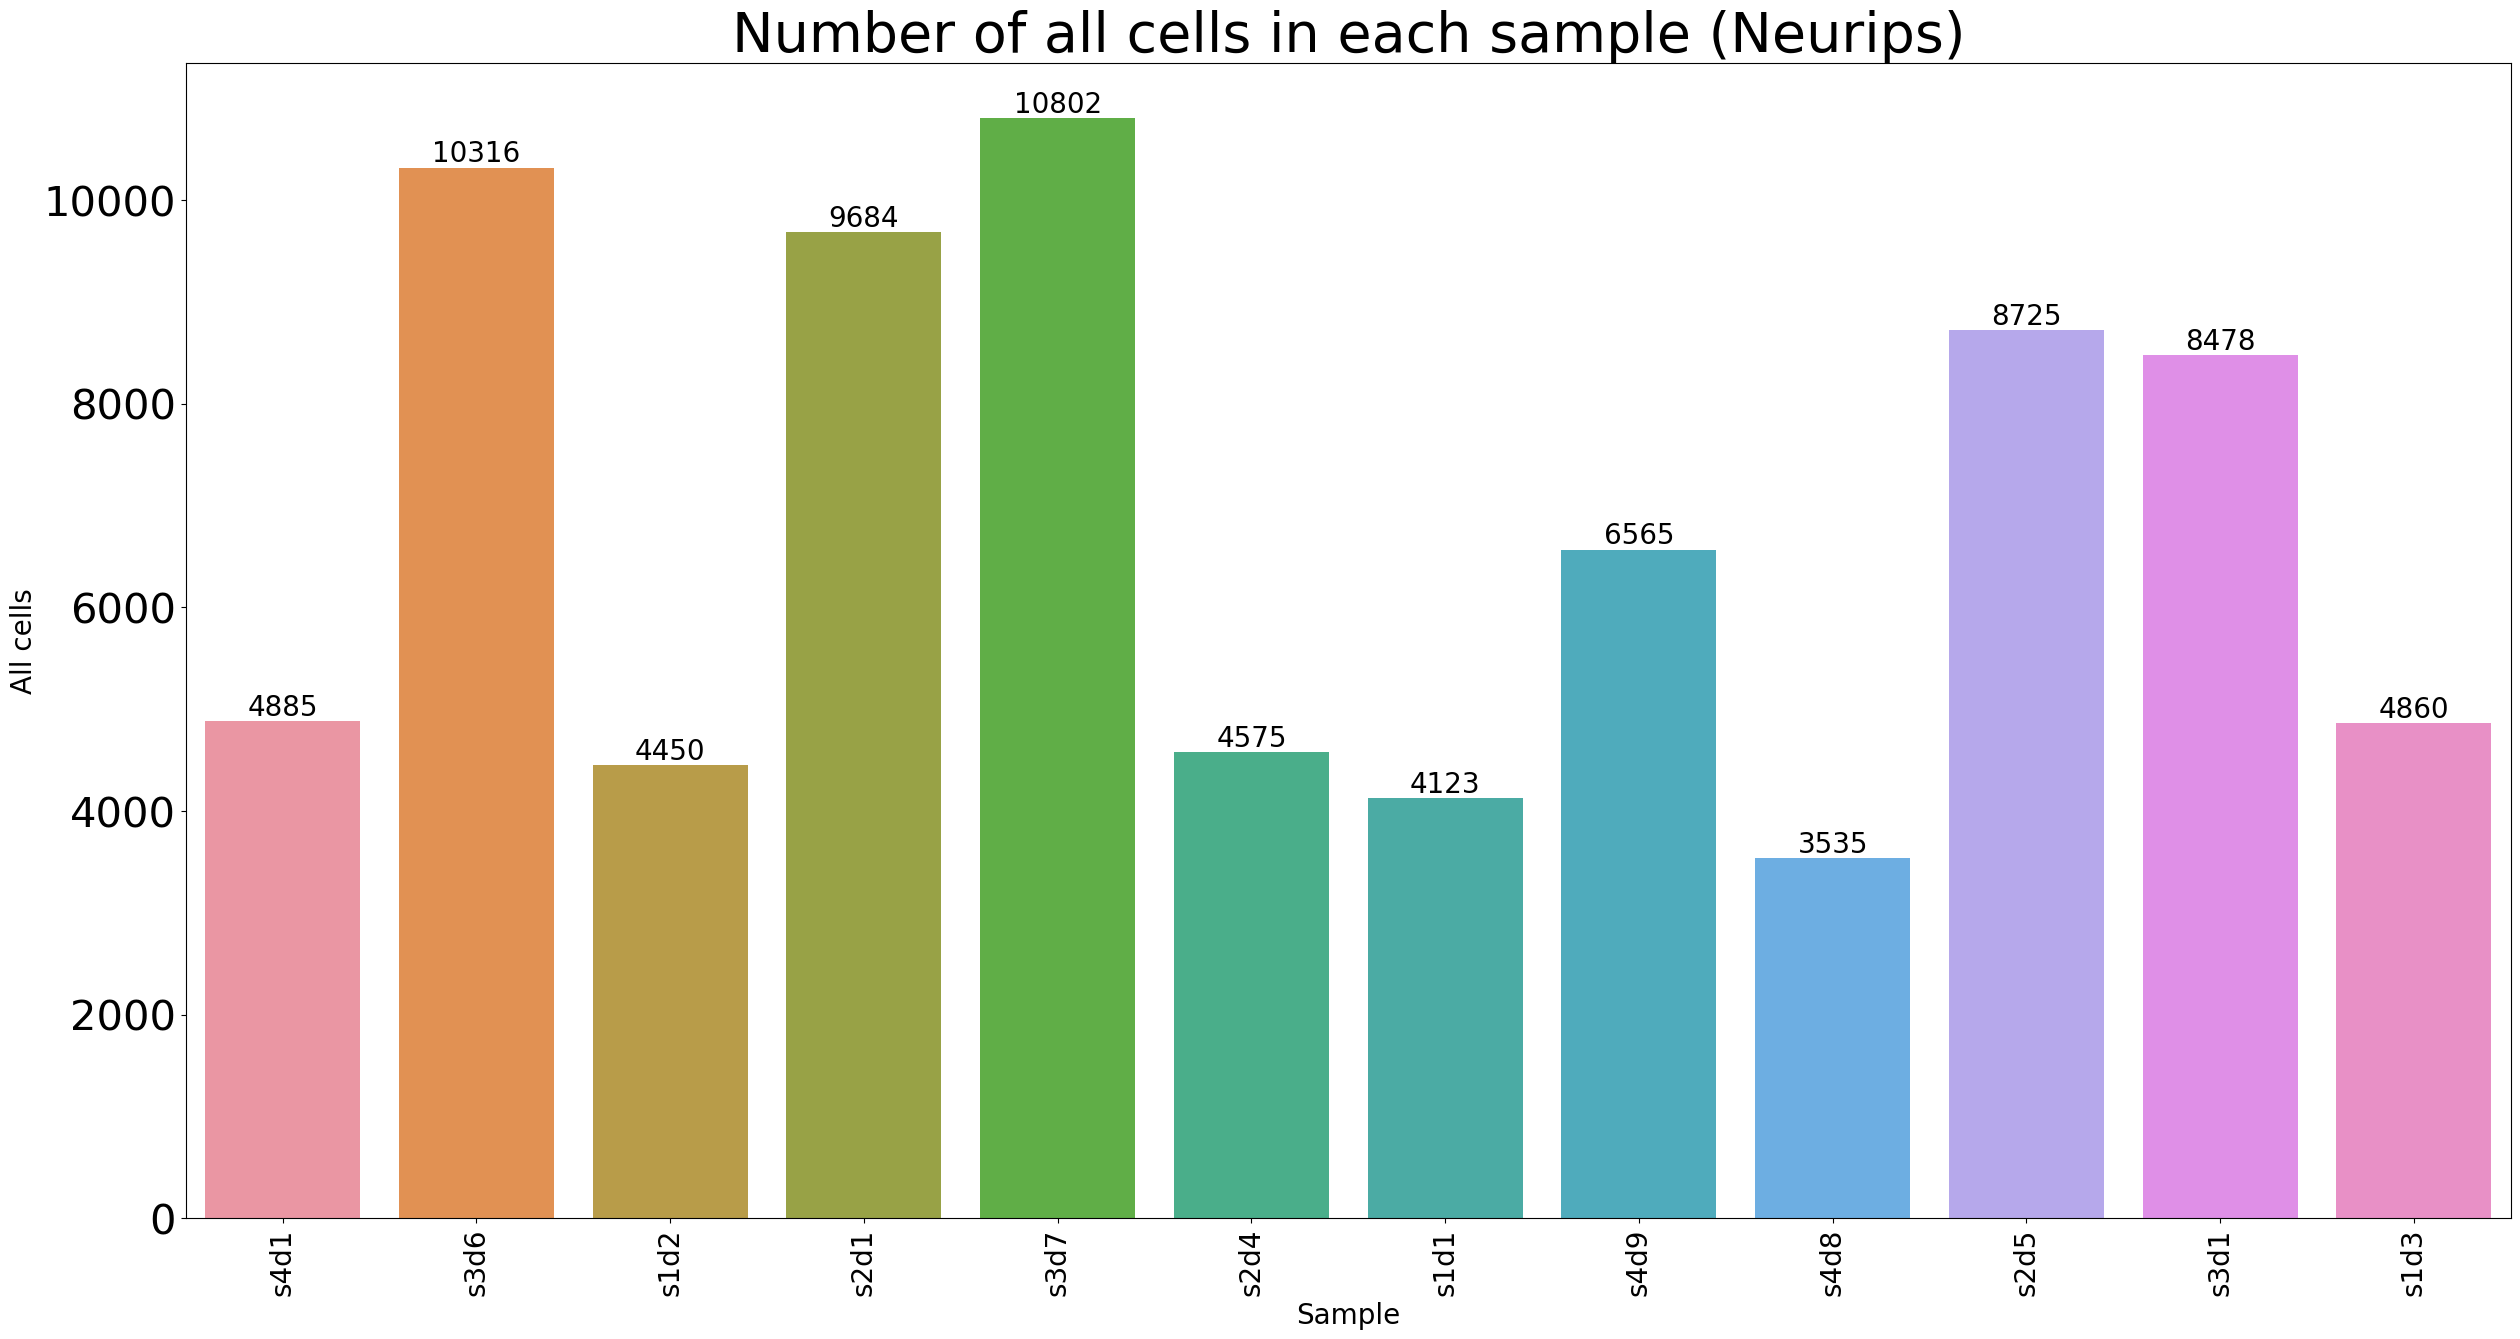

In [213]:
plt.figure(figsize=[30,15])

ax = sns.barplot(data=df_neurips, x="Sample", y="All cells")
ax.tick_params(axis='x', labelsize=20, rotation=90)
plt.title("Number of all cells in each sample (Neurips)", fontsize=40) ;
ax.tick_params(axis='y', labelsize=30)
ax.bar_label(ax.containers[0],fontsize=20)



[Text(0, 0, '665'),
 Text(0, 0, '846'),
 Text(0, 0, '518'),
 Text(0, 0, '529'),
 Text(0, 0, '1198'),
 Text(0, 0, '151'),
 Text(0, 0, '202'),
 Text(0, 0, '730'),
 Text(0, 0, '262'),
 Text(0, 0, '1814'),
 Text(0, 0, '210'),
 Text(0, 0, '263')]

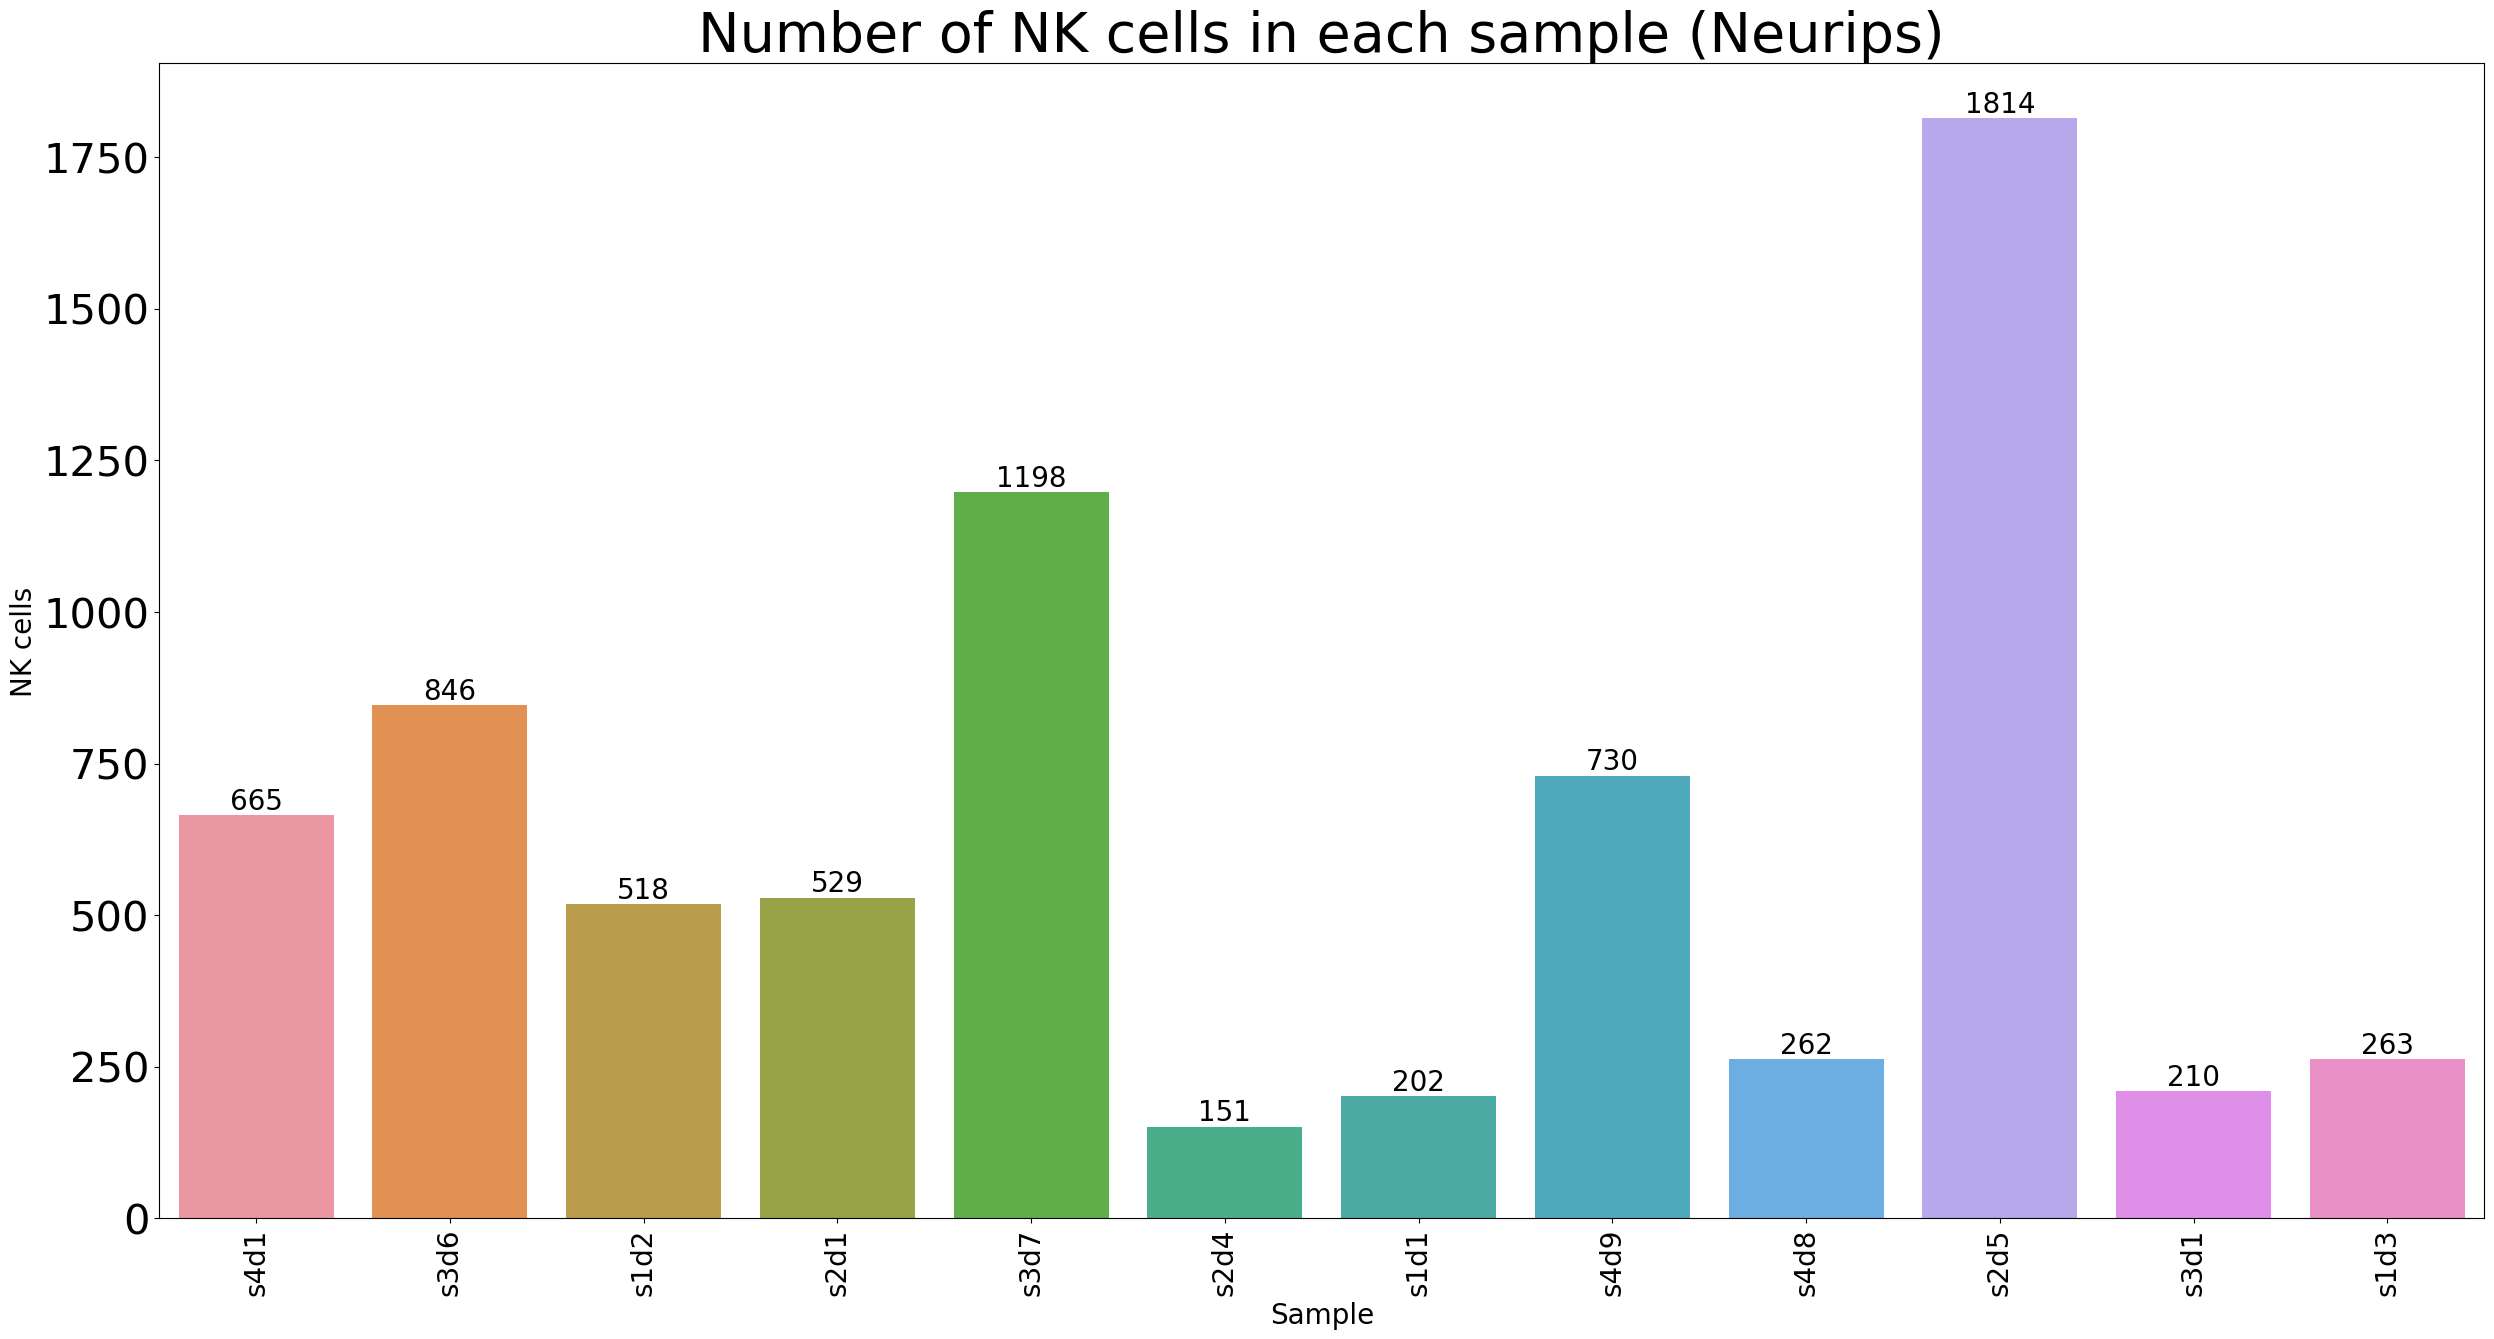

In [220]:
plt.figure(figsize=[30,15])

ax = sns.barplot(data=df_neurips, x="Sample", y="NK cells")
ax.tick_params(axis='x', labelsize=20, rotation=90)
plt.title("Number of NK cells in each sample (Neurips)", fontsize=40) ;
ax.tick_params(axis='y', labelsize=30)
ax.bar_label(ax.containers[0],fontsize=20)

In [183]:
df_granja_all= pd.DataFrame(all_cells_granja)

df_granja_all=df_granja_all.T

df_granja_all.columns=samples_g

df_granja_nk= pd.DataFrame(nk_cell_granja)

df_granja_nk=df_granja_nk.T

df_granja_nk.columns=samples_g

df_granja_nk

df_granja=pd.concat([df_granja_all, df_granja_nk])

In [184]:
df_granja.index = ['All cells', 'NK cells']

df_granja=df_granja.T

df_granja["Sample"]=samples_g

df_granja

All cells  NK cells      Sample
GSM4138872       6194       517  GSM4138872
GSM4138873       6247       516  GSM4138873
GSM4138874       1856         0  GSM4138874
GSM4138880       5812         0  GSM4138880
GSM4138885       4095         0  GSM4138885

[Text(0, 0, '6194'),
 Text(0, 0, '6247'),
 Text(0, 0, '1856'),
 Text(0, 0, '5812'),
 Text(0, 0, '4095')]

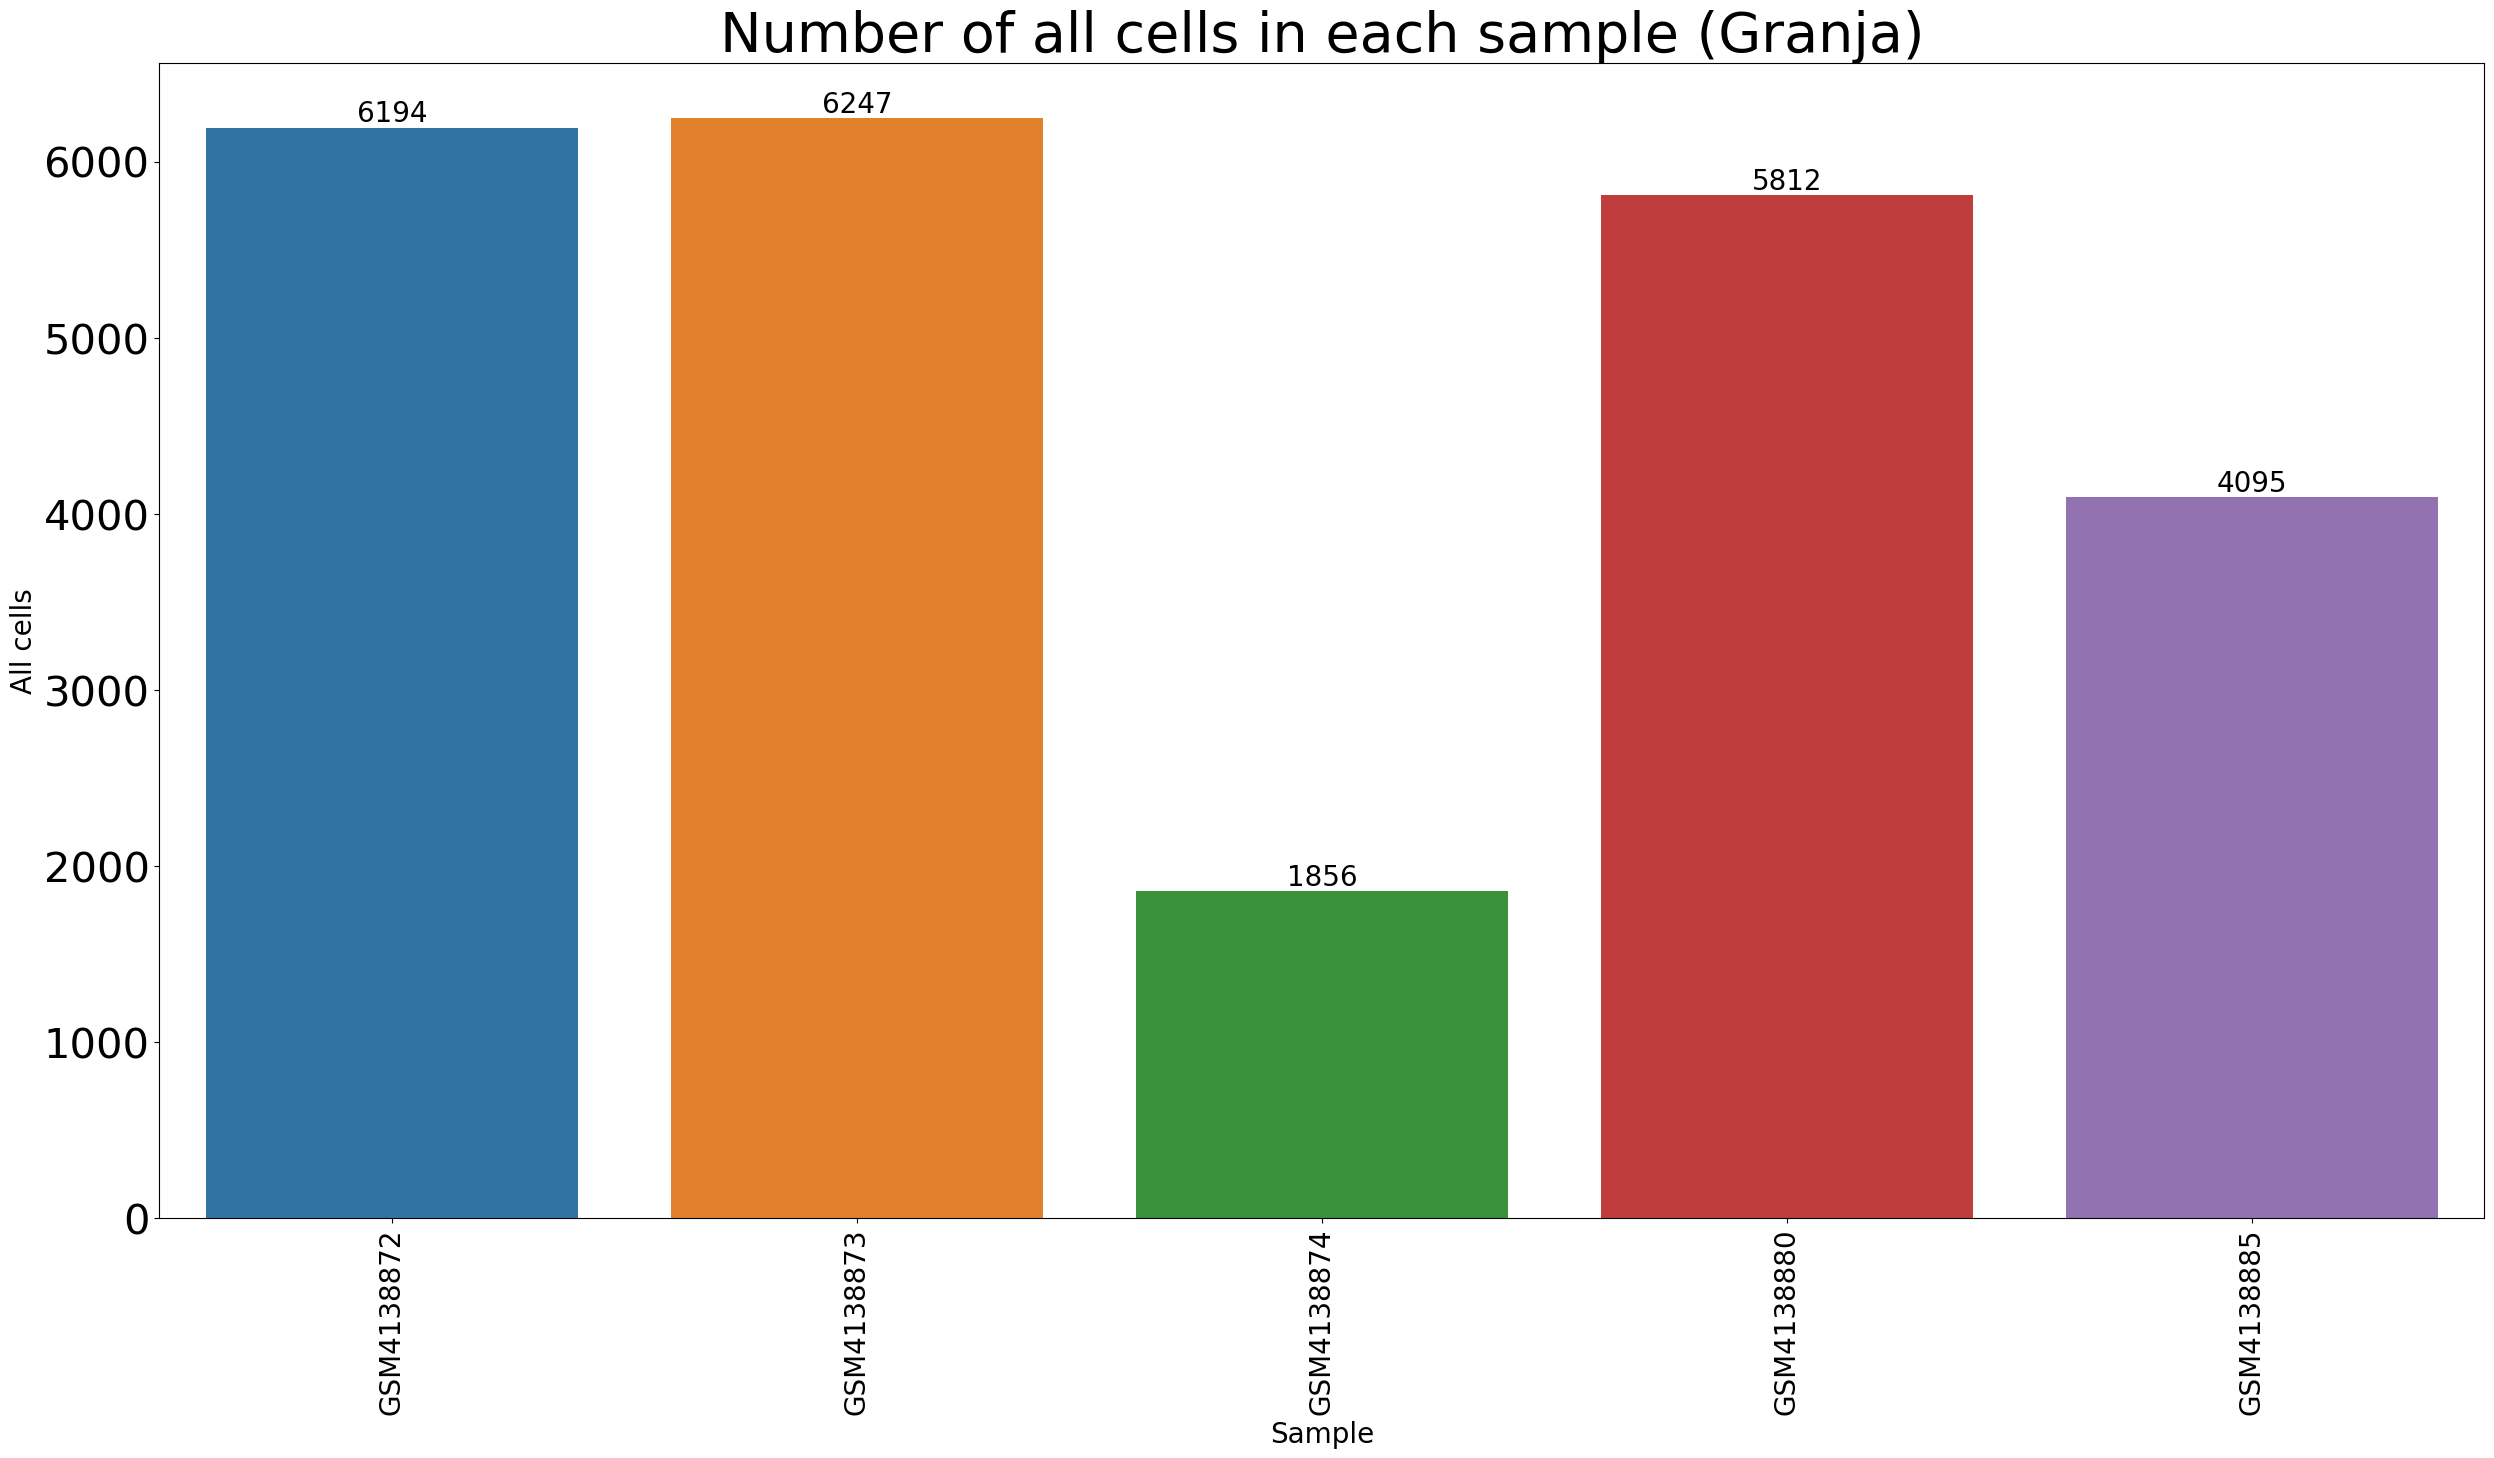

In [223]:
plt.figure(figsize=[30,15])

ax = sns.barplot(data=df_granja, x="Sample", y="All cells")
ax.tick_params(axis='x', labelsize=20, rotation=90)
plt.title("Number of all cells in each sample (Granja)", fontsize=40) ;
ax.tick_params(axis='y', labelsize=30)
ax.bar_label(ax.containers[0],fontsize=20)



[Text(0, 0, '517'),
 Text(0, 0, '516'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

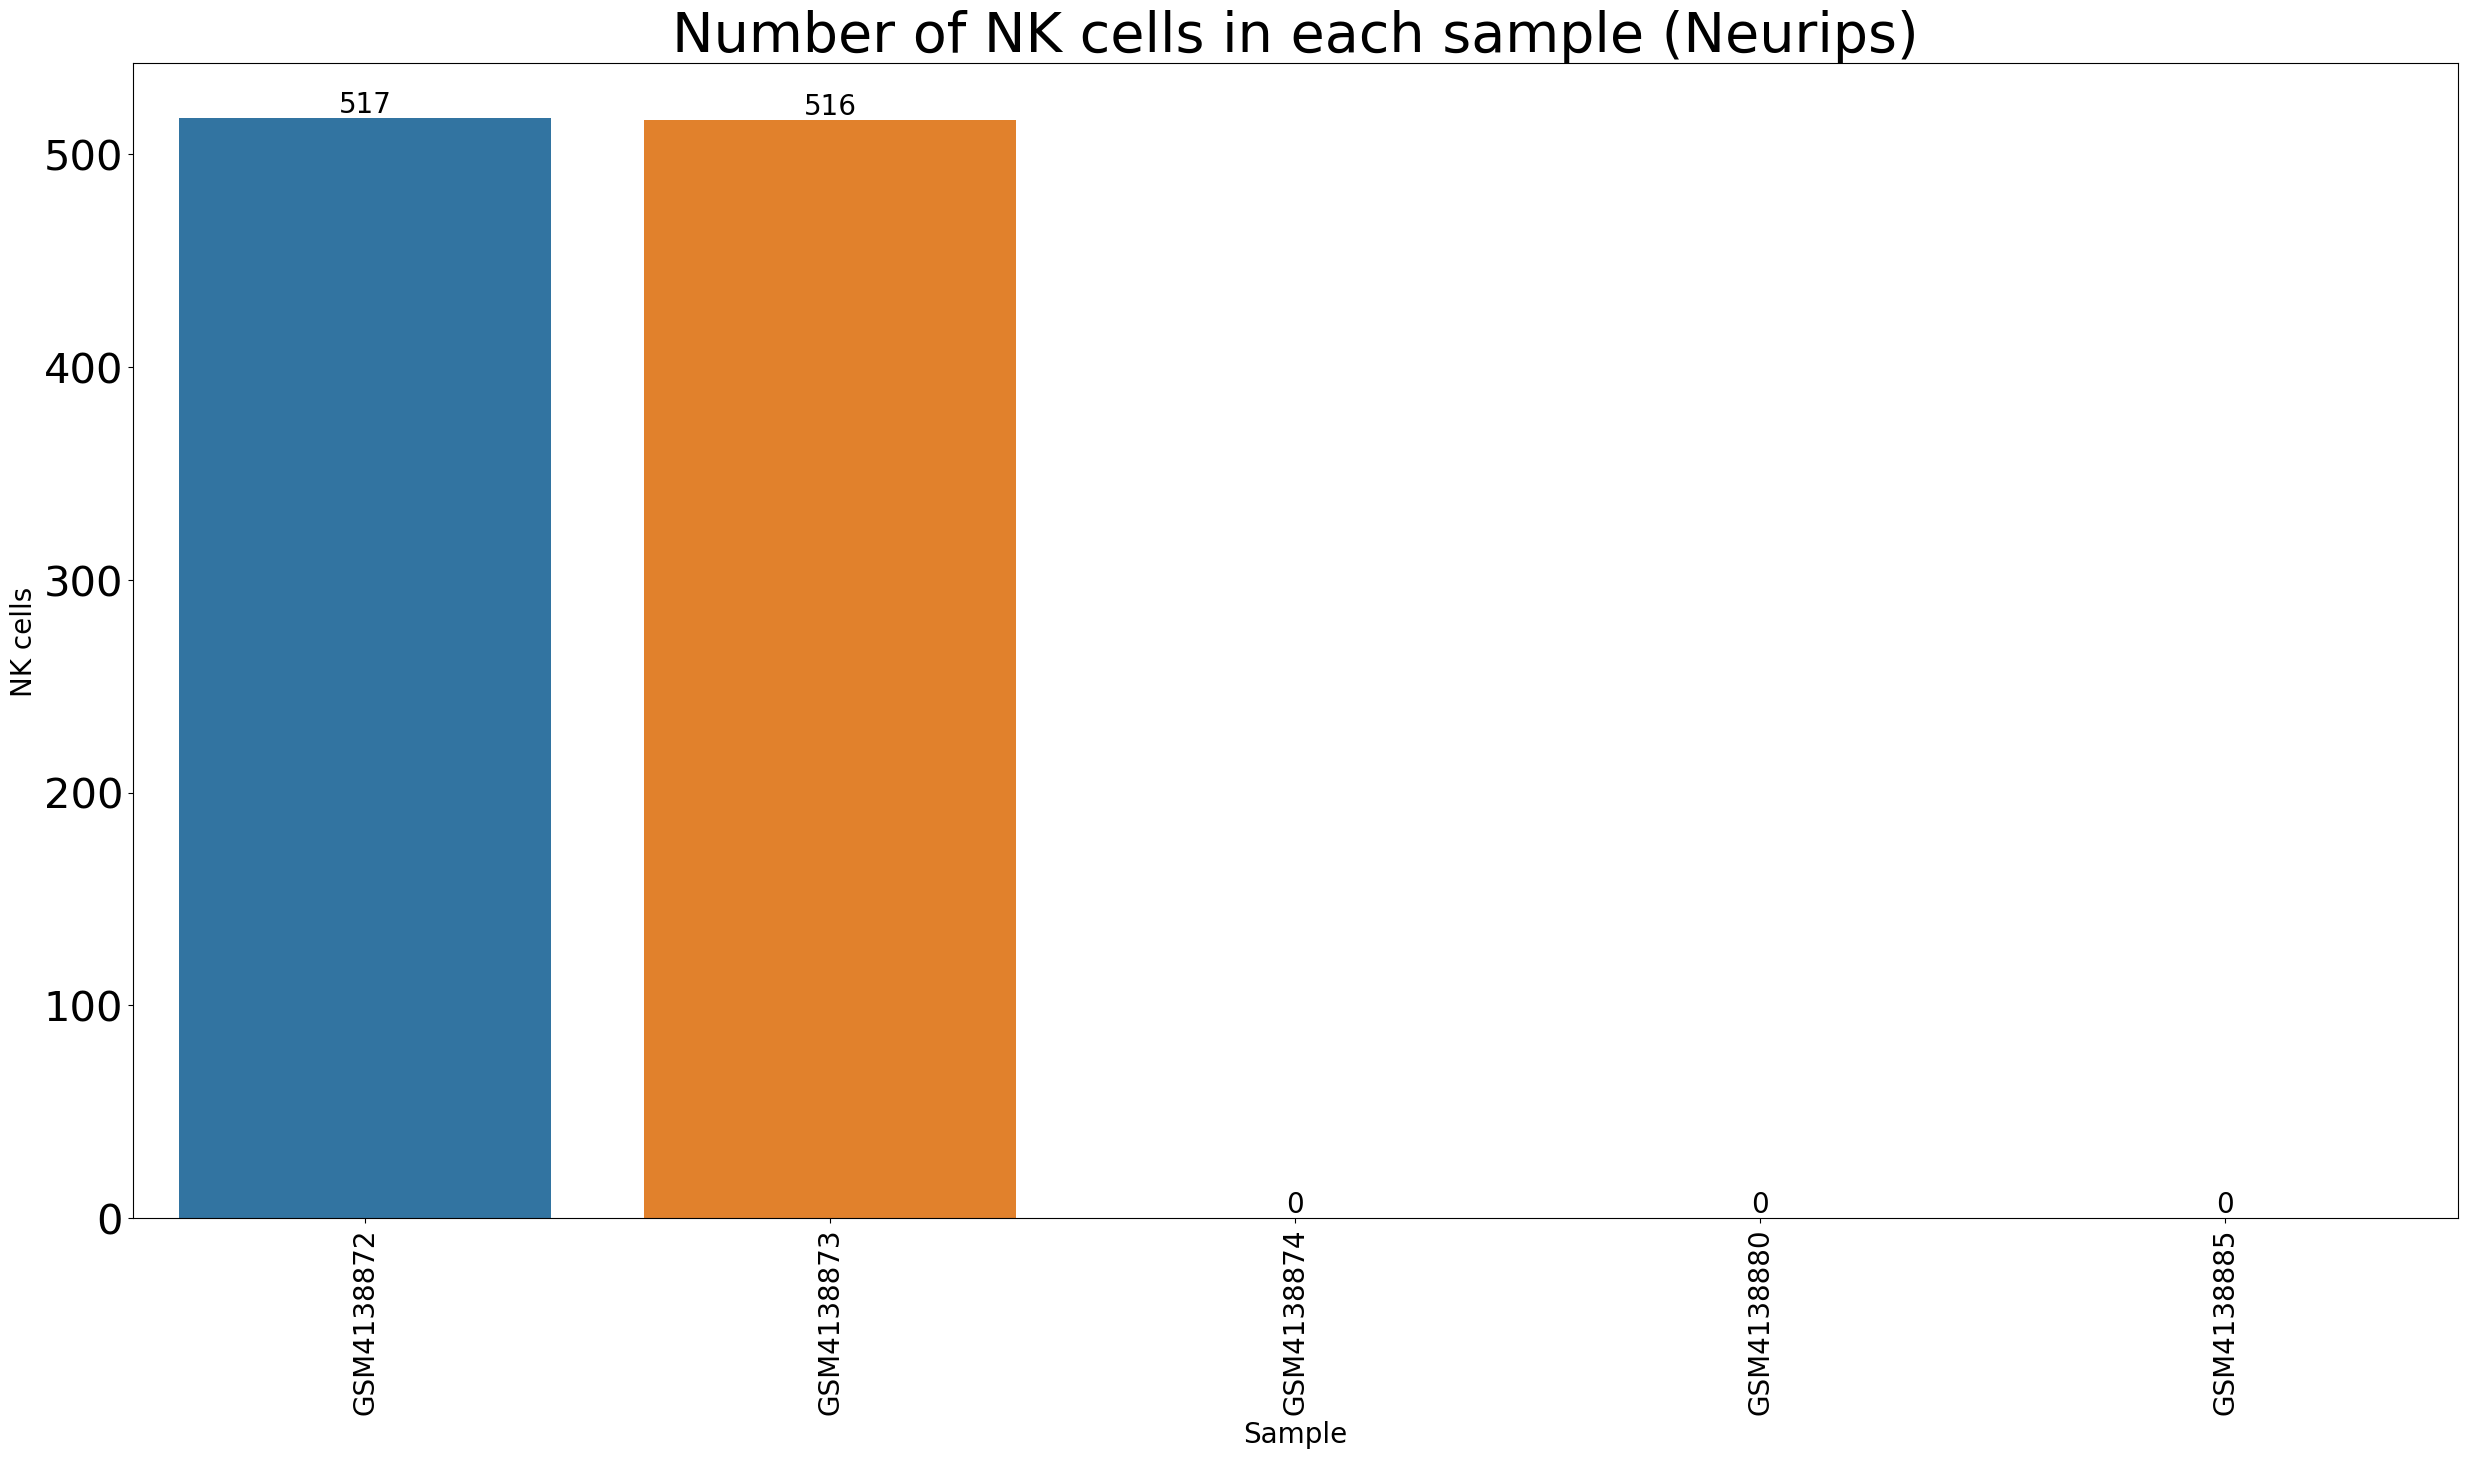

In [224]:
plt.figure(figsize=[30,15])

ax = sns.barplot(data=df_granja, x="Sample", y="NK cells")
ax.tick_params(axis='x', labelsize=20, rotation=90)
plt.title("Number of NK cells in each sample (Neurips)", fontsize=40) ;
ax.tick_params(axis='y', labelsize=30)
ax.bar_label(ax.containers[0],fontsize=20)

In [187]:
df_seurat_all= pd.DataFrame(all_cells_seurat)

df_seurat_all=df_seurat_all.T

df_seurat_all.columns=samples_s

df_seurat_nk= pd.DataFrame(nk_cell_seurat)

df_seurat_nk=df_seurat_nk.T

df_seurat_nk.columns=samples_s

df_seurat_nk


Seurat
0    1355

In [189]:
df_seurat=pd.concat([df_seurat_all, df_seurat_nk])

df_seurat.index = ['All cells', 'NK cells']

df_seurat=df_seurat.T

df_seurat["Sample"]=samples_s

df_seurat

All cells  NK cells  Sample
Seurat      29556      1355  Seurat

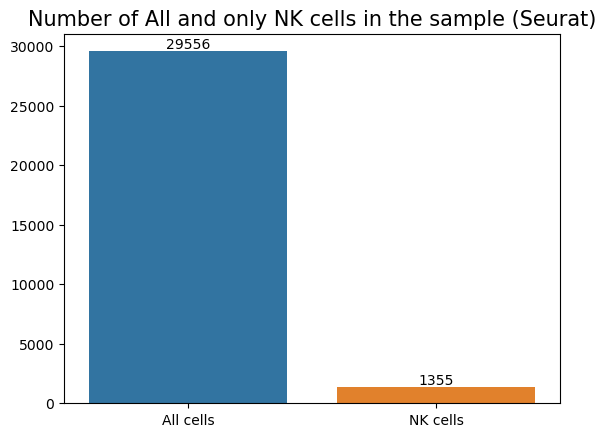

In [228]:
ax = sns.barplot(data=df_seurat)
ax.bar_label(ax.containers[0],fontsize=10)
plt.title("Number of All and only NK cells in the sample (Seurat)", fontsize=15) ;